# Training a Generative Adversarial Model on MNIST

## Importing Supporting Libraries

In [1]:
%matplotlib notebook

import numpy as np
from numpy.random import randint
import os
from matplotlib import pyplot as plt

# Loading tensorflow related libraries 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras.layers import Conv2DTranspose, Reshape, LeakyReLU
from tensorflow.keras.models import Sequential

# We will be using MNIST in this experiment
from keras.datasets.mnist import load_data

print('The used TensorFlow version:', tf.__version__)
print('The used Numpy version:', np.__version__)

The used TensorFlow version: 1.15.0
The used Numpy version: 1.17.2


Using TensorFlow backend.


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Loading the MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = load_data()

In [4]:
print('Shape of the training data', X_train.shape, ', the shape of the labels:', y_train.shape)
print('Shape of the testing data', X_test.shape, ', the shape of the labels:', y_test.shape)

Shape of the training data (60000, 28, 28) , the shape of the labels: (60000,)
Shape of the testing data (10000, 28, 28) , the shape of the labels: (10000,)


<IPython.core.display.Javascript object>


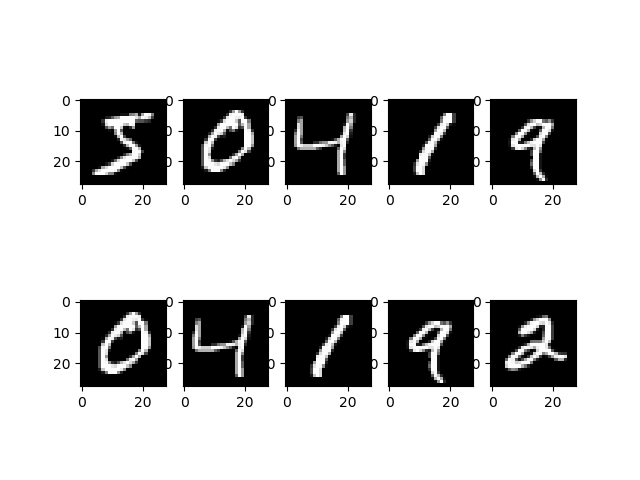

In [5]:
# Let us visualize 10 examples: 
# set the subplot
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):  
    # plot image pixesles
        axs[i,j].imshow(X_train[i+j], cmap=plt.get_cmap('gray'))
# Display the image
plt.show()

## Resahping the training data

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], 28 * 28))
X_test =  np.reshape(X_test, (X_test.shape[0], 28 * 28))

In [7]:
# We also need to rescale the images to values between [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building the Discriminator Model

In [8]:
# Defining the discriminator model 
def building_discriminator():
    # The image dimensions provided as inputs
    image_shape = (28, 28, 1)
    disModel = Sequential()
    disModel.add(Conv2D(64, 3, strides=2, input_shape=image_shape))
    disModel.add(LeakyReLU())
    disModel.add(Dropout(0.4))
    # Second layer
    disModel.add(Conv2D(64, 3, strides=2))
    disModel.add(LeakyReLU()) 
    disModel.add(Dropout(0.4))
    # Flatten the output
    disModel.add(Flatten()) 
    disModel.add(Dense(1, activation='sigmoid'))
    # Optimization function
    opt = tf.keras.optimizers.Adam(lr=2e-4, beta_1=0.5)
    # Compile the model
    disModel.compile(loss='binary_crossentropy', optimizer=opt, metrics = ['accuracy'])
    return disModel

In [9]:
discriminator = building_discriminator()
discriminator.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 64)        640       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dr

### Training the Discriminator Model

In [10]:
#We need to train the discriminator model using real and fake examples. 
def generate_real_images(n_samples):
    real_imgs = X_train[randint(0, X_train.shape[0], n_samples)]
    # Making sure the size of the images is (n_samples, 28, 28, 1)
    real_imgs = real_imgs.reshape(real_imgs.shape[0], 28, 28, 1)
    y_real = np.ones((n_samples, 1))
    return real_imgs, y_real

<IPython.core.display.Javascript object>


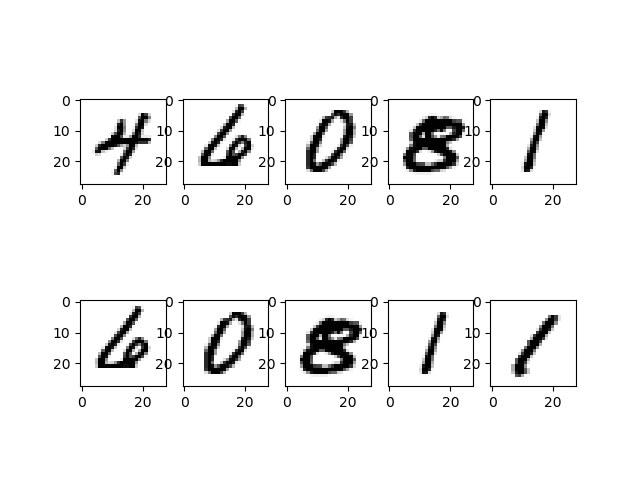

In [11]:
# Let us visualize 10 examples from the real images: 
X_real_imgs, _ = generate_real_images(int(256/2))
# set the subplot
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):  
    # plot image pixesles
        axs[i,j].imshow(np.reshape(X_real_imgs[i+j], (28,28)), cmap='binary')
# Display the image
plt.show()

In [12]:
def generate_fake_images(n_samples):
    fake_imgs = np.random.rand(28 * 28 * n_samples)
    # Making sure the size of the images is (n_samples, 28, 28, 1)
    fake_imgs = np.reshape(fake_imgs, (n_samples, 28, 28, 1))
    y_fake = np.zeros((n_samples, 1))
    return fake_imgs, y_fake

<IPython.core.display.Javascript object>


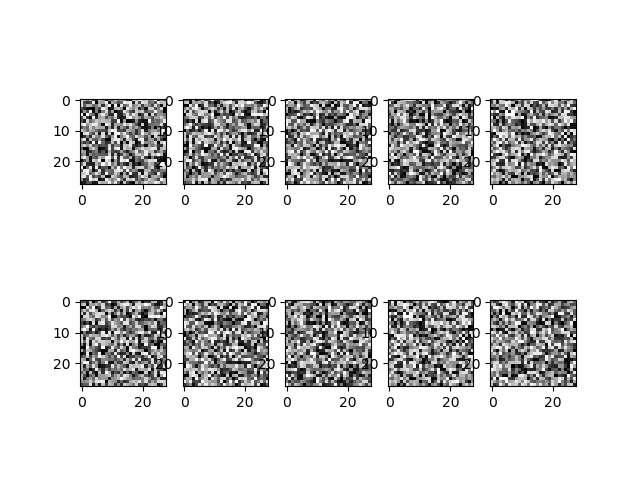

In [13]:
# Let us visualize 10 examples from the fake images: 
X_fake_imgs, _ = generate_fake_images(int(256/2))
# Let us visualize 10 examples: 
# set the subplot
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):  
    # plot image pixesles
        axs[i,j].imshow(np.reshape(X_fake_imgs[i+j], (28,28)), cmap='binary')
# Display the image
plt.show()

In [14]:
epochs=100
n_batch=256
for i in range(epochs):
    # Generate true samples 
    X_real_imgs, y_real = generate_real_images(int(n_batch/2))
    # train the model on a collected batch
    _, acc_on_real = discriminator.train_on_batch(X_real_imgs, y_real)
    # Generate fake samples
    X_fake_imgs, y_fake = generate_fake_images(int(n_batch/2))
    # train the model on a collected batch
    _, acc_on_fake = discriminator.train_on_batch(X_fake_imgs, y_fake)
    # Display training performance
    print('Accuracy in epoch %d, on real images=%.0f%% , on fake images=%.0f%%' % (i+1, acc_on_real * 100, acc_on_fake * 100))

Accuracy in epoch 1, on real images=70% , on fake images=12%
Accuracy in epoch 2, on real images=71% , on fake images=20%
Accuracy in epoch 3, on real images=71% , on fake images=36%
Accuracy in epoch 4, on real images=73% , on fake images=59%
Accuracy in epoch 5, on real images=73% , on fake images=70%
Accuracy in epoch 6, on real images=74% , on fake images=78%
Accuracy in epoch 7, on real images=78% , on fake images=92%
Accuracy in epoch 8, on real images=78% , on fake images=98%
Accuracy in epoch 9, on real images=77% , on fake images=99%
Accuracy in epoch 10, on real images=72% , on fake images=100%
Accuracy in epoch 11, on real images=81% , on fake images=100%
Accuracy in epoch 12, on real images=74% , on fake images=100%
Accuracy in epoch 13, on real images=75% , on fake images=100%
Accuracy in epoch 14, on real images=77% , on fake images=100%
Accuracy in epoch 15, on real images=77% , on fake images=100%
Accuracy in epoch 16, on real images=83% , on fake images=100%
Accuracy i

# Building the Generator Model 

In [15]:
# Defining the generator model 
def building_generator(noise_dim):
    genModel = Sequential()
    genModel.add(Dense(128 * 6 * 6, input_dim=noise_dim))
    genModel.add(LeakyReLU())
    genModel.add(Reshape((6,6,128)))
    # Second layer
    genModel.add(Conv2DTranspose(128, (4,4), strides=(2,2)))
    genModel.add(LeakyReLU())
    # Third layer
    genModel.add(Conv2DTranspose(128, (4,4), strides=(2,2)))
    genModel.add(LeakyReLU())
    genModel.add(Conv2D(1, (3,3), activation='sigmoid'))
    return genModel

In [16]:
generator = building_generator(100)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4608)              465408    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4608)              0         
_________________________________________________________________
reshape (Reshape)            (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 30, 30, 128)       262272    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 30, 30, 128)      

### Generating Synthetic Images

In [17]:
def generate_img_using_model(generator, noise_dim, n_samples):
    noise = np.random.randn(noise_dim * n_samples)
    noise = noise.reshape(n_samples, noise_dim)
    fake_imgs = generator.predict(noise)
    y_fake = np.zeros((n_samples, 1))
    return fake_imgs, y_fake

In [18]:
X_real, y_real = generate_real_images(int(256/2))
X_fake, y_fake = generate_img_using_model(generator, 100, int(256/2))

<IPython.core.display.Javascript object>


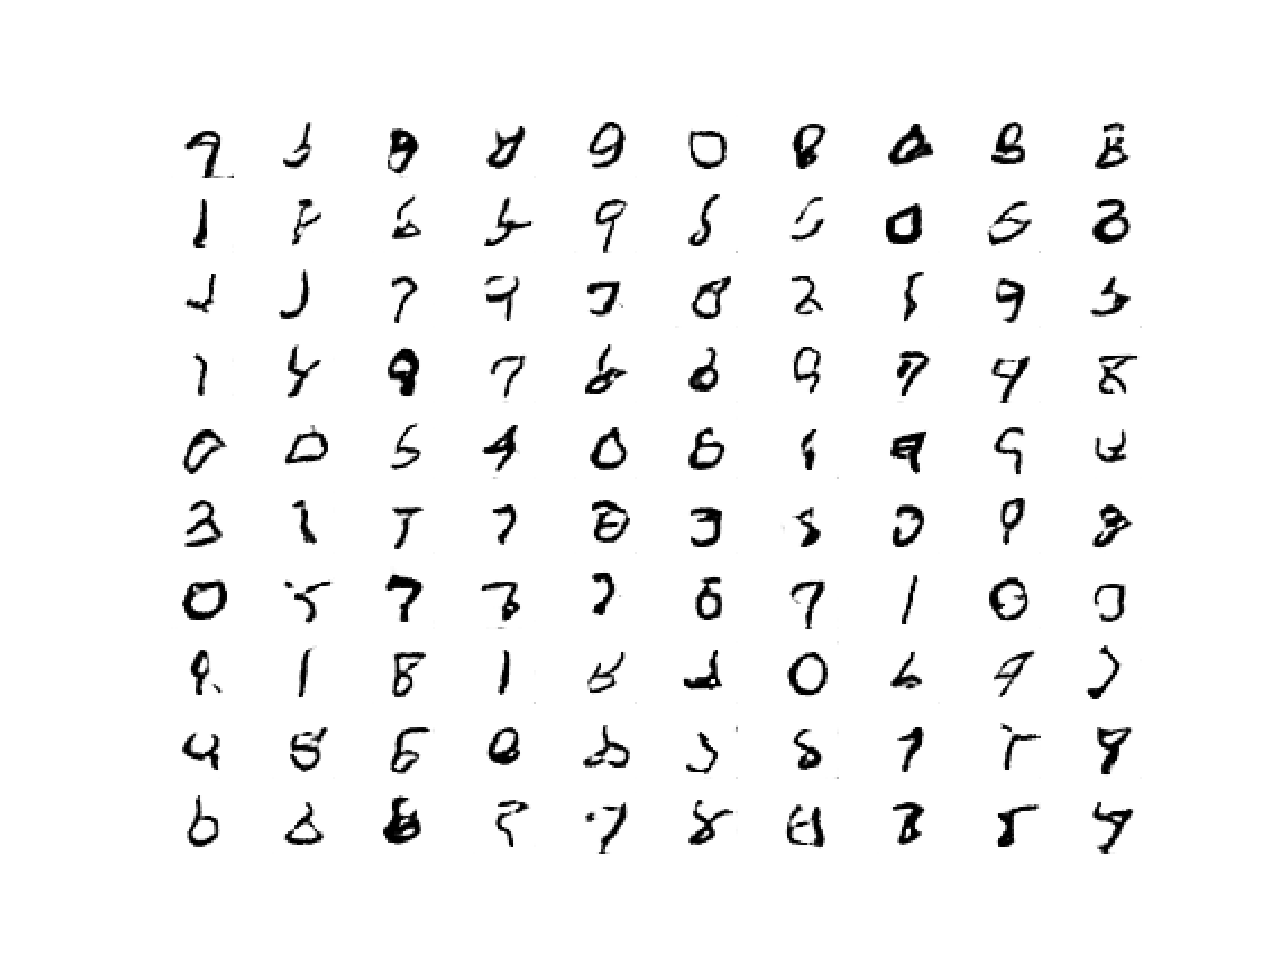

In [19]:
# Let us visualize 10 examples from the real images: 
X_real_imgs, _ = generate_real_images(int(256/2))
# set the subplot
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):  
    # plot image pixesles
        if i == 0: 
            axs[i,j].imshow(X_real[j, :, :, 0], cmap='gray')
        else: 
            axs[i,j].imshow(X_fake[j, :, :, 0], cmap='gray')
# Display the image
plt.show()

# Task 5: Generative Adversarial Network (GAN)

In [20]:
def building_gan(generator, discriminator):
    GAN = Sequential()
    discriminator.trainable = False
    # Adding the generator and the discriminator
    GAN.add(generator)
    GAN.add(discriminator)
    # Optimization function
    opt = tf.keras.optimizers.Adam(lr=2e-4, beta_1=0.5)
    # Compile the model 
    GAN.compile(loss='binary_crossentropy', optimizer=opt)
    return GAN

In [21]:
discriminator = building_discriminator()
generator = building_generator(100)
gan_model = building_gan(generator,discriminator )
gan_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 28, 28, 1)         991105    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 39873     
Total params: 1,030,978
Trainable params: 991,105
Non-trainable params: 39,873
_________________________________________________________________


# Training the GAN

In [22]:
def training_gan(gan_model, discriminator, generator, batch_size=256, epochs=100, epoch_steps=468, noise_dim=100):
    # Training the model by enumerating epochs 
    for epoch in range(0,epochs): 
        for step in range(0, epoch_steps):
            # Generating fake images 
            X_fake, y_fake = generate_img_using_model(generator, noise_dim, batch_size)
            # Generating real images 
            X_real, y_real = generate_real_images(batch_size)
            # Creating training set
            X_batch = np.concatenate([X_real, X_fake], axis = 0)
            y_batch = np.concatenate([y_real, y_fake], axis = 0)      
            # Training the discriminator
            d_loss, d_acc = discriminator.train_on_batch(X_batch, y_batch)
            # Gnerating noise input for the generator 
            X_gan = np.random.randn(noise_dim * batch_size)
            X_gan = X_gan.reshape(batch_size, noise_dim)
            y_gan = np.ones((batch_size, 1))
            # Training the GAN model using the generated noise 
            gan_loss = gan_model.train_on_batch(X_gan,y_gan)
            # Report the trai
            report_porgress(epoch=epoch, step=step, d_loss=d_loss, gan_loss=gan_loss, noise_dim=noise_dim, epoch_steps=epoch_steps)
        # Report the progress on the full epoch
        report_porgress(epoch=epoch, step=step, d_loss=d_loss, gan_loss=gan_loss, noise_dim=noise_dim, epoch_steps=epoch_steps, generator=generator, discriminator=discriminator, eoe=True)

In [23]:
def report_porgress(epoch, step, d_loss, gan_loss, noise_dim = None, epoch_steps= None, generator=None, discriminator=None, n_samples=100, eoe= False):
    if eoe and step == (epoch_steps-1):
        # Report a full epoch training performance
        # Sample some real images from the training set
        X_real, y_real = generate_real_images(n_samples)
        # Measure the accuracy of the discrinminator on real sampled images
        _ , acc_real = discriminator.evaluate(X_real, y_real, verbose=0)
        # Generates fake examples
        X_fake, y_fake = generate_img_using_model(generator, noise_dim, n_samples)
        # evaluate discriminator on fake images
        _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose=0)
        # summarize discriminator performance
        # plot images
        for i in range(10 * 10):
            # define subplot
            plt.subplot(10, 10, 1 + i)
            # turn off axis
            plt.axis('off')
            # plot raw pixel data
            plt.imshow(X_fake[i, :, :, 0], cmap='gray_r')
            #plt.show()
        filename = 'generated_examples_epoch%04d.png' % (epoch+1)
        plt.savefig(filename)
        print('Disciminator Accuracy on real images: %.0f%%, on fake images: %.0f%%' % (acc_real*100, acc_fake*100))
        # save the generator model tile file
        filename = 'generator_model_%04d.h5' % epoch
        generator.save(filename)
    else:
        # Report a single step training performance 
        print('Training progress in epoch #%d, step %d, discriminator loss=%.3f , generator loss=%.3f' % (epoch, step ,d_loss, gan_loss))

In [24]:
epochs = 100
batch_size = 256 
epoch_steps = int((2 * X_train.shape[0]/batch_size)/2)
print(epoch_steps)

234


In [25]:
training_gan(gan_model, discriminator, generator, batch_size, epochs, epoch_steps, noise_dim=100)

Training progress in epoch #0, step 0, discriminator loss=0.688 , generator loss=0.724
Training progress in epoch #0, step 1, discriminator loss=0.679 , generator loss=0.739
Training progress in epoch #0, step 2, discriminator loss=0.674 , generator loss=0.752
Training progress in epoch #0, step 3, discriminator loss=0.670 , generator loss=0.761
Training progress in epoch #0, step 4, discriminator loss=0.661 , generator loss=0.778
Training progress in epoch #0, step 5, discriminator loss=0.656 , generator loss=0.791
Training progress in epoch #0, step 6, discriminator loss=0.650 , generator loss=0.801
Training progress in epoch #0, step 7, discriminator loss=0.644 , generator loss=0.813
Training progress in epoch #0, step 8, discriminator loss=0.639 , generator loss=0.816
Training progress in epoch #0, step 9, discriminator loss=0.637 , generator loss=0.821
Training progress in epoch #0, step 10, discriminator loss=0.634 , generator loss=0.820
Training progress in epoch #0, step 11, di

Training progress in epoch #0, step 92, discriminator loss=0.569 , generator loss=0.724
Training progress in epoch #0, step 93, discriminator loss=0.559 , generator loss=0.744
Training progress in epoch #0, step 94, discriminator loss=0.574 , generator loss=0.717
Training progress in epoch #0, step 95, discriminator loss=0.560 , generator loss=0.753
Training progress in epoch #0, step 96, discriminator loss=0.560 , generator loss=0.781
Training progress in epoch #0, step 97, discriminator loss=0.564 , generator loss=0.746
Training progress in epoch #0, step 98, discriminator loss=0.557 , generator loss=0.769
Training progress in epoch #0, step 99, discriminator loss=0.561 , generator loss=0.771
Training progress in epoch #0, step 100, discriminator loss=0.576 , generator loss=0.783
Training progress in epoch #0, step 101, discriminator loss=0.559 , generator loss=0.778
Training progress in epoch #0, step 102, discriminator loss=0.550 , generator loss=0.785
Training progress in epoch #0

Training progress in epoch #0, step 185, discriminator loss=0.609 , generator loss=0.836
Training progress in epoch #0, step 186, discriminator loss=0.637 , generator loss=0.838
Training progress in epoch #0, step 187, discriminator loss=0.641 , generator loss=0.849
Training progress in epoch #0, step 188, discriminator loss=0.652 , generator loss=0.831
Training progress in epoch #0, step 189, discriminator loss=0.669 , generator loss=0.809
Training progress in epoch #0, step 190, discriminator loss=0.677 , generator loss=0.777
Training progress in epoch #0, step 191, discriminator loss=0.692 , generator loss=0.755
Training progress in epoch #0, step 192, discriminator loss=0.677 , generator loss=0.765
Training progress in epoch #0, step 193, discriminator loss=0.673 , generator loss=0.759
Training progress in epoch #0, step 194, discriminator loss=0.690 , generator loss=0.761
Training progress in epoch #0, step 195, discriminator loss=0.681 , generator loss=0.745
Training progress in 

Training progress in epoch #1, step 43, discriminator loss=0.668 , generator loss=0.811
Training progress in epoch #1, step 44, discriminator loss=0.665 , generator loss=0.797
Training progress in epoch #1, step 45, discriminator loss=0.676 , generator loss=0.783
Training progress in epoch #1, step 46, discriminator loss=0.681 , generator loss=0.763
Training progress in epoch #1, step 47, discriminator loss=0.690 , generator loss=0.781
Training progress in epoch #1, step 48, discriminator loss=0.692 , generator loss=0.764
Training progress in epoch #1, step 49, discriminator loss=0.692 , generator loss=0.767
Training progress in epoch #1, step 50, discriminator loss=0.687 , generator loss=0.742
Training progress in epoch #1, step 51, discriminator loss=0.704 , generator loss=0.726
Training progress in epoch #1, step 52, discriminator loss=0.709 , generator loss=0.687
Training progress in epoch #1, step 53, discriminator loss=0.702 , generator loss=0.693
Training progress in epoch #1, s

Training progress in epoch #1, step 136, discriminator loss=0.698 , generator loss=0.699
Training progress in epoch #1, step 137, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #1, step 138, discriminator loss=0.699 , generator loss=0.718
Training progress in epoch #1, step 139, discriminator loss=0.688 , generator loss=0.723
Training progress in epoch #1, step 140, discriminator loss=0.692 , generator loss=0.744
Training progress in epoch #1, step 141, discriminator loss=0.693 , generator loss=0.752
Training progress in epoch #1, step 142, discriminator loss=0.683 , generator loss=0.719
Training progress in epoch #1, step 143, discriminator loss=0.682 , generator loss=0.728
Training progress in epoch #1, step 144, discriminator loss=0.680 , generator loss=0.733
Training progress in epoch #1, step 145, discriminator loss=0.684 , generator loss=0.721
Training progress in epoch #1, step 146, discriminator loss=0.680 , generator loss=0.716
Training progress in 

Training progress in epoch #1, step 229, discriminator loss=0.674 , generator loss=0.740
Training progress in epoch #1, step 230, discriminator loss=0.683 , generator loss=0.726
Training progress in epoch #1, step 231, discriminator loss=0.684 , generator loss=0.732
Training progress in epoch #1, step 232, discriminator loss=0.677 , generator loss=0.743
Training progress in epoch #1, step 233, discriminator loss=0.685 , generator loss=0.742


/Users/mohammedalhamid/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Disciminator Accuracy on real images: 41%, on fake images: 73%
Training progress in epoch #2, step 0, discriminator loss=0.682 , generator loss=0.728
Training progress in epoch #2, step 1, discriminator loss=0.684 , generator loss=0.726
Training progress in epoch #2, step 2, discriminator loss=0.679 , generator loss=0.732
Training progress in epoch #2, step 3, discriminator loss=0.682 , generator loss=0.734
Training progress in epoch #2, step 4, discriminator loss=0.690 , generator loss=0.723
Training progress in epoch #2, step 5, discriminator loss=0.688 , generator loss=0.723
Training progress in epoch #2, step 6, discriminator loss=0.681 , generator loss=0.722
Training progress in epoch #2, step 7, discriminator loss=0.687 , generator loss=0.724
Training progress in epoch #2, step 8, discriminator loss=0.695 , generator loss=0.714
Training progress in epoch #2, step 9, discriminator loss=0.697 , generator loss=0.719
Training progress in epoch #2, step 10, discriminator loss=0.692 , 

Training progress in epoch #2, step 93, discriminator loss=0.677 , generator loss=0.727
Training progress in epoch #2, step 94, discriminator loss=0.674 , generator loss=0.716
Training progress in epoch #2, step 95, discriminator loss=0.676 , generator loss=0.719
Training progress in epoch #2, step 96, discriminator loss=0.680 , generator loss=0.728
Training progress in epoch #2, step 97, discriminator loss=0.686 , generator loss=0.713
Training progress in epoch #2, step 98, discriminator loss=0.674 , generator loss=0.719
Training progress in epoch #2, step 99, discriminator loss=0.677 , generator loss=0.741
Training progress in epoch #2, step 100, discriminator loss=0.679 , generator loss=0.730
Training progress in epoch #2, step 101, discriminator loss=0.686 , generator loss=0.730
Training progress in epoch #2, step 102, discriminator loss=0.677 , generator loss=0.728
Training progress in epoch #2, step 103, discriminator loss=0.682 , generator loss=0.722
Training progress in epoch #

Training progress in epoch #2, step 186, discriminator loss=0.687 , generator loss=0.733
Training progress in epoch #2, step 187, discriminator loss=0.691 , generator loss=0.717
Training progress in epoch #2, step 188, discriminator loss=0.682 , generator loss=0.710
Training progress in epoch #2, step 189, discriminator loss=0.684 , generator loss=0.701
Training progress in epoch #2, step 190, discriminator loss=0.692 , generator loss=0.693
Training progress in epoch #2, step 191, discriminator loss=0.686 , generator loss=0.697
Training progress in epoch #2, step 192, discriminator loss=0.685 , generator loss=0.696
Training progress in epoch #2, step 193, discriminator loss=0.687 , generator loss=0.686
Training progress in epoch #2, step 194, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #2, step 195, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #2, step 196, discriminator loss=0.683 , generator loss=0.696
Training progress in 

Training progress in epoch #3, step 44, discriminator loss=0.704 , generator loss=0.684
Training progress in epoch #3, step 45, discriminator loss=0.707 , generator loss=0.675
Training progress in epoch #3, step 46, discriminator loss=0.705 , generator loss=0.669
Training progress in epoch #3, step 47, discriminator loss=0.700 , generator loss=0.665
Training progress in epoch #3, step 48, discriminator loss=0.699 , generator loss=0.665
Training progress in epoch #3, step 49, discriminator loss=0.705 , generator loss=0.669
Training progress in epoch #3, step 50, discriminator loss=0.702 , generator loss=0.678
Training progress in epoch #3, step 51, discriminator loss=0.698 , generator loss=0.681
Training progress in epoch #3, step 52, discriminator loss=0.701 , generator loss=0.681
Training progress in epoch #3, step 53, discriminator loss=0.700 , generator loss=0.683
Training progress in epoch #3, step 54, discriminator loss=0.708 , generator loss=0.685
Training progress in epoch #3, s

Training progress in epoch #3, step 137, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #3, step 138, discriminator loss=0.689 , generator loss=0.701
Training progress in epoch #3, step 139, discriminator loss=0.687 , generator loss=0.696
Training progress in epoch #3, step 140, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #3, step 141, discriminator loss=0.688 , generator loss=0.697
Training progress in epoch #3, step 142, discriminator loss=0.683 , generator loss=0.710
Training progress in epoch #3, step 143, discriminator loss=0.694 , generator loss=0.698
Training progress in epoch #3, step 144, discriminator loss=0.690 , generator loss=0.702
Training progress in epoch #3, step 145, discriminator loss=0.688 , generator loss=0.706
Training progress in epoch #3, step 146, discriminator loss=0.681 , generator loss=0.711
Training progress in epoch #3, step 147, discriminator loss=0.683 , generator loss=0.706
Training progress in 

Training progress in epoch #3, step 230, discriminator loss=0.690 , generator loss=0.686
Training progress in epoch #3, step 231, discriminator loss=0.687 , generator loss=0.690
Training progress in epoch #3, step 232, discriminator loss=0.687 , generator loss=0.692
Training progress in epoch #3, step 233, discriminator loss=0.691 , generator loss=0.694
Disciminator Accuracy on real images: 67%, on fake images: 59%
Training progress in epoch #4, step 0, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #4, step 1, discriminator loss=0.683 , generator loss=0.701
Training progress in epoch #4, step 2, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #4, step 3, discriminator loss=0.687 , generator loss=0.705
Training progress in epoch #4, step 4, discriminator loss=0.689 , generator loss=0.696
Training progress in epoch #4, step 5, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #4, step 6, discriminator loss=0

Training progress in epoch #4, step 89, discriminator loss=0.690 , generator loss=0.716
Training progress in epoch #4, step 90, discriminator loss=0.683 , generator loss=0.710
Training progress in epoch #4, step 91, discriminator loss=0.686 , generator loss=0.705
Training progress in epoch #4, step 92, discriminator loss=0.683 , generator loss=0.695
Training progress in epoch #4, step 93, discriminator loss=0.682 , generator loss=0.696
Training progress in epoch #4, step 94, discriminator loss=0.683 , generator loss=0.697
Training progress in epoch #4, step 95, discriminator loss=0.683 , generator loss=0.701
Training progress in epoch #4, step 96, discriminator loss=0.679 , generator loss=0.714
Training progress in epoch #4, step 97, discriminator loss=0.682 , generator loss=0.717
Training progress in epoch #4, step 98, discriminator loss=0.687 , generator loss=0.718
Training progress in epoch #4, step 99, discriminator loss=0.686 , generator loss=0.699
Training progress in epoch #4, s

Training progress in epoch #4, step 182, discriminator loss=0.684 , generator loss=0.689
Training progress in epoch #4, step 183, discriminator loss=0.689 , generator loss=0.679
Training progress in epoch #4, step 184, discriminator loss=0.684 , generator loss=0.691
Training progress in epoch #4, step 185, discriminator loss=0.687 , generator loss=0.694
Training progress in epoch #4, step 186, discriminator loss=0.682 , generator loss=0.702
Training progress in epoch #4, step 187, discriminator loss=0.693 , generator loss=0.713
Training progress in epoch #4, step 188, discriminator loss=0.687 , generator loss=0.706
Training progress in epoch #4, step 189, discriminator loss=0.698 , generator loss=0.702
Training progress in epoch #4, step 190, discriminator loss=0.697 , generator loss=0.696
Training progress in epoch #4, step 191, discriminator loss=0.689 , generator loss=0.696
Training progress in epoch #4, step 192, discriminator loss=0.692 , generator loss=0.694
Training progress in 

Training progress in epoch #5, step 40, discriminator loss=0.677 , generator loss=0.742
Training progress in epoch #5, step 41, discriminator loss=0.674 , generator loss=0.733
Training progress in epoch #5, step 42, discriminator loss=0.675 , generator loss=0.734
Training progress in epoch #5, step 43, discriminator loss=0.670 , generator loss=0.717
Training progress in epoch #5, step 44, discriminator loss=0.671 , generator loss=0.719
Training progress in epoch #5, step 45, discriminator loss=0.672 , generator loss=0.714
Training progress in epoch #5, step 46, discriminator loss=0.674 , generator loss=0.712
Training progress in epoch #5, step 47, discriminator loss=0.670 , generator loss=0.711
Training progress in epoch #5, step 48, discriminator loss=0.673 , generator loss=0.697
Training progress in epoch #5, step 49, discriminator loss=0.675 , generator loss=0.703
Training progress in epoch #5, step 50, discriminator loss=0.679 , generator loss=0.689
Training progress in epoch #5, s

Training progress in epoch #5, step 133, discriminator loss=0.659 , generator loss=0.743
Training progress in epoch #5, step 134, discriminator loss=0.662 , generator loss=0.738
Training progress in epoch #5, step 135, discriminator loss=0.657 , generator loss=0.742
Training progress in epoch #5, step 136, discriminator loss=0.659 , generator loss=0.748
Training progress in epoch #5, step 137, discriminator loss=0.663 , generator loss=0.733
Training progress in epoch #5, step 138, discriminator loss=0.673 , generator loss=0.733
Training progress in epoch #5, step 139, discriminator loss=0.674 , generator loss=0.739
Training progress in epoch #5, step 140, discriminator loss=0.685 , generator loss=0.728
Training progress in epoch #5, step 141, discriminator loss=0.678 , generator loss=0.735
Training progress in epoch #5, step 142, discriminator loss=0.692 , generator loss=0.707
Training progress in epoch #5, step 143, discriminator loss=0.700 , generator loss=0.694
Training progress in 

Training progress in epoch #5, step 226, discriminator loss=0.673 , generator loss=0.739
Training progress in epoch #5, step 227, discriminator loss=0.673 , generator loss=0.733
Training progress in epoch #5, step 228, discriminator loss=0.678 , generator loss=0.735
Training progress in epoch #5, step 229, discriminator loss=0.677 , generator loss=0.735
Training progress in epoch #5, step 230, discriminator loss=0.674 , generator loss=0.722
Training progress in epoch #5, step 231, discriminator loss=0.675 , generator loss=0.722
Training progress in epoch #5, step 232, discriminator loss=0.666 , generator loss=0.713
Training progress in epoch #5, step 233, discriminator loss=0.670 , generator loss=0.697
Disciminator Accuracy on real images: 70%, on fake images: 50%
Training progress in epoch #6, step 0, discriminator loss=0.674 , generator loss=0.692
Training progress in epoch #6, step 1, discriminator loss=0.680 , generator loss=0.698
Training progress in epoch #6, step 2, discriminato

Training progress in epoch #6, step 85, discriminator loss=0.652 , generator loss=0.737
Training progress in epoch #6, step 86, discriminator loss=0.651 , generator loss=0.755
Training progress in epoch #6, step 87, discriminator loss=0.653 , generator loss=0.754
Training progress in epoch #6, step 88, discriminator loss=0.648 , generator loss=0.757
Training progress in epoch #6, step 89, discriminator loss=0.646 , generator loss=0.769
Training progress in epoch #6, step 90, discriminator loss=0.658 , generator loss=0.778
Training progress in epoch #6, step 91, discriminator loss=0.658 , generator loss=0.793
Training progress in epoch #6, step 92, discriminator loss=0.665 , generator loss=0.785
Training progress in epoch #6, step 93, discriminator loss=0.663 , generator loss=0.787
Training progress in epoch #6, step 94, discriminator loss=0.666 , generator loss=0.764
Training progress in epoch #6, step 95, discriminator loss=0.665 , generator loss=0.729
Training progress in epoch #6, s

Training progress in epoch #6, step 178, discriminator loss=0.661 , generator loss=0.738
Training progress in epoch #6, step 179, discriminator loss=0.659 , generator loss=0.747
Training progress in epoch #6, step 180, discriminator loss=0.650 , generator loss=0.735
Training progress in epoch #6, step 181, discriminator loss=0.661 , generator loss=0.733
Training progress in epoch #6, step 182, discriminator loss=0.656 , generator loss=0.710
Training progress in epoch #6, step 183, discriminator loss=0.665 , generator loss=0.720
Training progress in epoch #6, step 184, discriminator loss=0.659 , generator loss=0.732
Training progress in epoch #6, step 185, discriminator loss=0.660 , generator loss=0.740
Training progress in epoch #6, step 186, discriminator loss=0.665 , generator loss=0.715
Training progress in epoch #6, step 187, discriminator loss=0.669 , generator loss=0.721
Training progress in epoch #6, step 188, discriminator loss=0.679 , generator loss=0.747
Training progress in 

Training progress in epoch #7, step 36, discriminator loss=0.700 , generator loss=0.725
Training progress in epoch #7, step 37, discriminator loss=0.706 , generator loss=0.735
Training progress in epoch #7, step 38, discriminator loss=0.708 , generator loss=0.749
Training progress in epoch #7, step 39, discriminator loss=0.704 , generator loss=0.754
Training progress in epoch #7, step 40, discriminator loss=0.703 , generator loss=0.728
Training progress in epoch #7, step 41, discriminator loss=0.699 , generator loss=0.736
Training progress in epoch #7, step 42, discriminator loss=0.690 , generator loss=0.727
Training progress in epoch #7, step 43, discriminator loss=0.697 , generator loss=0.711
Training progress in epoch #7, step 44, discriminator loss=0.692 , generator loss=0.717
Training progress in epoch #7, step 45, discriminator loss=0.697 , generator loss=0.700
Training progress in epoch #7, step 46, discriminator loss=0.692 , generator loss=0.706
Training progress in epoch #7, s

Training progress in epoch #7, step 129, discriminator loss=0.683 , generator loss=0.744
Training progress in epoch #7, step 130, discriminator loss=0.686 , generator loss=0.730
Training progress in epoch #7, step 131, discriminator loss=0.689 , generator loss=0.704
Training progress in epoch #7, step 132, discriminator loss=0.688 , generator loss=0.684
Training progress in epoch #7, step 133, discriminator loss=0.699 , generator loss=0.689
Training progress in epoch #7, step 134, discriminator loss=0.696 , generator loss=0.687
Training progress in epoch #7, step 135, discriminator loss=0.700 , generator loss=0.676
Training progress in epoch #7, step 136, discriminator loss=0.689 , generator loss=0.684
Training progress in epoch #7, step 137, discriminator loss=0.685 , generator loss=0.676
Training progress in epoch #7, step 138, discriminator loss=0.684 , generator loss=0.680
Training progress in epoch #7, step 139, discriminator loss=0.680 , generator loss=0.714
Training progress in 

Training progress in epoch #7, step 222, discriminator loss=0.675 , generator loss=0.777
Training progress in epoch #7, step 223, discriminator loss=0.677 , generator loss=0.764
Training progress in epoch #7, step 224, discriminator loss=0.668 , generator loss=0.756
Training progress in epoch #7, step 225, discriminator loss=0.662 , generator loss=0.758
Training progress in epoch #7, step 226, discriminator loss=0.665 , generator loss=0.750
Training progress in epoch #7, step 227, discriminator loss=0.656 , generator loss=0.749
Training progress in epoch #7, step 228, discriminator loss=0.652 , generator loss=0.729
Training progress in epoch #7, step 229, discriminator loss=0.654 , generator loss=0.736
Training progress in epoch #7, step 230, discriminator loss=0.652 , generator loss=0.739
Training progress in epoch #7, step 231, discriminator loss=0.656 , generator loss=0.730
Training progress in epoch #7, step 232, discriminator loss=0.655 , generator loss=0.723
Training progress in 

Training progress in epoch #8, step 81, discriminator loss=0.683 , generator loss=0.746
Training progress in epoch #8, step 82, discriminator loss=0.682 , generator loss=0.749
Training progress in epoch #8, step 83, discriminator loss=0.680 , generator loss=0.759
Training progress in epoch #8, step 84, discriminator loss=0.688 , generator loss=0.761
Training progress in epoch #8, step 85, discriminator loss=0.679 , generator loss=0.749
Training progress in epoch #8, step 86, discriminator loss=0.679 , generator loss=0.749
Training progress in epoch #8, step 87, discriminator loss=0.685 , generator loss=0.736
Training progress in epoch #8, step 88, discriminator loss=0.685 , generator loss=0.707
Training progress in epoch #8, step 89, discriminator loss=0.675 , generator loss=0.743
Training progress in epoch #8, step 90, discriminator loss=0.673 , generator loss=0.721
Training progress in epoch #8, step 91, discriminator loss=0.679 , generator loss=0.710
Training progress in epoch #8, s

Training progress in epoch #8, step 174, discriminator loss=0.693 , generator loss=0.680
Training progress in epoch #8, step 175, discriminator loss=0.695 , generator loss=0.677
Training progress in epoch #8, step 176, discriminator loss=0.708 , generator loss=0.676
Training progress in epoch #8, step 177, discriminator loss=0.703 , generator loss=0.680
Training progress in epoch #8, step 178, discriminator loss=0.709 , generator loss=0.690
Training progress in epoch #8, step 179, discriminator loss=0.705 , generator loss=0.692
Training progress in epoch #8, step 180, discriminator loss=0.700 , generator loss=0.700
Training progress in epoch #8, step 181, discriminator loss=0.695 , generator loss=0.714
Training progress in epoch #8, step 182, discriminator loss=0.692 , generator loss=0.725
Training progress in epoch #8, step 183, discriminator loss=0.700 , generator loss=0.718
Training progress in epoch #8, step 184, discriminator loss=0.697 , generator loss=0.726
Training progress in 

Training progress in epoch #9, step 32, discriminator loss=0.700 , generator loss=0.713
Training progress in epoch #9, step 33, discriminator loss=0.687 , generator loss=0.707
Training progress in epoch #9, step 34, discriminator loss=0.689 , generator loss=0.729
Training progress in epoch #9, step 35, discriminator loss=0.686 , generator loss=0.739
Training progress in epoch #9, step 36, discriminator loss=0.666 , generator loss=0.778
Training progress in epoch #9, step 37, discriminator loss=0.670 , generator loss=0.777
Training progress in epoch #9, step 38, discriminator loss=0.666 , generator loss=0.766
Training progress in epoch #9, step 39, discriminator loss=0.663 , generator loss=0.741
Training progress in epoch #9, step 40, discriminator loss=0.664 , generator loss=0.771
Training progress in epoch #9, step 41, discriminator loss=0.671 , generator loss=0.754
Training progress in epoch #9, step 42, discriminator loss=0.677 , generator loss=0.756
Training progress in epoch #9, s

Training progress in epoch #9, step 125, discriminator loss=0.689 , generator loss=0.711
Training progress in epoch #9, step 126, discriminator loss=0.697 , generator loss=0.697
Training progress in epoch #9, step 127, discriminator loss=0.695 , generator loss=0.734
Training progress in epoch #9, step 128, discriminator loss=0.691 , generator loss=0.755
Training progress in epoch #9, step 129, discriminator loss=0.694 , generator loss=0.755
Training progress in epoch #9, step 130, discriminator loss=0.680 , generator loss=0.759
Training progress in epoch #9, step 131, discriminator loss=0.690 , generator loss=0.742
Training progress in epoch #9, step 132, discriminator loss=0.667 , generator loss=0.745
Training progress in epoch #9, step 133, discriminator loss=0.675 , generator loss=0.750
Training progress in epoch #9, step 134, discriminator loss=0.660 , generator loss=0.739
Training progress in epoch #9, step 135, discriminator loss=0.674 , generator loss=0.714
Training progress in 

Training progress in epoch #9, step 218, discriminator loss=0.673 , generator loss=0.754
Training progress in epoch #9, step 219, discriminator loss=0.667 , generator loss=0.738
Training progress in epoch #9, step 220, discriminator loss=0.663 , generator loss=0.756
Training progress in epoch #9, step 221, discriminator loss=0.662 , generator loss=0.768
Training progress in epoch #9, step 222, discriminator loss=0.660 , generator loss=0.754
Training progress in epoch #9, step 223, discriminator loss=0.668 , generator loss=0.755
Training progress in epoch #9, step 224, discriminator loss=0.663 , generator loss=0.711
Training progress in epoch #9, step 225, discriminator loss=0.657 , generator loss=0.718
Training progress in epoch #9, step 226, discriminator loss=0.661 , generator loss=0.722
Training progress in epoch #9, step 227, discriminator loss=0.660 , generator loss=0.721
Training progress in epoch #9, step 228, discriminator loss=0.666 , generator loss=0.732
Training progress in 

Training progress in epoch #10, step 76, discriminator loss=0.663 , generator loss=0.741
Training progress in epoch #10, step 77, discriminator loss=0.673 , generator loss=0.743
Training progress in epoch #10, step 78, discriminator loss=0.662 , generator loss=0.722
Training progress in epoch #10, step 79, discriminator loss=0.676 , generator loss=0.697
Training progress in epoch #10, step 80, discriminator loss=0.669 , generator loss=0.712
Training progress in epoch #10, step 81, discriminator loss=0.672 , generator loss=0.721
Training progress in epoch #10, step 82, discriminator loss=0.665 , generator loss=0.726
Training progress in epoch #10, step 83, discriminator loss=0.676 , generator loss=0.725
Training progress in epoch #10, step 84, discriminator loss=0.673 , generator loss=0.718
Training progress in epoch #10, step 85, discriminator loss=0.680 , generator loss=0.731
Training progress in epoch #10, step 86, discriminator loss=0.681 , generator loss=0.714
Training progress in 

Training progress in epoch #10, step 168, discriminator loss=0.674 , generator loss=0.718
Training progress in epoch #10, step 169, discriminator loss=0.678 , generator loss=0.724
Training progress in epoch #10, step 170, discriminator loss=0.687 , generator loss=0.678
Training progress in epoch #10, step 171, discriminator loss=0.692 , generator loss=0.683
Training progress in epoch #10, step 172, discriminator loss=0.686 , generator loss=0.726
Training progress in epoch #10, step 173, discriminator loss=0.698 , generator loss=0.714
Training progress in epoch #10, step 174, discriminator loss=0.694 , generator loss=0.699
Training progress in epoch #10, step 175, discriminator loss=0.694 , generator loss=0.712
Training progress in epoch #10, step 176, discriminator loss=0.697 , generator loss=0.727
Training progress in epoch #10, step 177, discriminator loss=0.698 , generator loss=0.736
Training progress in epoch #10, step 178, discriminator loss=0.696 , generator loss=0.715
Training p

Training progress in epoch #11, step 25, discriminator loss=0.691 , generator loss=0.775
Training progress in epoch #11, step 26, discriminator loss=0.693 , generator loss=0.763
Training progress in epoch #11, step 27, discriminator loss=0.689 , generator loss=0.732
Training progress in epoch #11, step 28, discriminator loss=0.694 , generator loss=0.692
Training progress in epoch #11, step 29, discriminator loss=0.699 , generator loss=0.686
Training progress in epoch #11, step 30, discriminator loss=0.702 , generator loss=0.662
Training progress in epoch #11, step 31, discriminator loss=0.698 , generator loss=0.678
Training progress in epoch #11, step 32, discriminator loss=0.690 , generator loss=0.688
Training progress in epoch #11, step 33, discriminator loss=0.698 , generator loss=0.673
Training progress in epoch #11, step 34, discriminator loss=0.678 , generator loss=0.685
Training progress in epoch #11, step 35, discriminator loss=0.674 , generator loss=0.712
Training progress in 

Training progress in epoch #11, step 117, discriminator loss=0.692 , generator loss=0.713
Training progress in epoch #11, step 118, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #11, step 119, discriminator loss=0.692 , generator loss=0.737
Training progress in epoch #11, step 120, discriminator loss=0.683 , generator loss=0.743
Training progress in epoch #11, step 121, discriminator loss=0.671 , generator loss=0.744
Training progress in epoch #11, step 122, discriminator loss=0.673 , generator loss=0.733
Training progress in epoch #11, step 123, discriminator loss=0.664 , generator loss=0.765
Training progress in epoch #11, step 124, discriminator loss=0.670 , generator loss=0.742
Training progress in epoch #11, step 125, discriminator loss=0.665 , generator loss=0.763
Training progress in epoch #11, step 126, discriminator loss=0.668 , generator loss=0.737
Training progress in epoch #11, step 127, discriminator loss=0.666 , generator loss=0.740
Training p

Training progress in epoch #11, step 209, discriminator loss=0.680 , generator loss=0.742
Training progress in epoch #11, step 210, discriminator loss=0.681 , generator loss=0.744
Training progress in epoch #11, step 211, discriminator loss=0.681 , generator loss=0.727
Training progress in epoch #11, step 212, discriminator loss=0.672 , generator loss=0.736
Training progress in epoch #11, step 213, discriminator loss=0.683 , generator loss=0.721
Training progress in epoch #11, step 214, discriminator loss=0.677 , generator loss=0.729
Training progress in epoch #11, step 215, discriminator loss=0.683 , generator loss=0.720
Training progress in epoch #11, step 216, discriminator loss=0.685 , generator loss=0.717
Training progress in epoch #11, step 217, discriminator loss=0.683 , generator loss=0.695
Training progress in epoch #11, step 218, discriminator loss=0.681 , generator loss=0.701
Training progress in epoch #11, step 219, discriminator loss=0.681 , generator loss=0.723
Training p

Training progress in epoch #12, step 67, discriminator loss=0.695 , generator loss=0.749
Training progress in epoch #12, step 68, discriminator loss=0.675 , generator loss=0.759
Training progress in epoch #12, step 69, discriminator loss=0.688 , generator loss=0.731
Training progress in epoch #12, step 70, discriminator loss=0.680 , generator loss=0.716
Training progress in epoch #12, step 71, discriminator loss=0.681 , generator loss=0.708
Training progress in epoch #12, step 72, discriminator loss=0.673 , generator loss=0.679
Training progress in epoch #12, step 73, discriminator loss=0.684 , generator loss=0.695
Training progress in epoch #12, step 74, discriminator loss=0.691 , generator loss=0.705
Training progress in epoch #12, step 75, discriminator loss=0.688 , generator loss=0.719
Training progress in epoch #12, step 76, discriminator loss=0.681 , generator loss=0.700
Training progress in epoch #12, step 77, discriminator loss=0.682 , generator loss=0.699
Training progress in 

Training progress in epoch #12, step 159, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #12, step 160, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #12, step 161, discriminator loss=0.688 , generator loss=0.695
Training progress in epoch #12, step 162, discriminator loss=0.688 , generator loss=0.691
Training progress in epoch #12, step 163, discriminator loss=0.680 , generator loss=0.724
Training progress in epoch #12, step 164, discriminator loss=0.679 , generator loss=0.747
Training progress in epoch #12, step 165, discriminator loss=0.675 , generator loss=0.745
Training progress in epoch #12, step 166, discriminator loss=0.682 , generator loss=0.736
Training progress in epoch #12, step 167, discriminator loss=0.671 , generator loss=0.714
Training progress in epoch #12, step 168, discriminator loss=0.683 , generator loss=0.719
Training progress in epoch #12, step 169, discriminator loss=0.681 , generator loss=0.726
Training p

Training progress in epoch #13, step 16, discriminator loss=0.689 , generator loss=0.711
Training progress in epoch #13, step 17, discriminator loss=0.681 , generator loss=0.727
Training progress in epoch #13, step 18, discriminator loss=0.699 , generator loss=0.724
Training progress in epoch #13, step 19, discriminator loss=0.695 , generator loss=0.748
Training progress in epoch #13, step 20, discriminator loss=0.685 , generator loss=0.711
Training progress in epoch #13, step 21, discriminator loss=0.691 , generator loss=0.684
Training progress in epoch #13, step 22, discriminator loss=0.695 , generator loss=0.695
Training progress in epoch #13, step 23, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #13, step 24, discriminator loss=0.695 , generator loss=0.694
Training progress in epoch #13, step 25, discriminator loss=0.700 , generator loss=0.697
Training progress in epoch #13, step 26, discriminator loss=0.698 , generator loss=0.714
Training progress in 

Training progress in epoch #13, step 108, discriminator loss=0.681 , generator loss=0.718
Training progress in epoch #13, step 109, discriminator loss=0.687 , generator loss=0.733
Training progress in epoch #13, step 110, discriminator loss=0.689 , generator loss=0.743
Training progress in epoch #13, step 111, discriminator loss=0.690 , generator loss=0.754
Training progress in epoch #13, step 112, discriminator loss=0.677 , generator loss=0.744
Training progress in epoch #13, step 113, discriminator loss=0.684 , generator loss=0.763
Training progress in epoch #13, step 114, discriminator loss=0.686 , generator loss=0.728
Training progress in epoch #13, step 115, discriminator loss=0.680 , generator loss=0.740
Training progress in epoch #13, step 116, discriminator loss=0.676 , generator loss=0.754
Training progress in epoch #13, step 117, discriminator loss=0.680 , generator loss=0.727
Training progress in epoch #13, step 118, discriminator loss=0.682 , generator loss=0.691
Training p

Training progress in epoch #13, step 200, discriminator loss=0.690 , generator loss=0.668
Training progress in epoch #13, step 201, discriminator loss=0.697 , generator loss=0.653
Training progress in epoch #13, step 202, discriminator loss=0.688 , generator loss=0.663
Training progress in epoch #13, step 203, discriminator loss=0.699 , generator loss=0.684
Training progress in epoch #13, step 204, discriminator loss=0.694 , generator loss=0.698
Training progress in epoch #13, step 205, discriminator loss=0.684 , generator loss=0.690
Training progress in epoch #13, step 206, discriminator loss=0.687 , generator loss=0.712
Training progress in epoch #13, step 207, discriminator loss=0.684 , generator loss=0.734
Training progress in epoch #13, step 208, discriminator loss=0.691 , generator loss=0.733
Training progress in epoch #13, step 209, discriminator loss=0.694 , generator loss=0.744
Training progress in epoch #13, step 210, discriminator loss=0.692 , generator loss=0.771
Training p

Training progress in epoch #14, step 58, discriminator loss=0.690 , generator loss=0.750
Training progress in epoch #14, step 59, discriminator loss=0.693 , generator loss=0.765
Training progress in epoch #14, step 60, discriminator loss=0.688 , generator loss=0.756
Training progress in epoch #14, step 61, discriminator loss=0.688 , generator loss=0.734
Training progress in epoch #14, step 62, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #14, step 63, discriminator loss=0.699 , generator loss=0.709
Training progress in epoch #14, step 64, discriminator loss=0.685 , generator loss=0.704
Training progress in epoch #14, step 65, discriminator loss=0.693 , generator loss=0.692
Training progress in epoch #14, step 66, discriminator loss=0.697 , generator loss=0.666
Training progress in epoch #14, step 67, discriminator loss=0.685 , generator loss=0.690
Training progress in epoch #14, step 68, discriminator loss=0.683 , generator loss=0.700
Training progress in 

Training progress in epoch #14, step 150, discriminator loss=0.685 , generator loss=0.690
Training progress in epoch #14, step 151, discriminator loss=0.686 , generator loss=0.685
Training progress in epoch #14, step 152, discriminator loss=0.687 , generator loss=0.693
Training progress in epoch #14, step 153, discriminator loss=0.681 , generator loss=0.694
Training progress in epoch #14, step 154, discriminator loss=0.684 , generator loss=0.701
Training progress in epoch #14, step 155, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #14, step 156, discriminator loss=0.693 , generator loss=0.739
Training progress in epoch #14, step 157, discriminator loss=0.693 , generator loss=0.752
Training progress in epoch #14, step 158, discriminator loss=0.686 , generator loss=0.735
Training progress in epoch #14, step 159, discriminator loss=0.689 , generator loss=0.723
Training progress in epoch #14, step 160, discriminator loss=0.681 , generator loss=0.695
Training p

Training progress in epoch #15, step 7, discriminator loss=0.692 , generator loss=0.761
Training progress in epoch #15, step 8, discriminator loss=0.684 , generator loss=0.723
Training progress in epoch #15, step 9, discriminator loss=0.689 , generator loss=0.730
Training progress in epoch #15, step 10, discriminator loss=0.683 , generator loss=0.703
Training progress in epoch #15, step 11, discriminator loss=0.686 , generator loss=0.672
Training progress in epoch #15, step 12, discriminator loss=0.699 , generator loss=0.641
Training progress in epoch #15, step 13, discriminator loss=0.696 , generator loss=0.649
Training progress in epoch #15, step 14, discriminator loss=0.690 , generator loss=0.673
Training progress in epoch #15, step 15, discriminator loss=0.685 , generator loss=0.686
Training progress in epoch #15, step 16, discriminator loss=0.679 , generator loss=0.680
Training progress in epoch #15, step 17, discriminator loss=0.679 , generator loss=0.701
Training progress in epo

Training progress in epoch #15, step 100, discriminator loss=0.685 , generator loss=0.724
Training progress in epoch #15, step 101, discriminator loss=0.684 , generator loss=0.736
Training progress in epoch #15, step 102, discriminator loss=0.692 , generator loss=0.720
Training progress in epoch #15, step 103, discriminator loss=0.696 , generator loss=0.731
Training progress in epoch #15, step 104, discriminator loss=0.688 , generator loss=0.737
Training progress in epoch #15, step 105, discriminator loss=0.686 , generator loss=0.766
Training progress in epoch #15, step 106, discriminator loss=0.687 , generator loss=0.750
Training progress in epoch #15, step 107, discriminator loss=0.683 , generator loss=0.752
Training progress in epoch #15, step 108, discriminator loss=0.688 , generator loss=0.693
Training progress in epoch #15, step 109, discriminator loss=0.686 , generator loss=0.678
Training progress in epoch #15, step 110, discriminator loss=0.691 , generator loss=0.682
Training p

Training progress in epoch #15, step 192, discriminator loss=0.689 , generator loss=0.675
Training progress in epoch #15, step 193, discriminator loss=0.687 , generator loss=0.677
Training progress in epoch #15, step 194, discriminator loss=0.681 , generator loss=0.688
Training progress in epoch #15, step 195, discriminator loss=0.689 , generator loss=0.708
Training progress in epoch #15, step 196, discriminator loss=0.685 , generator loss=0.721
Training progress in epoch #15, step 197, discriminator loss=0.688 , generator loss=0.732
Training progress in epoch #15, step 198, discriminator loss=0.685 , generator loss=0.705
Training progress in epoch #15, step 199, discriminator loss=0.686 , generator loss=0.707
Training progress in epoch #15, step 200, discriminator loss=0.690 , generator loss=0.729
Training progress in epoch #15, step 201, discriminator loss=0.699 , generator loss=0.753
Training progress in epoch #15, step 202, discriminator loss=0.681 , generator loss=0.753
Training p

Training progress in epoch #16, step 49, discriminator loss=0.686 , generator loss=0.727
Training progress in epoch #16, step 50, discriminator loss=0.690 , generator loss=0.735
Training progress in epoch #16, step 51, discriminator loss=0.682 , generator loss=0.726
Training progress in epoch #16, step 52, discriminator loss=0.683 , generator loss=0.701
Training progress in epoch #16, step 53, discriminator loss=0.687 , generator loss=0.684
Training progress in epoch #16, step 54, discriminator loss=0.689 , generator loss=0.675
Training progress in epoch #16, step 55, discriminator loss=0.691 , generator loss=0.675
Training progress in epoch #16, step 56, discriminator loss=0.694 , generator loss=0.664
Training progress in epoch #16, step 57, discriminator loss=0.693 , generator loss=0.652
Training progress in epoch #16, step 58, discriminator loss=0.693 , generator loss=0.676
Training progress in epoch #16, step 59, discriminator loss=0.686 , generator loss=0.701
Training progress in 

Training progress in epoch #16, step 141, discriminator loss=0.680 , generator loss=0.706
Training progress in epoch #16, step 142, discriminator loss=0.686 , generator loss=0.723
Training progress in epoch #16, step 143, discriminator loss=0.686 , generator loss=0.732
Training progress in epoch #16, step 144, discriminator loss=0.693 , generator loss=0.764
Training progress in epoch #16, step 145, discriminator loss=0.685 , generator loss=0.746
Training progress in epoch #16, step 146, discriminator loss=0.687 , generator loss=0.719
Training progress in epoch #16, step 147, discriminator loss=0.688 , generator loss=0.702
Training progress in epoch #16, step 148, discriminator loss=0.680 , generator loss=0.710
Training progress in epoch #16, step 149, discriminator loss=0.690 , generator loss=0.705
Training progress in epoch #16, step 150, discriminator loss=0.692 , generator loss=0.716
Training progress in epoch #16, step 151, discriminator loss=0.696 , generator loss=0.681
Training p

Training progress in epoch #16, step 233, discriminator loss=0.678 , generator loss=0.675
Disciminator Accuracy on real images: 95%, on fake images: 21%
Training progress in epoch #17, step 0, discriminator loss=0.681 , generator loss=0.686
Training progress in epoch #17, step 1, discriminator loss=0.684 , generator loss=0.681
Training progress in epoch #17, step 2, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #17, step 3, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #17, step 4, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #17, step 5, discriminator loss=0.687 , generator loss=0.696
Training progress in epoch #17, step 6, discriminator loss=0.692 , generator loss=0.715
Training progress in epoch #17, step 7, discriminator loss=0.690 , generator loss=0.742
Training progress in epoch #17, step 8, discriminator loss=0.696 , generator loss=0.770
Training progress in epoch #17, step 9, discriminator l

Training progress in epoch #17, step 91, discriminator loss=0.690 , generator loss=0.749
Training progress in epoch #17, step 92, discriminator loss=0.683 , generator loss=0.750
Training progress in epoch #17, step 93, discriminator loss=0.680 , generator loss=0.738
Training progress in epoch #17, step 94, discriminator loss=0.690 , generator loss=0.719
Training progress in epoch #17, step 95, discriminator loss=0.687 , generator loss=0.696
Training progress in epoch #17, step 96, discriminator loss=0.691 , generator loss=0.679
Training progress in epoch #17, step 97, discriminator loss=0.701 , generator loss=0.666
Training progress in epoch #17, step 98, discriminator loss=0.695 , generator loss=0.676
Training progress in epoch #17, step 99, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #17, step 100, discriminator loss=0.694 , generator loss=0.707
Training progress in epoch #17, step 101, discriminator loss=0.689 , generator loss=0.701
Training progress i

Training progress in epoch #17, step 183, discriminator loss=0.686 , generator loss=0.659
Training progress in epoch #17, step 184, discriminator loss=0.686 , generator loss=0.689
Training progress in epoch #17, step 185, discriminator loss=0.686 , generator loss=0.700
Training progress in epoch #17, step 186, discriminator loss=0.678 , generator loss=0.691
Training progress in epoch #17, step 187, discriminator loss=0.691 , generator loss=0.722
Training progress in epoch #17, step 188, discriminator loss=0.691 , generator loss=0.744
Training progress in epoch #17, step 189, discriminator loss=0.692 , generator loss=0.754
Training progress in epoch #17, step 190, discriminator loss=0.691 , generator loss=0.767
Training progress in epoch #17, step 191, discriminator loss=0.692 , generator loss=0.754
Training progress in epoch #17, step 192, discriminator loss=0.684 , generator loss=0.753
Training progress in epoch #17, step 193, discriminator loss=0.687 , generator loss=0.735
Training p

Training progress in epoch #18, step 40, discriminator loss=0.687 , generator loss=0.707
Training progress in epoch #18, step 41, discriminator loss=0.692 , generator loss=0.713
Training progress in epoch #18, step 42, discriminator loss=0.689 , generator loss=0.722
Training progress in epoch #18, step 43, discriminator loss=0.693 , generator loss=0.728
Training progress in epoch #18, step 44, discriminator loss=0.690 , generator loss=0.734
Training progress in epoch #18, step 45, discriminator loss=0.694 , generator loss=0.709
Training progress in epoch #18, step 46, discriminator loss=0.687 , generator loss=0.733
Training progress in epoch #18, step 47, discriminator loss=0.687 , generator loss=0.738
Training progress in epoch #18, step 48, discriminator loss=0.690 , generator loss=0.742
Training progress in epoch #18, step 49, discriminator loss=0.682 , generator loss=0.750
Training progress in epoch #18, step 50, discriminator loss=0.686 , generator loss=0.710
Training progress in 

Training progress in epoch #18, step 132, discriminator loss=0.685 , generator loss=0.722
Training progress in epoch #18, step 133, discriminator loss=0.684 , generator loss=0.744
Training progress in epoch #18, step 134, discriminator loss=0.677 , generator loss=0.754
Training progress in epoch #18, step 135, discriminator loss=0.692 , generator loss=0.719
Training progress in epoch #18, step 136, discriminator loss=0.687 , generator loss=0.691
Training progress in epoch #18, step 137, discriminator loss=0.692 , generator loss=0.685
Training progress in epoch #18, step 138, discriminator loss=0.690 , generator loss=0.674
Training progress in epoch #18, step 139, discriminator loss=0.691 , generator loss=0.681
Training progress in epoch #18, step 140, discriminator loss=0.687 , generator loss=0.676
Training progress in epoch #18, step 141, discriminator loss=0.688 , generator loss=0.701
Training progress in epoch #18, step 142, discriminator loss=0.688 , generator loss=0.693
Training p

Training progress in epoch #18, step 224, discriminator loss=0.679 , generator loss=0.691
Training progress in epoch #18, step 225, discriminator loss=0.685 , generator loss=0.705
Training progress in epoch #18, step 226, discriminator loss=0.684 , generator loss=0.707
Training progress in epoch #18, step 227, discriminator loss=0.682 , generator loss=0.701
Training progress in epoch #18, step 228, discriminator loss=0.681 , generator loss=0.683
Training progress in epoch #18, step 229, discriminator loss=0.687 , generator loss=0.682
Training progress in epoch #18, step 230, discriminator loss=0.690 , generator loss=0.707
Training progress in epoch #18, step 231, discriminator loss=0.682 , generator loss=0.710
Training progress in epoch #18, step 232, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #18, step 233, discriminator loss=0.687 , generator loss=0.700
Disciminator Accuracy on real images: 70%, on fake images: 57%
Training progress in epoch #19, step 

Training progress in epoch #19, step 82, discriminator loss=0.686 , generator loss=0.729
Training progress in epoch #19, step 83, discriminator loss=0.690 , generator loss=0.736
Training progress in epoch #19, step 84, discriminator loss=0.683 , generator loss=0.749
Training progress in epoch #19, step 85, discriminator loss=0.686 , generator loss=0.715
Training progress in epoch #19, step 86, discriminator loss=0.682 , generator loss=0.707
Training progress in epoch #19, step 87, discriminator loss=0.686 , generator loss=0.708
Training progress in epoch #19, step 88, discriminator loss=0.694 , generator loss=0.673
Training progress in epoch #19, step 89, discriminator loss=0.686 , generator loss=0.662
Training progress in epoch #19, step 90, discriminator loss=0.688 , generator loss=0.680
Training progress in epoch #19, step 91, discriminator loss=0.692 , generator loss=0.679
Training progress in epoch #19, step 92, discriminator loss=0.685 , generator loss=0.703
Training progress in 

Training progress in epoch #19, step 174, discriminator loss=0.686 , generator loss=0.740
Training progress in epoch #19, step 175, discriminator loss=0.692 , generator loss=0.766
Training progress in epoch #19, step 176, discriminator loss=0.686 , generator loss=0.768
Training progress in epoch #19, step 177, discriminator loss=0.692 , generator loss=0.763
Training progress in epoch #19, step 178, discriminator loss=0.687 , generator loss=0.751
Training progress in epoch #19, step 179, discriminator loss=0.688 , generator loss=0.704
Training progress in epoch #19, step 180, discriminator loss=0.691 , generator loss=0.713
Training progress in epoch #19, step 181, discriminator loss=0.689 , generator loss=0.724
Training progress in epoch #19, step 182, discriminator loss=0.695 , generator loss=0.708
Training progress in epoch #19, step 183, discriminator loss=0.688 , generator loss=0.689
Training progress in epoch #19, step 184, discriminator loss=0.694 , generator loss=0.665
Training p

Training progress in epoch #20, step 31, discriminator loss=0.695 , generator loss=0.674
Training progress in epoch #20, step 32, discriminator loss=0.687 , generator loss=0.694
Training progress in epoch #20, step 33, discriminator loss=0.689 , generator loss=0.690
Training progress in epoch #20, step 34, discriminator loss=0.694 , generator loss=0.677
Training progress in epoch #20, step 35, discriminator loss=0.685 , generator loss=0.687
Training progress in epoch #20, step 36, discriminator loss=0.686 , generator loss=0.706
Training progress in epoch #20, step 37, discriminator loss=0.685 , generator loss=0.726
Training progress in epoch #20, step 38, discriminator loss=0.692 , generator loss=0.742
Training progress in epoch #20, step 39, discriminator loss=0.680 , generator loss=0.745
Training progress in epoch #20, step 40, discriminator loss=0.693 , generator loss=0.750
Training progress in epoch #20, step 41, discriminator loss=0.685 , generator loss=0.726
Training progress in 

Training progress in epoch #20, step 123, discriminator loss=0.693 , generator loss=0.718
Training progress in epoch #20, step 124, discriminator loss=0.689 , generator loss=0.717
Training progress in epoch #20, step 125, discriminator loss=0.694 , generator loss=0.690
Training progress in epoch #20, step 126, discriminator loss=0.686 , generator loss=0.699
Training progress in epoch #20, step 127, discriminator loss=0.688 , generator loss=0.703
Training progress in epoch #20, step 128, discriminator loss=0.685 , generator loss=0.700
Training progress in epoch #20, step 129, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #20, step 130, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #20, step 131, discriminator loss=0.689 , generator loss=0.718
Training progress in epoch #20, step 132, discriminator loss=0.680 , generator loss=0.705
Training progress in epoch #20, step 133, discriminator loss=0.688 , generator loss=0.693
Training p

Training progress in epoch #20, step 215, discriminator loss=0.690 , generator loss=0.745
Training progress in epoch #20, step 216, discriminator loss=0.686 , generator loss=0.750
Training progress in epoch #20, step 217, discriminator loss=0.686 , generator loss=0.737
Training progress in epoch #20, step 218, discriminator loss=0.673 , generator loss=0.714
Training progress in epoch #20, step 219, discriminator loss=0.687 , generator loss=0.725
Training progress in epoch #20, step 220, discriminator loss=0.684 , generator loss=0.721
Training progress in epoch #20, step 221, discriminator loss=0.683 , generator loss=0.686
Training progress in epoch #20, step 222, discriminator loss=0.685 , generator loss=0.693
Training progress in epoch #20, step 223, discriminator loss=0.690 , generator loss=0.666
Training progress in epoch #20, step 224, discriminator loss=0.692 , generator loss=0.662
Training progress in epoch #20, step 225, discriminator loss=0.691 , generator loss=0.687
Training p

Training progress in epoch #21, step 73, discriminator loss=0.687 , generator loss=0.736
Training progress in epoch #21, step 74, discriminator loss=0.687 , generator loss=0.728
Training progress in epoch #21, step 75, discriminator loss=0.691 , generator loss=0.750
Training progress in epoch #21, step 76, discriminator loss=0.688 , generator loss=0.740
Training progress in epoch #21, step 77, discriminator loss=0.683 , generator loss=0.735
Training progress in epoch #21, step 78, discriminator loss=0.692 , generator loss=0.737
Training progress in epoch #21, step 79, discriminator loss=0.684 , generator loss=0.720
Training progress in epoch #21, step 80, discriminator loss=0.687 , generator loss=0.695
Training progress in epoch #21, step 81, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #21, step 82, discriminator loss=0.679 , generator loss=0.674
Training progress in epoch #21, step 83, discriminator loss=0.690 , generator loss=0.673
Training progress in 

Training progress in epoch #21, step 165, discriminator loss=0.687 , generator loss=0.725
Training progress in epoch #21, step 166, discriminator loss=0.679 , generator loss=0.731
Training progress in epoch #21, step 167, discriminator loss=0.680 , generator loss=0.722
Training progress in epoch #21, step 168, discriminator loss=0.693 , generator loss=0.722
Training progress in epoch #21, step 169, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #21, step 170, discriminator loss=0.687 , generator loss=0.735
Training progress in epoch #21, step 171, discriminator loss=0.694 , generator loss=0.746
Training progress in epoch #21, step 172, discriminator loss=0.696 , generator loss=0.722
Training progress in epoch #21, step 173, discriminator loss=0.693 , generator loss=0.713
Training progress in epoch #21, step 174, discriminator loss=0.693 , generator loss=0.703
Training progress in epoch #21, step 175, discriminator loss=0.700 , generator loss=0.665
Training p

Training progress in epoch #22, step 22, discriminator loss=0.690 , generator loss=0.758
Training progress in epoch #22, step 23, discriminator loss=0.684 , generator loss=0.761
Training progress in epoch #22, step 24, discriminator loss=0.684 , generator loss=0.770
Training progress in epoch #22, step 25, discriminator loss=0.685 , generator loss=0.725
Training progress in epoch #22, step 26, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #22, step 27, discriminator loss=0.688 , generator loss=0.708
Training progress in epoch #22, step 28, discriminator loss=0.683 , generator loss=0.718
Training progress in epoch #22, step 29, discriminator loss=0.683 , generator loss=0.708
Training progress in epoch #22, step 30, discriminator loss=0.693 , generator loss=0.668
Training progress in epoch #22, step 31, discriminator loss=0.691 , generator loss=0.662
Training progress in epoch #22, step 32, discriminator loss=0.696 , generator loss=0.676
Training progress in 

Training progress in epoch #22, step 114, discriminator loss=0.703 , generator loss=0.767
Training progress in epoch #22, step 115, discriminator loss=0.692 , generator loss=0.766
Training progress in epoch #22, step 116, discriminator loss=0.695 , generator loss=0.767
Training progress in epoch #22, step 117, discriminator loss=0.688 , generator loss=0.767
Training progress in epoch #22, step 118, discriminator loss=0.683 , generator loss=0.742
Training progress in epoch #22, step 119, discriminator loss=0.688 , generator loss=0.737
Training progress in epoch #22, step 120, discriminator loss=0.687 , generator loss=0.685
Training progress in epoch #22, step 121, discriminator loss=0.692 , generator loss=0.643
Training progress in epoch #22, step 122, discriminator loss=0.695 , generator loss=0.628
Training progress in epoch #22, step 123, discriminator loss=0.680 , generator loss=0.655
Training progress in epoch #22, step 124, discriminator loss=0.679 , generator loss=0.669
Training p

Training progress in epoch #22, step 206, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #22, step 207, discriminator loss=0.683 , generator loss=0.724
Training progress in epoch #22, step 208, discriminator loss=0.689 , generator loss=0.712
Training progress in epoch #22, step 209, discriminator loss=0.693 , generator loss=0.718
Training progress in epoch #22, step 210, discriminator loss=0.695 , generator loss=0.731
Training progress in epoch #22, step 211, discriminator loss=0.684 , generator loss=0.755
Training progress in epoch #22, step 212, discriminator loss=0.685 , generator loss=0.752
Training progress in epoch #22, step 213, discriminator loss=0.692 , generator loss=0.732
Training progress in epoch #22, step 214, discriminator loss=0.687 , generator loss=0.726
Training progress in epoch #22, step 215, discriminator loss=0.683 , generator loss=0.696
Training progress in epoch #22, step 216, discriminator loss=0.684 , generator loss=0.688
Training p

Training progress in epoch #23, step 64, discriminator loss=0.690 , generator loss=0.660
Training progress in epoch #23, step 65, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #23, step 66, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #23, step 67, discriminator loss=0.690 , generator loss=0.731
Training progress in epoch #23, step 68, discriminator loss=0.691 , generator loss=0.743
Training progress in epoch #23, step 69, discriminator loss=0.687 , generator loss=0.733
Training progress in epoch #23, step 70, discriminator loss=0.688 , generator loss=0.728
Training progress in epoch #23, step 71, discriminator loss=0.690 , generator loss=0.746
Training progress in epoch #23, step 72, discriminator loss=0.682 , generator loss=0.727
Training progress in epoch #23, step 73, discriminator loss=0.683 , generator loss=0.738
Training progress in epoch #23, step 74, discriminator loss=0.689 , generator loss=0.735
Training progress in 

Training progress in epoch #23, step 156, discriminator loss=0.692 , generator loss=0.687
Training progress in epoch #23, step 157, discriminator loss=0.685 , generator loss=0.694
Training progress in epoch #23, step 158, discriminator loss=0.697 , generator loss=0.715
Training progress in epoch #23, step 159, discriminator loss=0.697 , generator loss=0.762
Training progress in epoch #23, step 160, discriminator loss=0.694 , generator loss=0.740
Training progress in epoch #23, step 161, discriminator loss=0.693 , generator loss=0.775
Training progress in epoch #23, step 162, discriminator loss=0.688 , generator loss=0.757
Training progress in epoch #23, step 163, discriminator loss=0.690 , generator loss=0.756
Training progress in epoch #23, step 164, discriminator loss=0.676 , generator loss=0.739
Training progress in epoch #23, step 165, discriminator loss=0.687 , generator loss=0.715
Training progress in epoch #23, step 166, discriminator loss=0.686 , generator loss=0.712
Training p

Training progress in epoch #24, step 13, discriminator loss=0.690 , generator loss=0.687
Training progress in epoch #24, step 14, discriminator loss=0.687 , generator loss=0.701
Training progress in epoch #24, step 15, discriminator loss=0.692 , generator loss=0.712
Training progress in epoch #24, step 16, discriminator loss=0.690 , generator loss=0.726
Training progress in epoch #24, step 17, discriminator loss=0.684 , generator loss=0.719
Training progress in epoch #24, step 18, discriminator loss=0.689 , generator loss=0.720
Training progress in epoch #24, step 19, discriminator loss=0.689 , generator loss=0.717
Training progress in epoch #24, step 20, discriminator loss=0.692 , generator loss=0.716
Training progress in epoch #24, step 21, discriminator loss=0.687 , generator loss=0.721
Training progress in epoch #24, step 22, discriminator loss=0.688 , generator loss=0.697
Training progress in epoch #24, step 23, discriminator loss=0.687 , generator loss=0.690
Training progress in 

Training progress in epoch #24, step 105, discriminator loss=0.692 , generator loss=0.768
Training progress in epoch #24, step 106, discriminator loss=0.671 , generator loss=0.741
Training progress in epoch #24, step 107, discriminator loss=0.680 , generator loss=0.729
Training progress in epoch #24, step 108, discriminator loss=0.685 , generator loss=0.756
Training progress in epoch #24, step 109, discriminator loss=0.686 , generator loss=0.782
Training progress in epoch #24, step 110, discriminator loss=0.691 , generator loss=0.739
Training progress in epoch #24, step 111, discriminator loss=0.684 , generator loss=0.717
Training progress in epoch #24, step 112, discriminator loss=0.689 , generator loss=0.725
Training progress in epoch #24, step 113, discriminator loss=0.694 , generator loss=0.685
Training progress in epoch #24, step 114, discriminator loss=0.703 , generator loss=0.657
Training progress in epoch #24, step 115, discriminator loss=0.703 , generator loss=0.645
Training p

Training progress in epoch #24, step 197, discriminator loss=0.693 , generator loss=0.723
Training progress in epoch #24, step 198, discriminator loss=0.692 , generator loss=0.765
Training progress in epoch #24, step 199, discriminator loss=0.676 , generator loss=0.764
Training progress in epoch #24, step 200, discriminator loss=0.682 , generator loss=0.733
Training progress in epoch #24, step 201, discriminator loss=0.689 , generator loss=0.702
Training progress in epoch #24, step 202, discriminator loss=0.681 , generator loss=0.691
Training progress in epoch #24, step 203, discriminator loss=0.685 , generator loss=0.683
Training progress in epoch #24, step 204, discriminator loss=0.682 , generator loss=0.688
Training progress in epoch #24, step 205, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #24, step 206, discriminator loss=0.683 , generator loss=0.674
Training progress in epoch #24, step 207, discriminator loss=0.683 , generator loss=0.676
Training p

Training progress in epoch #25, step 55, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #25, step 56, discriminator loss=0.693 , generator loss=0.674
Training progress in epoch #25, step 57, discriminator loss=0.692 , generator loss=0.682
Training progress in epoch #25, step 58, discriminator loss=0.692 , generator loss=0.676
Training progress in epoch #25, step 59, discriminator loss=0.693 , generator loss=0.684
Training progress in epoch #25, step 60, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #25, step 61, discriminator loss=0.691 , generator loss=0.730
Training progress in epoch #25, step 62, discriminator loss=0.685 , generator loss=0.722
Training progress in epoch #25, step 63, discriminator loss=0.688 , generator loss=0.689
Training progress in epoch #25, step 64, discriminator loss=0.690 , generator loss=0.686
Training progress in epoch #25, step 65, discriminator loss=0.691 , generator loss=0.724
Training progress in 

Training progress in epoch #25, step 147, discriminator loss=0.684 , generator loss=0.688
Training progress in epoch #25, step 148, discriminator loss=0.689 , generator loss=0.691
Training progress in epoch #25, step 149, discriminator loss=0.691 , generator loss=0.719
Training progress in epoch #25, step 150, discriminator loss=0.692 , generator loss=0.709
Training progress in epoch #25, step 151, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #25, step 152, discriminator loss=0.682 , generator loss=0.692
Training progress in epoch #25, step 153, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #25, step 154, discriminator loss=0.683 , generator loss=0.733
Training progress in epoch #25, step 155, discriminator loss=0.691 , generator loss=0.731
Training progress in epoch #25, step 156, discriminator loss=0.694 , generator loss=0.719
Training progress in epoch #25, step 157, discriminator loss=0.687 , generator loss=0.707
Training p

Training progress in epoch #26, step 4, discriminator loss=0.695 , generator loss=0.749
Training progress in epoch #26, step 5, discriminator loss=0.687 , generator loss=0.737
Training progress in epoch #26, step 6, discriminator loss=0.693 , generator loss=0.732
Training progress in epoch #26, step 7, discriminator loss=0.683 , generator loss=0.711
Training progress in epoch #26, step 8, discriminator loss=0.677 , generator loss=0.699
Training progress in epoch #26, step 9, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #26, step 10, discriminator loss=0.683 , generator loss=0.699
Training progress in epoch #26, step 11, discriminator loss=0.688 , generator loss=0.694
Training progress in epoch #26, step 12, discriminator loss=0.685 , generator loss=0.695
Training progress in epoch #26, step 13, discriminator loss=0.681 , generator loss=0.712
Training progress in epoch #26, step 14, discriminator loss=0.686 , generator loss=0.737
Training progress in epoch 

Training progress in epoch #26, step 97, discriminator loss=0.694 , generator loss=0.732
Training progress in epoch #26, step 98, discriminator loss=0.691 , generator loss=0.739
Training progress in epoch #26, step 99, discriminator loss=0.693 , generator loss=0.751
Training progress in epoch #26, step 100, discriminator loss=0.689 , generator loss=0.765
Training progress in epoch #26, step 101, discriminator loss=0.689 , generator loss=0.735
Training progress in epoch #26, step 102, discriminator loss=0.690 , generator loss=0.752
Training progress in epoch #26, step 103, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #26, step 104, discriminator loss=0.696 , generator loss=0.678
Training progress in epoch #26, step 105, discriminator loss=0.690 , generator loss=0.673
Training progress in epoch #26, step 106, discriminator loss=0.690 , generator loss=0.651
Training progress in epoch #26, step 107, discriminator loss=0.680 , generator loss=0.659
Training prog

Training progress in epoch #26, step 189, discriminator loss=0.686 , generator loss=0.729
Training progress in epoch #26, step 190, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #26, step 191, discriminator loss=0.686 , generator loss=0.700
Training progress in epoch #26, step 192, discriminator loss=0.685 , generator loss=0.678
Training progress in epoch #26, step 193, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #26, step 194, discriminator loss=0.691 , generator loss=0.678
Training progress in epoch #26, step 195, discriminator loss=0.693 , generator loss=0.679
Training progress in epoch #26, step 196, discriminator loss=0.686 , generator loss=0.690
Training progress in epoch #26, step 197, discriminator loss=0.691 , generator loss=0.707
Training progress in epoch #26, step 198, discriminator loss=0.696 , generator loss=0.719
Training progress in epoch #26, step 199, discriminator loss=0.695 , generator loss=0.709
Training p

Training progress in epoch #27, step 46, discriminator loss=0.692 , generator loss=0.695
Training progress in epoch #27, step 47, discriminator loss=0.694 , generator loss=0.685
Training progress in epoch #27, step 48, discriminator loss=0.682 , generator loss=0.693
Training progress in epoch #27, step 49, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #27, step 50, discriminator loss=0.689 , generator loss=0.714
Training progress in epoch #27, step 51, discriminator loss=0.694 , generator loss=0.710
Training progress in epoch #27, step 52, discriminator loss=0.685 , generator loss=0.719
Training progress in epoch #27, step 53, discriminator loss=0.689 , generator loss=0.731
Training progress in epoch #27, step 54, discriminator loss=0.689 , generator loss=0.738
Training progress in epoch #27, step 55, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #27, step 56, discriminator loss=0.693 , generator loss=0.686
Training progress in 

Training progress in epoch #27, step 138, discriminator loss=0.681 , generator loss=0.682
Training progress in epoch #27, step 139, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #27, step 140, discriminator loss=0.686 , generator loss=0.740
Training progress in epoch #27, step 141, discriminator loss=0.690 , generator loss=0.739
Training progress in epoch #27, step 142, discriminator loss=0.686 , generator loss=0.697
Training progress in epoch #27, step 143, discriminator loss=0.685 , generator loss=0.742
Training progress in epoch #27, step 144, discriminator loss=0.686 , generator loss=0.737
Training progress in epoch #27, step 145, discriminator loss=0.686 , generator loss=0.735
Training progress in epoch #27, step 146, discriminator loss=0.683 , generator loss=0.719
Training progress in epoch #27, step 147, discriminator loss=0.683 , generator loss=0.702
Training progress in epoch #27, step 148, discriminator loss=0.689 , generator loss=0.673
Training p

Training progress in epoch #27, step 230, discriminator loss=0.690 , generator loss=0.661
Training progress in epoch #27, step 231, discriminator loss=0.685 , generator loss=0.664
Training progress in epoch #27, step 232, discriminator loss=0.683 , generator loss=0.704
Training progress in epoch #27, step 233, discriminator loss=0.688 , generator loss=0.684
Disciminator Accuracy on real images: 79%, on fake images: 53%
Training progress in epoch #28, step 0, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #28, step 1, discriminator loss=0.694 , generator loss=0.711
Training progress in epoch #28, step 2, discriminator loss=0.685 , generator loss=0.700
Training progress in epoch #28, step 3, discriminator loss=0.681 , generator loss=0.730
Training progress in epoch #28, step 4, discriminator loss=0.690 , generator loss=0.742
Training progress in epoch #28, step 5, discriminator loss=0.693 , generator loss=0.742
Training progress in epoch #28, step 6, discrimin

Training progress in epoch #28, step 88, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #28, step 89, discriminator loss=0.691 , generator loss=0.689
Training progress in epoch #28, step 90, discriminator loss=0.686 , generator loss=0.671
Training progress in epoch #28, step 91, discriminator loss=0.687 , generator loss=0.677
Training progress in epoch #28, step 92, discriminator loss=0.684 , generator loss=0.715
Training progress in epoch #28, step 93, discriminator loss=0.686 , generator loss=0.700
Training progress in epoch #28, step 94, discriminator loss=0.683 , generator loss=0.689
Training progress in epoch #28, step 95, discriminator loss=0.679 , generator loss=0.687
Training progress in epoch #28, step 96, discriminator loss=0.684 , generator loss=0.702
Training progress in epoch #28, step 97, discriminator loss=0.691 , generator loss=0.756
Training progress in epoch #28, step 98, discriminator loss=0.684 , generator loss=0.746
Training progress in 

Training progress in epoch #28, step 180, discriminator loss=0.685 , generator loss=0.724
Training progress in epoch #28, step 181, discriminator loss=0.687 , generator loss=0.712
Training progress in epoch #28, step 182, discriminator loss=0.697 , generator loss=0.722
Training progress in epoch #28, step 183, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #28, step 184, discriminator loss=0.688 , generator loss=0.727
Training progress in epoch #28, step 185, discriminator loss=0.691 , generator loss=0.713
Training progress in epoch #28, step 186, discriminator loss=0.692 , generator loss=0.686
Training progress in epoch #28, step 187, discriminator loss=0.686 , generator loss=0.682
Training progress in epoch #28, step 188, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #28, step 189, discriminator loss=0.688 , generator loss=0.675
Training progress in epoch #28, step 190, discriminator loss=0.693 , generator loss=0.685
Training p

Training progress in epoch #29, step 37, discriminator loss=0.689 , generator loss=0.735
Training progress in epoch #29, step 38, discriminator loss=0.691 , generator loss=0.737
Training progress in epoch #29, step 39, discriminator loss=0.691 , generator loss=0.727
Training progress in epoch #29, step 40, discriminator loss=0.685 , generator loss=0.697
Training progress in epoch #29, step 41, discriminator loss=0.686 , generator loss=0.708
Training progress in epoch #29, step 42, discriminator loss=0.686 , generator loss=0.722
Training progress in epoch #29, step 43, discriminator loss=0.692 , generator loss=0.702
Training progress in epoch #29, step 44, discriminator loss=0.688 , generator loss=0.694
Training progress in epoch #29, step 45, discriminator loss=0.688 , generator loss=0.699
Training progress in epoch #29, step 46, discriminator loss=0.693 , generator loss=0.698
Training progress in epoch #29, step 47, discriminator loss=0.691 , generator loss=0.701
Training progress in 

Training progress in epoch #29, step 129, discriminator loss=0.689 , generator loss=0.726
Training progress in epoch #29, step 130, discriminator loss=0.686 , generator loss=0.746
Training progress in epoch #29, step 131, discriminator loss=0.691 , generator loss=0.737
Training progress in epoch #29, step 132, discriminator loss=0.686 , generator loss=0.706
Training progress in epoch #29, step 133, discriminator loss=0.686 , generator loss=0.669
Training progress in epoch #29, step 134, discriminator loss=0.693 , generator loss=0.677
Training progress in epoch #29, step 135, discriminator loss=0.689 , generator loss=0.678
Training progress in epoch #29, step 136, discriminator loss=0.682 , generator loss=0.683
Training progress in epoch #29, step 137, discriminator loss=0.679 , generator loss=0.694
Training progress in epoch #29, step 138, discriminator loss=0.690 , generator loss=0.726
Training progress in epoch #29, step 139, discriminator loss=0.689 , generator loss=0.721
Training p

Training progress in epoch #29, step 221, discriminator loss=0.691 , generator loss=0.760
Training progress in epoch #29, step 222, discriminator loss=0.687 , generator loss=0.754
Training progress in epoch #29, step 223, discriminator loss=0.683 , generator loss=0.720
Training progress in epoch #29, step 224, discriminator loss=0.691 , generator loss=0.716
Training progress in epoch #29, step 225, discriminator loss=0.690 , generator loss=0.720
Training progress in epoch #29, step 226, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #29, step 227, discriminator loss=0.684 , generator loss=0.684
Training progress in epoch #29, step 228, discriminator loss=0.684 , generator loss=0.690
Training progress in epoch #29, step 229, discriminator loss=0.683 , generator loss=0.705
Training progress in epoch #29, step 230, discriminator loss=0.686 , generator loss=0.721
Training progress in epoch #29, step 231, discriminator loss=0.684 , generator loss=0.713
Training p

Training progress in epoch #30, step 79, discriminator loss=0.681 , generator loss=0.733
Training progress in epoch #30, step 80, discriminator loss=0.691 , generator loss=0.739
Training progress in epoch #30, step 81, discriminator loss=0.684 , generator loss=0.763
Training progress in epoch #30, step 82, discriminator loss=0.686 , generator loss=0.755
Training progress in epoch #30, step 83, discriminator loss=0.692 , generator loss=0.717
Training progress in epoch #30, step 84, discriminator loss=0.689 , generator loss=0.717
Training progress in epoch #30, step 85, discriminator loss=0.690 , generator loss=0.726
Training progress in epoch #30, step 86, discriminator loss=0.693 , generator loss=0.728
Training progress in epoch #30, step 87, discriminator loss=0.701 , generator loss=0.696
Training progress in epoch #30, step 88, discriminator loss=0.700 , generator loss=0.670
Training progress in epoch #30, step 89, discriminator loss=0.687 , generator loss=0.673
Training progress in 

Training progress in epoch #30, step 171, discriminator loss=0.693 , generator loss=0.695
Training progress in epoch #30, step 172, discriminator loss=0.688 , generator loss=0.698
Training progress in epoch #30, step 173, discriminator loss=0.683 , generator loss=0.706
Training progress in epoch #30, step 174, discriminator loss=0.685 , generator loss=0.699
Training progress in epoch #30, step 175, discriminator loss=0.688 , generator loss=0.697
Training progress in epoch #30, step 176, discriminator loss=0.685 , generator loss=0.713
Training progress in epoch #30, step 177, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #30, step 178, discriminator loss=0.687 , generator loss=0.707
Training progress in epoch #30, step 179, discriminator loss=0.689 , generator loss=0.703
Training progress in epoch #30, step 180, discriminator loss=0.696 , generator loss=0.704
Training progress in epoch #30, step 181, discriminator loss=0.687 , generator loss=0.722
Training p

Training progress in epoch #31, step 28, discriminator loss=0.694 , generator loss=0.728
Training progress in epoch #31, step 29, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #31, step 30, discriminator loss=0.690 , generator loss=0.720
Training progress in epoch #31, step 31, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #31, step 32, discriminator loss=0.696 , generator loss=0.687
Training progress in epoch #31, step 33, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #31, step 34, discriminator loss=0.687 , generator loss=0.695
Training progress in epoch #31, step 35, discriminator loss=0.685 , generator loss=0.702
Training progress in epoch #31, step 36, discriminator loss=0.685 , generator loss=0.694
Training progress in epoch #31, step 37, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #31, step 38, discriminator loss=0.689 , generator loss=0.744
Training progress in 

Training progress in epoch #31, step 120, discriminator loss=0.691 , generator loss=0.719
Training progress in epoch #31, step 121, discriminator loss=0.693 , generator loss=0.699
Training progress in epoch #31, step 122, discriminator loss=0.690 , generator loss=0.705
Training progress in epoch #31, step 123, discriminator loss=0.697 , generator loss=0.703
Training progress in epoch #31, step 124, discriminator loss=0.695 , generator loss=0.717
Training progress in epoch #31, step 125, discriminator loss=0.689 , generator loss=0.688
Training progress in epoch #31, step 126, discriminator loss=0.696 , generator loss=0.668
Training progress in epoch #31, step 127, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #31, step 128, discriminator loss=0.695 , generator loss=0.720
Training progress in epoch #31, step 129, discriminator loss=0.690 , generator loss=0.749
Training progress in epoch #31, step 130, discriminator loss=0.694 , generator loss=0.742
Training p

Training progress in epoch #31, step 212, discriminator loss=0.683 , generator loss=0.725
Training progress in epoch #31, step 213, discriminator loss=0.686 , generator loss=0.701
Training progress in epoch #31, step 214, discriminator loss=0.681 , generator loss=0.692
Training progress in epoch #31, step 215, discriminator loss=0.682 , generator loss=0.665
Training progress in epoch #31, step 216, discriminator loss=0.683 , generator loss=0.683
Training progress in epoch #31, step 217, discriminator loss=0.688 , generator loss=0.687
Training progress in epoch #31, step 218, discriminator loss=0.691 , generator loss=0.685
Training progress in epoch #31, step 219, discriminator loss=0.694 , generator loss=0.711
Training progress in epoch #31, step 220, discriminator loss=0.696 , generator loss=0.721
Training progress in epoch #31, step 221, discriminator loss=0.693 , generator loss=0.740
Training progress in epoch #31, step 222, discriminator loss=0.698 , generator loss=0.738
Training p

Training progress in epoch #32, step 70, discriminator loss=0.693 , generator loss=0.751
Training progress in epoch #32, step 71, discriminator loss=0.692 , generator loss=0.745
Training progress in epoch #32, step 72, discriminator loss=0.691 , generator loss=0.761
Training progress in epoch #32, step 73, discriminator loss=0.687 , generator loss=0.740
Training progress in epoch #32, step 74, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #32, step 75, discriminator loss=0.691 , generator loss=0.705
Training progress in epoch #32, step 76, discriminator loss=0.686 , generator loss=0.674
Training progress in epoch #32, step 77, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #32, step 78, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #32, step 79, discriminator loss=0.678 , generator loss=0.683
Training progress in epoch #32, step 80, discriminator loss=0.677 , generator loss=0.696
Training progress in 

Training progress in epoch #32, step 162, discriminator loss=0.696 , generator loss=0.779
Training progress in epoch #32, step 163, discriminator loss=0.691 , generator loss=0.710
Training progress in epoch #32, step 164, discriminator loss=0.692 , generator loss=0.694
Training progress in epoch #32, step 165, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #32, step 166, discriminator loss=0.691 , generator loss=0.696
Training progress in epoch #32, step 167, discriminator loss=0.690 , generator loss=0.680
Training progress in epoch #32, step 168, discriminator loss=0.682 , generator loss=0.679
Training progress in epoch #32, step 169, discriminator loss=0.680 , generator loss=0.693
Training progress in epoch #32, step 170, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #32, step 171, discriminator loss=0.682 , generator loss=0.718
Training progress in epoch #32, step 172, discriminator loss=0.695 , generator loss=0.719
Training p

Training progress in epoch #33, step 19, discriminator loss=0.691 , generator loss=0.676
Training progress in epoch #33, step 20, discriminator loss=0.680 , generator loss=0.695
Training progress in epoch #33, step 21, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #33, step 22, discriminator loss=0.698 , generator loss=0.683
Training progress in epoch #33, step 23, discriminator loss=0.694 , generator loss=0.684
Training progress in epoch #33, step 24, discriminator loss=0.691 , generator loss=0.693
Training progress in epoch #33, step 25, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #33, step 26, discriminator loss=0.695 , generator loss=0.727
Training progress in epoch #33, step 27, discriminator loss=0.686 , generator loss=0.733
Training progress in epoch #33, step 28, discriminator loss=0.687 , generator loss=0.733
Training progress in epoch #33, step 29, discriminator loss=0.685 , generator loss=0.750
Training progress in 

Training progress in epoch #33, step 111, discriminator loss=0.695 , generator loss=0.684
Training progress in epoch #33, step 112, discriminator loss=0.687 , generator loss=0.694
Training progress in epoch #33, step 113, discriminator loss=0.691 , generator loss=0.712
Training progress in epoch #33, step 114, discriminator loss=0.695 , generator loss=0.708
Training progress in epoch #33, step 115, discriminator loss=0.698 , generator loss=0.713
Training progress in epoch #33, step 116, discriminator loss=0.687 , generator loss=0.717
Training progress in epoch #33, step 117, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #33, step 118, discriminator loss=0.689 , generator loss=0.732
Training progress in epoch #33, step 119, discriminator loss=0.677 , generator loss=0.739
Training progress in epoch #33, step 120, discriminator loss=0.688 , generator loss=0.742
Training progress in epoch #33, step 121, discriminator loss=0.692 , generator loss=0.708
Training p

Training progress in epoch #33, step 203, discriminator loss=0.683 , generator loss=0.718
Training progress in epoch #33, step 204, discriminator loss=0.681 , generator loss=0.728
Training progress in epoch #33, step 205, discriminator loss=0.682 , generator loss=0.741
Training progress in epoch #33, step 206, discriminator loss=0.680 , generator loss=0.728
Training progress in epoch #33, step 207, discriminator loss=0.678 , generator loss=0.715
Training progress in epoch #33, step 208, discriminator loss=0.684 , generator loss=0.705
Training progress in epoch #33, step 209, discriminator loss=0.684 , generator loss=0.696
Training progress in epoch #33, step 210, discriminator loss=0.685 , generator loss=0.688
Training progress in epoch #33, step 211, discriminator loss=0.683 , generator loss=0.688
Training progress in epoch #33, step 212, discriminator loss=0.691 , generator loss=0.711
Training progress in epoch #33, step 213, discriminator loss=0.693 , generator loss=0.715
Training p

Training progress in epoch #34, step 61, discriminator loss=0.685 , generator loss=0.701
Training progress in epoch #34, step 62, discriminator loss=0.689 , generator loss=0.732
Training progress in epoch #34, step 63, discriminator loss=0.687 , generator loss=0.733
Training progress in epoch #34, step 64, discriminator loss=0.692 , generator loss=0.733
Training progress in epoch #34, step 65, discriminator loss=0.686 , generator loss=0.720
Training progress in epoch #34, step 66, discriminator loss=0.685 , generator loss=0.686
Training progress in epoch #34, step 67, discriminator loss=0.689 , generator loss=0.682
Training progress in epoch #34, step 68, discriminator loss=0.686 , generator loss=0.696
Training progress in epoch #34, step 69, discriminator loss=0.684 , generator loss=0.698
Training progress in epoch #34, step 70, discriminator loss=0.680 , generator loss=0.701
Training progress in epoch #34, step 71, discriminator loss=0.684 , generator loss=0.709
Training progress in 

Training progress in epoch #34, step 153, discriminator loss=0.687 , generator loss=0.723
Training progress in epoch #34, step 154, discriminator loss=0.685 , generator loss=0.719
Training progress in epoch #34, step 155, discriminator loss=0.688 , generator loss=0.724
Training progress in epoch #34, step 156, discriminator loss=0.686 , generator loss=0.733
Training progress in epoch #34, step 157, discriminator loss=0.689 , generator loss=0.728
Training progress in epoch #34, step 158, discriminator loss=0.686 , generator loss=0.706
Training progress in epoch #34, step 159, discriminator loss=0.687 , generator loss=0.674
Training progress in epoch #34, step 160, discriminator loss=0.686 , generator loss=0.651
Training progress in epoch #34, step 161, discriminator loss=0.691 , generator loss=0.676
Training progress in epoch #34, step 162, discriminator loss=0.695 , generator loss=0.726
Training progress in epoch #34, step 163, discriminator loss=0.694 , generator loss=0.737
Training p

Training progress in epoch #35, step 10, discriminator loss=0.690 , generator loss=0.695
Training progress in epoch #35, step 11, discriminator loss=0.690 , generator loss=0.718
Training progress in epoch #35, step 12, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #35, step 13, discriminator loss=0.692 , generator loss=0.707
Training progress in epoch #35, step 14, discriminator loss=0.687 , generator loss=0.722
Training progress in epoch #35, step 15, discriminator loss=0.696 , generator loss=0.722
Training progress in epoch #35, step 16, discriminator loss=0.691 , generator loss=0.698
Training progress in epoch #35, step 17, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #35, step 18, discriminator loss=0.688 , generator loss=0.695
Training progress in epoch #35, step 19, discriminator loss=0.687 , generator loss=0.676
Training progress in epoch #35, step 20, discriminator loss=0.691 , generator loss=0.678
Training progress in 

Training progress in epoch #35, step 103, discriminator loss=0.687 , generator loss=0.718
Training progress in epoch #35, step 104, discriminator loss=0.682 , generator loss=0.692
Training progress in epoch #35, step 105, discriminator loss=0.688 , generator loss=0.688
Training progress in epoch #35, step 106, discriminator loss=0.687 , generator loss=0.717
Training progress in epoch #35, step 107, discriminator loss=0.683 , generator loss=0.700
Training progress in epoch #35, step 108, discriminator loss=0.691 , generator loss=0.706
Training progress in epoch #35, step 109, discriminator loss=0.690 , generator loss=0.711
Training progress in epoch #35, step 110, discriminator loss=0.704 , generator loss=0.707
Training progress in epoch #35, step 111, discriminator loss=0.693 , generator loss=0.724
Training progress in epoch #35, step 112, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #35, step 113, discriminator loss=0.685 , generator loss=0.700
Training p

Training progress in epoch #35, step 195, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #35, step 196, discriminator loss=0.689 , generator loss=0.699
Training progress in epoch #35, step 197, discriminator loss=0.691 , generator loss=0.716
Training progress in epoch #35, step 198, discriminator loss=0.694 , generator loss=0.702
Training progress in epoch #35, step 199, discriminator loss=0.690 , generator loss=0.721
Training progress in epoch #35, step 200, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #35, step 201, discriminator loss=0.688 , generator loss=0.702
Training progress in epoch #35, step 202, discriminator loss=0.692 , generator loss=0.684
Training progress in epoch #35, step 203, discriminator loss=0.686 , generator loss=0.686
Training progress in epoch #35, step 204, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #35, step 205, discriminator loss=0.687 , generator loss=0.719
Training p

Training progress in epoch #36, step 53, discriminator loss=0.688 , generator loss=0.709
Training progress in epoch #36, step 54, discriminator loss=0.679 , generator loss=0.695
Training progress in epoch #36, step 55, discriminator loss=0.686 , generator loss=0.748
Training progress in epoch #36, step 56, discriminator loss=0.683 , generator loss=0.724
Training progress in epoch #36, step 57, discriminator loss=0.692 , generator loss=0.686
Training progress in epoch #36, step 58, discriminator loss=0.688 , generator loss=0.685
Training progress in epoch #36, step 59, discriminator loss=0.693 , generator loss=0.689
Training progress in epoch #36, step 60, discriminator loss=0.696 , generator loss=0.689
Training progress in epoch #36, step 61, discriminator loss=0.692 , generator loss=0.699
Training progress in epoch #36, step 62, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #36, step 63, discriminator loss=0.692 , generator loss=0.717
Training progress in 

Training progress in epoch #36, step 145, discriminator loss=0.689 , generator loss=0.702
Training progress in epoch #36, step 146, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #36, step 147, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #36, step 148, discriminator loss=0.692 , generator loss=0.713
Training progress in epoch #36, step 149, discriminator loss=0.685 , generator loss=0.721
Training progress in epoch #36, step 150, discriminator loss=0.692 , generator loss=0.721
Training progress in epoch #36, step 151, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #36, step 152, discriminator loss=0.684 , generator loss=0.677
Training progress in epoch #36, step 153, discriminator loss=0.688 , generator loss=0.694
Training progress in epoch #36, step 154, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #36, step 155, discriminator loss=0.689 , generator loss=0.720
Training p

Training progress in epoch #37, step 2, discriminator loss=0.690 , generator loss=0.719
Training progress in epoch #37, step 3, discriminator loss=0.688 , generator loss=0.741
Training progress in epoch #37, step 4, discriminator loss=0.693 , generator loss=0.698
Training progress in epoch #37, step 5, discriminator loss=0.687 , generator loss=0.698
Training progress in epoch #37, step 6, discriminator loss=0.697 , generator loss=0.705
Training progress in epoch #37, step 7, discriminator loss=0.686 , generator loss=0.686
Training progress in epoch #37, step 8, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #37, step 9, discriminator loss=0.692 , generator loss=0.689
Training progress in epoch #37, step 10, discriminator loss=0.696 , generator loss=0.718
Training progress in epoch #37, step 11, discriminator loss=0.686 , generator loss=0.715
Training progress in epoch #37, step 12, discriminator loss=0.692 , generator loss=0.727
Training progress in epoch #3

Training progress in epoch #37, step 95, discriminator loss=0.684 , generator loss=0.727
Training progress in epoch #37, step 96, discriminator loss=0.688 , generator loss=0.712
Training progress in epoch #37, step 97, discriminator loss=0.687 , generator loss=0.673
Training progress in epoch #37, step 98, discriminator loss=0.684 , generator loss=0.655
Training progress in epoch #37, step 99, discriminator loss=0.689 , generator loss=0.685
Training progress in epoch #37, step 100, discriminator loss=0.690 , generator loss=0.707
Training progress in epoch #37, step 101, discriminator loss=0.696 , generator loss=0.724
Training progress in epoch #37, step 102, discriminator loss=0.693 , generator loss=0.728
Training progress in epoch #37, step 103, discriminator loss=0.694 , generator loss=0.711
Training progress in epoch #37, step 104, discriminator loss=0.693 , generator loss=0.738
Training progress in epoch #37, step 105, discriminator loss=0.688 , generator loss=0.734
Training progre

Training progress in epoch #37, step 187, discriminator loss=0.698 , generator loss=0.705
Training progress in epoch #37, step 188, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #37, step 189, discriminator loss=0.691 , generator loss=0.681
Training progress in epoch #37, step 190, discriminator loss=0.687 , generator loss=0.690
Training progress in epoch #37, step 191, discriminator loss=0.682 , generator loss=0.712
Training progress in epoch #37, step 192, discriminator loss=0.687 , generator loss=0.717
Training progress in epoch #37, step 193, discriminator loss=0.688 , generator loss=0.738
Training progress in epoch #37, step 194, discriminator loss=0.691 , generator loss=0.718
Training progress in epoch #37, step 195, discriminator loss=0.692 , generator loss=0.718
Training progress in epoch #37, step 196, discriminator loss=0.691 , generator loss=0.730
Training progress in epoch #37, step 197, discriminator loss=0.687 , generator loss=0.705
Training p

Training progress in epoch #38, step 44, discriminator loss=0.684 , generator loss=0.716
Training progress in epoch #38, step 45, discriminator loss=0.682 , generator loss=0.736
Training progress in epoch #38, step 46, discriminator loss=0.695 , generator loss=0.711
Training progress in epoch #38, step 47, discriminator loss=0.695 , generator loss=0.708
Training progress in epoch #38, step 48, discriminator loss=0.689 , generator loss=0.727
Training progress in epoch #38, step 49, discriminator loss=0.686 , generator loss=0.713
Training progress in epoch #38, step 50, discriminator loss=0.689 , generator loss=0.689
Training progress in epoch #38, step 51, discriminator loss=0.693 , generator loss=0.675
Training progress in epoch #38, step 52, discriminator loss=0.691 , generator loss=0.679
Training progress in epoch #38, step 53, discriminator loss=0.695 , generator loss=0.706
Training progress in epoch #38, step 54, discriminator loss=0.692 , generator loss=0.722
Training progress in 

Training progress in epoch #38, step 136, discriminator loss=0.692 , generator loss=0.703
Training progress in epoch #38, step 137, discriminator loss=0.687 , generator loss=0.710
Training progress in epoch #38, step 138, discriminator loss=0.696 , generator loss=0.721
Training progress in epoch #38, step 139, discriminator loss=0.686 , generator loss=0.728
Training progress in epoch #38, step 140, discriminator loss=0.690 , generator loss=0.728
Training progress in epoch #38, step 141, discriminator loss=0.685 , generator loss=0.717
Training progress in epoch #38, step 142, discriminator loss=0.687 , generator loss=0.707
Training progress in epoch #38, step 143, discriminator loss=0.679 , generator loss=0.701
Training progress in epoch #38, step 144, discriminator loss=0.696 , generator loss=0.679
Training progress in epoch #38, step 145, discriminator loss=0.694 , generator loss=0.702
Training progress in epoch #38, step 146, discriminator loss=0.692 , generator loss=0.711
Training p

Training progress in epoch #38, step 228, discriminator loss=0.690 , generator loss=0.725
Training progress in epoch #38, step 229, discriminator loss=0.688 , generator loss=0.729
Training progress in epoch #38, step 230, discriminator loss=0.685 , generator loss=0.730
Training progress in epoch #38, step 231, discriminator loss=0.692 , generator loss=0.723
Training progress in epoch #38, step 232, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #38, step 233, discriminator loss=0.693 , generator loss=0.678
Disciminator Accuracy on real images: 83%, on fake images: 20%
Training progress in epoch #39, step 0, discriminator loss=0.688 , generator loss=0.683
Training progress in epoch #39, step 1, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #39, step 2, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #39, step 3, discriminator loss=0.696 , generator loss=0.707
Training progress in epoch #39, step 4, discr

Training progress in epoch #39, step 86, discriminator loss=0.694 , generator loss=0.689
Training progress in epoch #39, step 87, discriminator loss=0.692 , generator loss=0.704
Training progress in epoch #39, step 88, discriminator loss=0.687 , generator loss=0.702
Training progress in epoch #39, step 89, discriminator loss=0.685 , generator loss=0.705
Training progress in epoch #39, step 90, discriminator loss=0.700 , generator loss=0.709
Training progress in epoch #39, step 91, discriminator loss=0.692 , generator loss=0.703
Training progress in epoch #39, step 92, discriminator loss=0.690 , generator loss=0.726
Training progress in epoch #39, step 93, discriminator loss=0.688 , generator loss=0.732
Training progress in epoch #39, step 94, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #39, step 95, discriminator loss=0.687 , generator loss=0.697
Training progress in epoch #39, step 96, discriminator loss=0.691 , generator loss=0.686
Training progress in 

Training progress in epoch #39, step 178, discriminator loss=0.691 , generator loss=0.723
Training progress in epoch #39, step 179, discriminator loss=0.693 , generator loss=0.728
Training progress in epoch #39, step 180, discriminator loss=0.691 , generator loss=0.712
Training progress in epoch #39, step 181, discriminator loss=0.690 , generator loss=0.703
Training progress in epoch #39, step 182, discriminator loss=0.683 , generator loss=0.708
Training progress in epoch #39, step 183, discriminator loss=0.694 , generator loss=0.718
Training progress in epoch #39, step 184, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #39, step 185, discriminator loss=0.696 , generator loss=0.714
Training progress in epoch #39, step 186, discriminator loss=0.689 , generator loss=0.718
Training progress in epoch #39, step 187, discriminator loss=0.684 , generator loss=0.732
Training progress in epoch #39, step 188, discriminator loss=0.687 , generator loss=0.693
Training p

Training progress in epoch #40, step 35, discriminator loss=0.696 , generator loss=0.686
Training progress in epoch #40, step 36, discriminator loss=0.697 , generator loss=0.716
Training progress in epoch #40, step 37, discriminator loss=0.691 , generator loss=0.724
Training progress in epoch #40, step 38, discriminator loss=0.694 , generator loss=0.718
Training progress in epoch #40, step 39, discriminator loss=0.689 , generator loss=0.704
Training progress in epoch #40, step 40, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #40, step 41, discriminator loss=0.695 , generator loss=0.705
Training progress in epoch #40, step 42, discriminator loss=0.692 , generator loss=0.707
Training progress in epoch #40, step 43, discriminator loss=0.692 , generator loss=0.715
Training progress in epoch #40, step 44, discriminator loss=0.686 , generator loss=0.735
Training progress in epoch #40, step 45, discriminator loss=0.683 , generator loss=0.713
Training progress in 

Training progress in epoch #40, step 127, discriminator loss=0.693 , generator loss=0.708
Training progress in epoch #40, step 128, discriminator loss=0.692 , generator loss=0.709
Training progress in epoch #40, step 129, discriminator loss=0.692 , generator loss=0.699
Training progress in epoch #40, step 130, discriminator loss=0.687 , generator loss=0.684
Training progress in epoch #40, step 131, discriminator loss=0.686 , generator loss=0.718
Training progress in epoch #40, step 132, discriminator loss=0.687 , generator loss=0.720
Training progress in epoch #40, step 133, discriminator loss=0.696 , generator loss=0.672
Training progress in epoch #40, step 134, discriminator loss=0.689 , generator loss=0.690
Training progress in epoch #40, step 135, discriminator loss=0.688 , generator loss=0.717
Training progress in epoch #40, step 136, discriminator loss=0.685 , generator loss=0.734
Training progress in epoch #40, step 137, discriminator loss=0.684 , generator loss=0.721
Training p

Training progress in epoch #40, step 219, discriminator loss=0.699 , generator loss=0.692
Training progress in epoch #40, step 220, discriminator loss=0.696 , generator loss=0.698
Training progress in epoch #40, step 221, discriminator loss=0.691 , generator loss=0.702
Training progress in epoch #40, step 222, discriminator loss=0.685 , generator loss=0.713
Training progress in epoch #40, step 223, discriminator loss=0.686 , generator loss=0.713
Training progress in epoch #40, step 224, discriminator loss=0.694 , generator loss=0.705
Training progress in epoch #40, step 225, discriminator loss=0.693 , generator loss=0.721
Training progress in epoch #40, step 226, discriminator loss=0.691 , generator loss=0.731
Training progress in epoch #40, step 227, discriminator loss=0.681 , generator loss=0.747
Training progress in epoch #40, step 228, discriminator loss=0.678 , generator loss=0.740
Training progress in epoch #40, step 229, discriminator loss=0.684 , generator loss=0.741
Training p

Training progress in epoch #41, step 77, discriminator loss=0.692 , generator loss=0.712
Training progress in epoch #41, step 78, discriminator loss=0.696 , generator loss=0.701
Training progress in epoch #41, step 79, discriminator loss=0.688 , generator loss=0.690
Training progress in epoch #41, step 80, discriminator loss=0.684 , generator loss=0.703
Training progress in epoch #41, step 81, discriminator loss=0.694 , generator loss=0.704
Training progress in epoch #41, step 82, discriminator loss=0.691 , generator loss=0.709
Training progress in epoch #41, step 83, discriminator loss=0.696 , generator loss=0.696
Training progress in epoch #41, step 84, discriminator loss=0.696 , generator loss=0.684
Training progress in epoch #41, step 85, discriminator loss=0.685 , generator loss=0.695
Training progress in epoch #41, step 86, discriminator loss=0.696 , generator loss=0.729
Training progress in epoch #41, step 87, discriminator loss=0.686 , generator loss=0.707
Training progress in 

Training progress in epoch #41, step 169, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #41, step 170, discriminator loss=0.686 , generator loss=0.716
Training progress in epoch #41, step 171, discriminator loss=0.688 , generator loss=0.722
Training progress in epoch #41, step 172, discriminator loss=0.685 , generator loss=0.706
Training progress in epoch #41, step 173, discriminator loss=0.684 , generator loss=0.687
Training progress in epoch #41, step 174, discriminator loss=0.688 , generator loss=0.717
Training progress in epoch #41, step 175, discriminator loss=0.689 , generator loss=0.733
Training progress in epoch #41, step 176, discriminator loss=0.695 , generator loss=0.714
Training progress in epoch #41, step 177, discriminator loss=0.686 , generator loss=0.699
Training progress in epoch #41, step 178, discriminator loss=0.698 , generator loss=0.698
Training progress in epoch #41, step 179, discriminator loss=0.698 , generator loss=0.693
Training p

Training progress in epoch #42, step 26, discriminator loss=0.681 , generator loss=0.708
Training progress in epoch #42, step 27, discriminator loss=0.692 , generator loss=0.712
Training progress in epoch #42, step 28, discriminator loss=0.689 , generator loss=0.722
Training progress in epoch #42, step 29, discriminator loss=0.694 , generator loss=0.683
Training progress in epoch #42, step 30, discriminator loss=0.684 , generator loss=0.712
Training progress in epoch #42, step 31, discriminator loss=0.694 , generator loss=0.716
Training progress in epoch #42, step 32, discriminator loss=0.693 , generator loss=0.714
Training progress in epoch #42, step 33, discriminator loss=0.695 , generator loss=0.712
Training progress in epoch #42, step 34, discriminator loss=0.694 , generator loss=0.706
Training progress in epoch #42, step 35, discriminator loss=0.691 , generator loss=0.684
Training progress in epoch #42, step 36, discriminator loss=0.691 , generator loss=0.693
Training progress in 

Training progress in epoch #42, step 118, discriminator loss=0.683 , generator loss=0.702
Training progress in epoch #42, step 119, discriminator loss=0.697 , generator loss=0.727
Training progress in epoch #42, step 120, discriminator loss=0.693 , generator loss=0.737
Training progress in epoch #42, step 121, discriminator loss=0.688 , generator loss=0.708
Training progress in epoch #42, step 122, discriminator loss=0.696 , generator loss=0.693
Training progress in epoch #42, step 123, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #42, step 124, discriminator loss=0.698 , generator loss=0.669
Training progress in epoch #42, step 125, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #42, step 126, discriminator loss=0.686 , generator loss=0.718
Training progress in epoch #42, step 127, discriminator loss=0.697 , generator loss=0.721
Training progress in epoch #42, step 128, discriminator loss=0.690 , generator loss=0.710
Training p

Training progress in epoch #42, step 210, discriminator loss=0.687 , generator loss=0.706
Training progress in epoch #42, step 211, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #42, step 212, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #42, step 213, discriminator loss=0.688 , generator loss=0.700
Training progress in epoch #42, step 214, discriminator loss=0.684 , generator loss=0.713
Training progress in epoch #42, step 215, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #42, step 216, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #42, step 217, discriminator loss=0.685 , generator loss=0.683
Training progress in epoch #42, step 218, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #42, step 219, discriminator loss=0.687 , generator loss=0.696
Training progress in epoch #42, step 220, discriminator loss=0.687 , generator loss=0.713
Training p

Training progress in epoch #43, step 68, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #43, step 69, discriminator loss=0.684 , generator loss=0.687
Training progress in epoch #43, step 70, discriminator loss=0.689 , generator loss=0.693
Training progress in epoch #43, step 71, discriminator loss=0.686 , generator loss=0.719
Training progress in epoch #43, step 72, discriminator loss=0.687 , generator loss=0.723
Training progress in epoch #43, step 73, discriminator loss=0.687 , generator loss=0.701
Training progress in epoch #43, step 74, discriminator loss=0.690 , generator loss=0.702
Training progress in epoch #43, step 75, discriminator loss=0.684 , generator loss=0.697
Training progress in epoch #43, step 76, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #43, step 77, discriminator loss=0.692 , generator loss=0.712
Training progress in epoch #43, step 78, discriminator loss=0.688 , generator loss=0.691
Training progress in 

Training progress in epoch #43, step 160, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #43, step 161, discriminator loss=0.693 , generator loss=0.682
Training progress in epoch #43, step 162, discriminator loss=0.684 , generator loss=0.680
Training progress in epoch #43, step 163, discriminator loss=0.695 , generator loss=0.691
Training progress in epoch #43, step 164, discriminator loss=0.686 , generator loss=0.709
Training progress in epoch #43, step 165, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #43, step 166, discriminator loss=0.685 , generator loss=0.685
Training progress in epoch #43, step 167, discriminator loss=0.697 , generator loss=0.708
Training progress in epoch #43, step 168, discriminator loss=0.690 , generator loss=0.737
Training progress in epoch #43, step 169, discriminator loss=0.692 , generator loss=0.747
Training progress in epoch #43, step 170, discriminator loss=0.690 , generator loss=0.715
Training p

Training progress in epoch #44, step 17, discriminator loss=0.692 , generator loss=0.696
Training progress in epoch #44, step 18, discriminator loss=0.690 , generator loss=0.660
Training progress in epoch #44, step 19, discriminator loss=0.688 , generator loss=0.670
Training progress in epoch #44, step 20, discriminator loss=0.696 , generator loss=0.725
Training progress in epoch #44, step 21, discriminator loss=0.693 , generator loss=0.787
Training progress in epoch #44, step 22, discriminator loss=0.701 , generator loss=0.757
Training progress in epoch #44, step 23, discriminator loss=0.685 , generator loss=0.715
Training progress in epoch #44, step 24, discriminator loss=0.681 , generator loss=0.697
Training progress in epoch #44, step 25, discriminator loss=0.697 , generator loss=0.688
Training progress in epoch #44, step 26, discriminator loss=0.693 , generator loss=0.681
Training progress in epoch #44, step 27, discriminator loss=0.692 , generator loss=0.679
Training progress in 

Training progress in epoch #44, step 109, discriminator loss=0.687 , generator loss=0.678
Training progress in epoch #44, step 110, discriminator loss=0.693 , generator loss=0.717
Training progress in epoch #44, step 111, discriminator loss=0.689 , generator loss=0.726
Training progress in epoch #44, step 112, discriminator loss=0.693 , generator loss=0.754
Training progress in epoch #44, step 113, discriminator loss=0.690 , generator loss=0.741
Training progress in epoch #44, step 114, discriminator loss=0.687 , generator loss=0.716
Training progress in epoch #44, step 115, discriminator loss=0.686 , generator loss=0.688
Training progress in epoch #44, step 116, discriminator loss=0.692 , generator loss=0.681
Training progress in epoch #44, step 117, discriminator loss=0.683 , generator loss=0.701
Training progress in epoch #44, step 118, discriminator loss=0.692 , generator loss=0.709
Training progress in epoch #44, step 119, discriminator loss=0.687 , generator loss=0.698
Training p

Training progress in epoch #44, step 201, discriminator loss=0.691 , generator loss=0.718
Training progress in epoch #44, step 202, discriminator loss=0.681 , generator loss=0.693
Training progress in epoch #44, step 203, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #44, step 204, discriminator loss=0.684 , generator loss=0.718
Training progress in epoch #44, step 205, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #44, step 206, discriminator loss=0.690 , generator loss=0.708
Training progress in epoch #44, step 207, discriminator loss=0.683 , generator loss=0.710
Training progress in epoch #44, step 208, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #44, step 209, discriminator loss=0.693 , generator loss=0.698
Training progress in epoch #44, step 210, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #44, step 211, discriminator loss=0.690 , generator loss=0.709
Training p

Training progress in epoch #45, step 59, discriminator loss=0.692 , generator loss=0.735
Training progress in epoch #45, step 60, discriminator loss=0.689 , generator loss=0.712
Training progress in epoch #45, step 61, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #45, step 62, discriminator loss=0.687 , generator loss=0.699
Training progress in epoch #45, step 63, discriminator loss=0.686 , generator loss=0.709
Training progress in epoch #45, step 64, discriminator loss=0.685 , generator loss=0.700
Training progress in epoch #45, step 65, discriminator loss=0.684 , generator loss=0.686
Training progress in epoch #45, step 66, discriminator loss=0.685 , generator loss=0.699
Training progress in epoch #45, step 67, discriminator loss=0.691 , generator loss=0.729
Training progress in epoch #45, step 68, discriminator loss=0.692 , generator loss=0.746
Training progress in epoch #45, step 69, discriminator loss=0.689 , generator loss=0.734
Training progress in 

Training progress in epoch #45, step 151, discriminator loss=0.691 , generator loss=0.737
Training progress in epoch #45, step 152, discriminator loss=0.695 , generator loss=0.710
Training progress in epoch #45, step 153, discriminator loss=0.688 , generator loss=0.688
Training progress in epoch #45, step 154, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #45, step 155, discriminator loss=0.687 , generator loss=0.707
Training progress in epoch #45, step 156, discriminator loss=0.689 , generator loss=0.726
Training progress in epoch #45, step 157, discriminator loss=0.689 , generator loss=0.720
Training progress in epoch #45, step 158, discriminator loss=0.692 , generator loss=0.689
Training progress in epoch #45, step 159, discriminator loss=0.693 , generator loss=0.662
Training progress in epoch #45, step 160, discriminator loss=0.689 , generator loss=0.682
Training progress in epoch #45, step 161, discriminator loss=0.692 , generator loss=0.714
Training p

Training progress in epoch #46, step 8, discriminator loss=0.688 , generator loss=0.722
Training progress in epoch #46, step 9, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #46, step 10, discriminator loss=0.680 , generator loss=0.689
Training progress in epoch #46, step 11, discriminator loss=0.690 , generator loss=0.682
Training progress in epoch #46, step 12, discriminator loss=0.692 , generator loss=0.682
Training progress in epoch #46, step 13, discriminator loss=0.694 , generator loss=0.689
Training progress in epoch #46, step 14, discriminator loss=0.688 , generator loss=0.699
Training progress in epoch #46, step 15, discriminator loss=0.691 , generator loss=0.726
Training progress in epoch #46, step 16, discriminator loss=0.695 , generator loss=0.722
Training progress in epoch #46, step 17, discriminator loss=0.688 , generator loss=0.716
Training progress in epoch #46, step 18, discriminator loss=0.688 , generator loss=0.699
Training progress in ep

Training progress in epoch #46, step 101, discriminator loss=0.688 , generator loss=0.691
Training progress in epoch #46, step 102, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #46, step 103, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #46, step 104, discriminator loss=0.687 , generator loss=0.725
Training progress in epoch #46, step 105, discriminator loss=0.687 , generator loss=0.702
Training progress in epoch #46, step 106, discriminator loss=0.689 , generator loss=0.695
Training progress in epoch #46, step 107, discriminator loss=0.692 , generator loss=0.714
Training progress in epoch #46, step 108, discriminator loss=0.689 , generator loss=0.720
Training progress in epoch #46, step 109, discriminator loss=0.688 , generator loss=0.729
Training progress in epoch #46, step 110, discriminator loss=0.690 , generator loss=0.705
Training progress in epoch #46, step 111, discriminator loss=0.697 , generator loss=0.688
Training p

Training progress in epoch #46, step 193, discriminator loss=0.691 , generator loss=0.722
Training progress in epoch #46, step 194, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #46, step 195, discriminator loss=0.688 , generator loss=0.691
Training progress in epoch #46, step 196, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #46, step 197, discriminator loss=0.692 , generator loss=0.727
Training progress in epoch #46, step 198, discriminator loss=0.687 , generator loss=0.722
Training progress in epoch #46, step 199, discriminator loss=0.687 , generator loss=0.696
Training progress in epoch #46, step 200, discriminator loss=0.681 , generator loss=0.705
Training progress in epoch #46, step 201, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #46, step 202, discriminator loss=0.694 , generator loss=0.722
Training progress in epoch #46, step 203, discriminator loss=0.688 , generator loss=0.730
Training p

Training progress in epoch #47, step 50, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #47, step 51, discriminator loss=0.688 , generator loss=0.683
Training progress in epoch #47, step 52, discriminator loss=0.686 , generator loss=0.689
Training progress in epoch #47, step 53, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #47, step 54, discriminator loss=0.690 , generator loss=0.710
Training progress in epoch #47, step 55, discriminator loss=0.686 , generator loss=0.701
Training progress in epoch #47, step 56, discriminator loss=0.689 , generator loss=0.704
Training progress in epoch #47, step 57, discriminator loss=0.684 , generator loss=0.706
Training progress in epoch #47, step 58, discriminator loss=0.694 , generator loss=0.707
Training progress in epoch #47, step 59, discriminator loss=0.686 , generator loss=0.697
Training progress in epoch #47, step 60, discriminator loss=0.693 , generator loss=0.689
Training progress in 

Training progress in epoch #47, step 142, discriminator loss=0.689 , generator loss=0.730
Training progress in epoch #47, step 143, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #47, step 144, discriminator loss=0.690 , generator loss=0.725
Training progress in epoch #47, step 145, discriminator loss=0.689 , generator loss=0.733
Training progress in epoch #47, step 146, discriminator loss=0.686 , generator loss=0.711
Training progress in epoch #47, step 147, discriminator loss=0.688 , generator loss=0.719
Training progress in epoch #47, step 148, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #47, step 149, discriminator loss=0.694 , generator loss=0.704
Training progress in epoch #47, step 150, discriminator loss=0.693 , generator loss=0.685
Training progress in epoch #47, step 151, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #47, step 152, discriminator loss=0.693 , generator loss=0.711
Training p

Disciminator Accuracy on real images: 84%, on fake images: 33%
Training progress in epoch #48, step 0, discriminator loss=0.681 , generator loss=0.696
Training progress in epoch #48, step 1, discriminator loss=0.686 , generator loss=0.728
Training progress in epoch #48, step 2, discriminator loss=0.688 , generator loss=0.720
Training progress in epoch #48, step 3, discriminator loss=0.690 , generator loss=0.713
Training progress in epoch #48, step 4, discriminator loss=0.688 , generator loss=0.675
Training progress in epoch #48, step 5, discriminator loss=0.692 , generator loss=0.676
Training progress in epoch #48, step 6, discriminator loss=0.689 , generator loss=0.714
Training progress in epoch #48, step 7, discriminator loss=0.695 , generator loss=0.734
Training progress in epoch #48, step 8, discriminator loss=0.692 , generator loss=0.726
Training progress in epoch #48, step 9, discriminator loss=0.689 , generator loss=0.702
Training progress in epoch #48, step 10, discriminator lo

Training progress in epoch #48, step 92, discriminator loss=0.688 , generator loss=0.687
Training progress in epoch #48, step 93, discriminator loss=0.694 , generator loss=0.695
Training progress in epoch #48, step 94, discriminator loss=0.693 , generator loss=0.688
Training progress in epoch #48, step 95, discriminator loss=0.693 , generator loss=0.712
Training progress in epoch #48, step 96, discriminator loss=0.692 , generator loss=0.715
Training progress in epoch #48, step 97, discriminator loss=0.688 , generator loss=0.717
Training progress in epoch #48, step 98, discriminator loss=0.684 , generator loss=0.733
Training progress in epoch #48, step 99, discriminator loss=0.691 , generator loss=0.738
Training progress in epoch #48, step 100, discriminator loss=0.689 , generator loss=0.719
Training progress in epoch #48, step 101, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #48, step 102, discriminator loss=0.688 , generator loss=0.692
Training progress 

Training progress in epoch #48, step 184, discriminator loss=0.690 , generator loss=0.693
Training progress in epoch #48, step 185, discriminator loss=0.688 , generator loss=0.686
Training progress in epoch #48, step 186, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #48, step 187, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #48, step 188, discriminator loss=0.690 , generator loss=0.678
Training progress in epoch #48, step 189, discriminator loss=0.690 , generator loss=0.705
Training progress in epoch #48, step 190, discriminator loss=0.697 , generator loss=0.730
Training progress in epoch #48, step 191, discriminator loss=0.696 , generator loss=0.712
Training progress in epoch #48, step 192, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #48, step 193, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #48, step 194, discriminator loss=0.686 , generator loss=0.709
Training p

Training progress in epoch #49, step 41, discriminator loss=0.698 , generator loss=0.726
Training progress in epoch #49, step 42, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #49, step 43, discriminator loss=0.694 , generator loss=0.703
Training progress in epoch #49, step 44, discriminator loss=0.690 , generator loss=0.679
Training progress in epoch #49, step 45, discriminator loss=0.687 , generator loss=0.701
Training progress in epoch #49, step 46, discriminator loss=0.694 , generator loss=0.740
Training progress in epoch #49, step 47, discriminator loss=0.683 , generator loss=0.727
Training progress in epoch #49, step 48, discriminator loss=0.687 , generator loss=0.714
Training progress in epoch #49, step 49, discriminator loss=0.692 , generator loss=0.703
Training progress in epoch #49, step 50, discriminator loss=0.680 , generator loss=0.690
Training progress in epoch #49, step 51, discriminator loss=0.688 , generator loss=0.690
Training progress in 

Training progress in epoch #49, step 133, discriminator loss=0.692 , generator loss=0.716
Training progress in epoch #49, step 134, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #49, step 135, discriminator loss=0.691 , generator loss=0.711
Training progress in epoch #49, step 136, discriminator loss=0.689 , generator loss=0.697
Training progress in epoch #49, step 137, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #49, step 138, discriminator loss=0.682 , generator loss=0.713
Training progress in epoch #49, step 139, discriminator loss=0.687 , generator loss=0.705
Training progress in epoch #49, step 140, discriminator loss=0.687 , generator loss=0.687
Training progress in epoch #49, step 141, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #49, step 142, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #49, step 143, discriminator loss=0.697 , generator loss=0.694
Training p

Training progress in epoch #49, step 225, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #49, step 226, discriminator loss=0.691 , generator loss=0.711
Training progress in epoch #49, step 227, discriminator loss=0.692 , generator loss=0.732
Training progress in epoch #49, step 228, discriminator loss=0.696 , generator loss=0.705
Training progress in epoch #49, step 229, discriminator loss=0.691 , generator loss=0.707
Training progress in epoch #49, step 230, discriminator loss=0.684 , generator loss=0.731
Training progress in epoch #49, step 231, discriminator loss=0.686 , generator loss=0.724
Training progress in epoch #49, step 232, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #49, step 233, discriminator loss=0.691 , generator loss=0.673
Disciminator Accuracy on real images: 89%, on fake images: 36%
Training progress in epoch #50, step 0, discriminator loss=0.691 , generator loss=0.687
Training progress in epoch #50, step 1,

Training progress in epoch #50, step 83, discriminator loss=0.691 , generator loss=0.718
Training progress in epoch #50, step 84, discriminator loss=0.697 , generator loss=0.715
Training progress in epoch #50, step 85, discriminator loss=0.698 , generator loss=0.693
Training progress in epoch #50, step 86, discriminator loss=0.695 , generator loss=0.698
Training progress in epoch #50, step 87, discriminator loss=0.694 , generator loss=0.690
Training progress in epoch #50, step 88, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #50, step 89, discriminator loss=0.687 , generator loss=0.690
Training progress in epoch #50, step 90, discriminator loss=0.694 , generator loss=0.722
Training progress in epoch #50, step 91, discriminator loss=0.686 , generator loss=0.724
Training progress in epoch #50, step 92, discriminator loss=0.690 , generator loss=0.713
Training progress in epoch #50, step 93, discriminator loss=0.696 , generator loss=0.714
Training progress in 

Training progress in epoch #50, step 175, discriminator loss=0.692 , generator loss=0.715
Training progress in epoch #50, step 176, discriminator loss=0.692 , generator loss=0.735
Training progress in epoch #50, step 177, discriminator loss=0.696 , generator loss=0.697
Training progress in epoch #50, step 178, discriminator loss=0.691 , generator loss=0.667
Training progress in epoch #50, step 179, discriminator loss=0.685 , generator loss=0.682
Training progress in epoch #50, step 180, discriminator loss=0.689 , generator loss=0.685
Training progress in epoch #50, step 181, discriminator loss=0.684 , generator loss=0.717
Training progress in epoch #50, step 182, discriminator loss=0.682 , generator loss=0.746
Training progress in epoch #50, step 183, discriminator loss=0.693 , generator loss=0.747
Training progress in epoch #50, step 184, discriminator loss=0.688 , generator loss=0.707
Training progress in epoch #50, step 185, discriminator loss=0.687 , generator loss=0.691
Training p

Training progress in epoch #51, step 32, discriminator loss=0.688 , generator loss=0.680
Training progress in epoch #51, step 33, discriminator loss=0.689 , generator loss=0.679
Training progress in epoch #51, step 34, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #51, step 35, discriminator loss=0.695 , generator loss=0.730
Training progress in epoch #51, step 36, discriminator loss=0.691 , generator loss=0.725
Training progress in epoch #51, step 37, discriminator loss=0.686 , generator loss=0.722
Training progress in epoch #51, step 38, discriminator loss=0.683 , generator loss=0.705
Training progress in epoch #51, step 39, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #51, step 40, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #51, step 41, discriminator loss=0.692 , generator loss=0.689
Training progress in epoch #51, step 42, discriminator loss=0.689 , generator loss=0.684
Training progress in 

Training progress in epoch #51, step 124, discriminator loss=0.688 , generator loss=0.699
Training progress in epoch #51, step 125, discriminator loss=0.687 , generator loss=0.674
Training progress in epoch #51, step 126, discriminator loss=0.690 , generator loss=0.674
Training progress in epoch #51, step 127, discriminator loss=0.686 , generator loss=0.699
Training progress in epoch #51, step 128, discriminator loss=0.693 , generator loss=0.731
Training progress in epoch #51, step 129, discriminator loss=0.686 , generator loss=0.739
Training progress in epoch #51, step 130, discriminator loss=0.686 , generator loss=0.705
Training progress in epoch #51, step 131, discriminator loss=0.694 , generator loss=0.690
Training progress in epoch #51, step 132, discriminator loss=0.694 , generator loss=0.718
Training progress in epoch #51, step 133, discriminator loss=0.691 , generator loss=0.722
Training progress in epoch #51, step 134, discriminator loss=0.690 , generator loss=0.709
Training p

Training progress in epoch #51, step 216, discriminator loss=0.695 , generator loss=0.745
Training progress in epoch #51, step 217, discriminator loss=0.688 , generator loss=0.734
Training progress in epoch #51, step 218, discriminator loss=0.695 , generator loss=0.679
Training progress in epoch #51, step 219, discriminator loss=0.694 , generator loss=0.676
Training progress in epoch #51, step 220, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #51, step 221, discriminator loss=0.690 , generator loss=0.723
Training progress in epoch #51, step 222, discriminator loss=0.689 , generator loss=0.721
Training progress in epoch #51, step 223, discriminator loss=0.690 , generator loss=0.710
Training progress in epoch #51, step 224, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #51, step 225, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #51, step 226, discriminator loss=0.688 , generator loss=0.712
Training p

Training progress in epoch #52, step 74, discriminator loss=0.695 , generator loss=0.678
Training progress in epoch #52, step 75, discriminator loss=0.694 , generator loss=0.669
Training progress in epoch #52, step 76, discriminator loss=0.686 , generator loss=0.684
Training progress in epoch #52, step 77, discriminator loss=0.690 , generator loss=0.719
Training progress in epoch #52, step 78, discriminator loss=0.695 , generator loss=0.728
Training progress in epoch #52, step 79, discriminator loss=0.692 , generator loss=0.716
Training progress in epoch #52, step 80, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #52, step 81, discriminator loss=0.698 , generator loss=0.672
Training progress in epoch #52, step 82, discriminator loss=0.695 , generator loss=0.690
Training progress in epoch #52, step 83, discriminator loss=0.700 , generator loss=0.724
Training progress in epoch #52, step 84, discriminator loss=0.692 , generator loss=0.726
Training progress in 

Training progress in epoch #52, step 166, discriminator loss=0.689 , generator loss=0.716
Training progress in epoch #52, step 167, discriminator loss=0.695 , generator loss=0.723
Training progress in epoch #52, step 168, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #52, step 169, discriminator loss=0.695 , generator loss=0.706
Training progress in epoch #52, step 170, discriminator loss=0.689 , generator loss=0.732
Training progress in epoch #52, step 171, discriminator loss=0.684 , generator loss=0.733
Training progress in epoch #52, step 172, discriminator loss=0.685 , generator loss=0.710
Training progress in epoch #52, step 173, discriminator loss=0.694 , generator loss=0.688
Training progress in epoch #52, step 174, discriminator loss=0.693 , generator loss=0.681
Training progress in epoch #52, step 175, discriminator loss=0.691 , generator loss=0.684
Training progress in epoch #52, step 176, discriminator loss=0.697 , generator loss=0.696
Training p

Training progress in epoch #53, step 23, discriminator loss=0.686 , generator loss=0.706
Training progress in epoch #53, step 24, discriminator loss=0.686 , generator loss=0.720
Training progress in epoch #53, step 25, discriminator loss=0.690 , generator loss=0.713
Training progress in epoch #53, step 26, discriminator loss=0.692 , generator loss=0.687
Training progress in epoch #53, step 27, discriminator loss=0.694 , generator loss=0.677
Training progress in epoch #53, step 28, discriminator loss=0.690 , generator loss=0.682
Training progress in epoch #53, step 29, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #53, step 30, discriminator loss=0.689 , generator loss=0.714
Training progress in epoch #53, step 31, discriminator loss=0.691 , generator loss=0.707
Training progress in epoch #53, step 32, discriminator loss=0.687 , generator loss=0.723
Training progress in epoch #53, step 33, discriminator loss=0.694 , generator loss=0.713
Training progress in 

Training progress in epoch #53, step 115, discriminator loss=0.686 , generator loss=0.704
Training progress in epoch #53, step 116, discriminator loss=0.688 , generator loss=0.715
Training progress in epoch #53, step 117, discriminator loss=0.688 , generator loss=0.712
Training progress in epoch #53, step 118, discriminator loss=0.690 , generator loss=0.706
Training progress in epoch #53, step 119, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #53, step 120, discriminator loss=0.690 , generator loss=0.695
Training progress in epoch #53, step 121, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #53, step 122, discriminator loss=0.684 , generator loss=0.691
Training progress in epoch #53, step 123, discriminator loss=0.694 , generator loss=0.712
Training progress in epoch #53, step 124, discriminator loss=0.686 , generator loss=0.753
Training progress in epoch #53, step 125, discriminator loss=0.685 , generator loss=0.744
Training p

Training progress in epoch #53, step 207, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #53, step 208, discriminator loss=0.693 , generator loss=0.693
Training progress in epoch #53, step 209, discriminator loss=0.694 , generator loss=0.682
Training progress in epoch #53, step 210, discriminator loss=0.689 , generator loss=0.697
Training progress in epoch #53, step 211, discriminator loss=0.693 , generator loss=0.717
Training progress in epoch #53, step 212, discriminator loss=0.687 , generator loss=0.721
Training progress in epoch #53, step 213, discriminator loss=0.690 , generator loss=0.711
Training progress in epoch #53, step 214, discriminator loss=0.692 , generator loss=0.722
Training progress in epoch #53, step 215, discriminator loss=0.693 , generator loss=0.722
Training progress in epoch #53, step 216, discriminator loss=0.690 , generator loss=0.707
Training progress in epoch #53, step 217, discriminator loss=0.687 , generator loss=0.704
Training p

Training progress in epoch #54, step 65, discriminator loss=0.687 , generator loss=0.716
Training progress in epoch #54, step 66, discriminator loss=0.681 , generator loss=0.723
Training progress in epoch #54, step 67, discriminator loss=0.694 , generator loss=0.736
Training progress in epoch #54, step 68, discriminator loss=0.694 , generator loss=0.725
Training progress in epoch #54, step 69, discriminator loss=0.687 , generator loss=0.695
Training progress in epoch #54, step 70, discriminator loss=0.698 , generator loss=0.692
Training progress in epoch #54, step 71, discriminator loss=0.695 , generator loss=0.701
Training progress in epoch #54, step 72, discriminator loss=0.695 , generator loss=0.714
Training progress in epoch #54, step 73, discriminator loss=0.692 , generator loss=0.706
Training progress in epoch #54, step 74, discriminator loss=0.695 , generator loss=0.699
Training progress in epoch #54, step 75, discriminator loss=0.689 , generator loss=0.692
Training progress in 

Training progress in epoch #54, step 157, discriminator loss=0.694 , generator loss=0.697
Training progress in epoch #54, step 158, discriminator loss=0.696 , generator loss=0.739
Training progress in epoch #54, step 159, discriminator loss=0.686 , generator loss=0.725
Training progress in epoch #54, step 160, discriminator loss=0.685 , generator loss=0.719
Training progress in epoch #54, step 161, discriminator loss=0.697 , generator loss=0.714
Training progress in epoch #54, step 162, discriminator loss=0.694 , generator loss=0.707
Training progress in epoch #54, step 163, discriminator loss=0.691 , generator loss=0.733
Training progress in epoch #54, step 164, discriminator loss=0.685 , generator loss=0.764
Training progress in epoch #54, step 165, discriminator loss=0.684 , generator loss=0.727
Training progress in epoch #54, step 166, discriminator loss=0.695 , generator loss=0.690
Training progress in epoch #54, step 167, discriminator loss=0.692 , generator loss=0.691
Training p

Training progress in epoch #55, step 14, discriminator loss=0.691 , generator loss=0.709
Training progress in epoch #55, step 15, discriminator loss=0.686 , generator loss=0.713
Training progress in epoch #55, step 16, discriminator loss=0.694 , generator loss=0.718
Training progress in epoch #55, step 17, discriminator loss=0.687 , generator loss=0.718
Training progress in epoch #55, step 18, discriminator loss=0.688 , generator loss=0.704
Training progress in epoch #55, step 19, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #55, step 20, discriminator loss=0.691 , generator loss=0.690
Training progress in epoch #55, step 21, discriminator loss=0.686 , generator loss=0.701
Training progress in epoch #55, step 22, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #55, step 23, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #55, step 24, discriminator loss=0.690 , generator loss=0.710
Training progress in 

Training progress in epoch #55, step 106, discriminator loss=0.696 , generator loss=0.749
Training progress in epoch #55, step 107, discriminator loss=0.693 , generator loss=0.715
Training progress in epoch #55, step 108, discriminator loss=0.690 , generator loss=0.683
Training progress in epoch #55, step 109, discriminator loss=0.689 , generator loss=0.681
Training progress in epoch #55, step 110, discriminator loss=0.693 , generator loss=0.689
Training progress in epoch #55, step 111, discriminator loss=0.693 , generator loss=0.703
Training progress in epoch #55, step 112, discriminator loss=0.684 , generator loss=0.725
Training progress in epoch #55, step 113, discriminator loss=0.696 , generator loss=0.695
Training progress in epoch #55, step 114, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #55, step 115, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #55, step 116, discriminator loss=0.683 , generator loss=0.700
Training p

Training progress in epoch #55, step 198, discriminator loss=0.695 , generator loss=0.709
Training progress in epoch #55, step 199, discriminator loss=0.696 , generator loss=0.712
Training progress in epoch #55, step 200, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #55, step 201, discriminator loss=0.688 , generator loss=0.680
Training progress in epoch #55, step 202, discriminator loss=0.692 , generator loss=0.704
Training progress in epoch #55, step 203, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #55, step 204, discriminator loss=0.689 , generator loss=0.703
Training progress in epoch #55, step 205, discriminator loss=0.687 , generator loss=0.704
Training progress in epoch #55, step 206, discriminator loss=0.688 , generator loss=0.709
Training progress in epoch #55, step 207, discriminator loss=0.687 , generator loss=0.717
Training progress in epoch #55, step 208, discriminator loss=0.690 , generator loss=0.717
Training p

Training progress in epoch #56, step 56, discriminator loss=0.689 , generator loss=0.697
Training progress in epoch #56, step 57, discriminator loss=0.695 , generator loss=0.711
Training progress in epoch #56, step 58, discriminator loss=0.695 , generator loss=0.718
Training progress in epoch #56, step 59, discriminator loss=0.692 , generator loss=0.690
Training progress in epoch #56, step 60, discriminator loss=0.692 , generator loss=0.691
Training progress in epoch #56, step 61, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #56, step 62, discriminator loss=0.687 , generator loss=0.677
Training progress in epoch #56, step 63, discriminator loss=0.684 , generator loss=0.680
Training progress in epoch #56, step 64, discriminator loss=0.694 , generator loss=0.702
Training progress in epoch #56, step 65, discriminator loss=0.693 , generator loss=0.740
Training progress in epoch #56, step 66, discriminator loss=0.687 , generator loss=0.729
Training progress in 

Training progress in epoch #56, step 148, discriminator loss=0.692 , generator loss=0.707
Training progress in epoch #56, step 149, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #56, step 150, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #56, step 151, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #56, step 152, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #56, step 153, discriminator loss=0.694 , generator loss=0.726
Training progress in epoch #56, step 154, discriminator loss=0.692 , generator loss=0.723
Training progress in epoch #56, step 155, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #56, step 156, discriminator loss=0.690 , generator loss=0.682
Training progress in epoch #56, step 157, discriminator loss=0.688 , generator loss=0.666
Training progress in epoch #56, step 158, discriminator loss=0.683 , generator loss=0.673
Training p

Training progress in epoch #57, step 5, discriminator loss=0.698 , generator loss=0.702
Training progress in epoch #57, step 6, discriminator loss=0.698 , generator loss=0.694
Training progress in epoch #57, step 7, discriminator loss=0.692 , generator loss=0.704
Training progress in epoch #57, step 8, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #57, step 9, discriminator loss=0.689 , generator loss=0.686
Training progress in epoch #57, step 10, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #57, step 11, discriminator loss=0.691 , generator loss=0.732
Training progress in epoch #57, step 12, discriminator loss=0.692 , generator loss=0.734
Training progress in epoch #57, step 13, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #57, step 14, discriminator loss=0.686 , generator loss=0.676
Training progress in epoch #57, step 15, discriminator loss=0.690 , generator loss=0.673
Training progress in epoch

Training progress in epoch #57, step 98, discriminator loss=0.690 , generator loss=0.724
Training progress in epoch #57, step 99, discriminator loss=0.687 , generator loss=0.730
Training progress in epoch #57, step 100, discriminator loss=0.690 , generator loss=0.734
Training progress in epoch #57, step 101, discriminator loss=0.694 , generator loss=0.709
Training progress in epoch #57, step 102, discriminator loss=0.696 , generator loss=0.701
Training progress in epoch #57, step 103, discriminator loss=0.693 , generator loss=0.683
Training progress in epoch #57, step 104, discriminator loss=0.687 , generator loss=0.673
Training progress in epoch #57, step 105, discriminator loss=0.685 , generator loss=0.690
Training progress in epoch #57, step 106, discriminator loss=0.693 , generator loss=0.718
Training progress in epoch #57, step 107, discriminator loss=0.698 , generator loss=0.728
Training progress in epoch #57, step 108, discriminator loss=0.691 , generator loss=0.715
Training pro

Training progress in epoch #57, step 190, discriminator loss=0.692 , generator loss=0.719
Training progress in epoch #57, step 191, discriminator loss=0.691 , generator loss=0.709
Training progress in epoch #57, step 192, discriminator loss=0.689 , generator loss=0.707
Training progress in epoch #57, step 193, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #57, step 194, discriminator loss=0.692 , generator loss=0.693
Training progress in epoch #57, step 195, discriminator loss=0.685 , generator loss=0.703
Training progress in epoch #57, step 196, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #57, step 197, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #57, step 198, discriminator loss=0.689 , generator loss=0.711
Training progress in epoch #57, step 199, discriminator loss=0.692 , generator loss=0.723
Training progress in epoch #57, step 200, discriminator loss=0.692 , generator loss=0.716
Training p

Training progress in epoch #58, step 47, discriminator loss=0.681 , generator loss=0.703
Training progress in epoch #58, step 48, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #58, step 49, discriminator loss=0.686 , generator loss=0.683
Training progress in epoch #58, step 50, discriminator loss=0.686 , generator loss=0.715
Training progress in epoch #58, step 51, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #58, step 52, discriminator loss=0.695 , generator loss=0.696
Training progress in epoch #58, step 53, discriminator loss=0.697 , generator loss=0.692
Training progress in epoch #58, step 54, discriminator loss=0.695 , generator loss=0.689
Training progress in epoch #58, step 55, discriminator loss=0.694 , generator loss=0.699
Training progress in epoch #58, step 56, discriminator loss=0.690 , generator loss=0.729
Training progress in epoch #58, step 57, discriminator loss=0.687 , generator loss=0.712
Training progress in 

Training progress in epoch #58, step 139, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #58, step 140, discriminator loss=0.693 , generator loss=0.725
Training progress in epoch #58, step 141, discriminator loss=0.693 , generator loss=0.722
Training progress in epoch #58, step 142, discriminator loss=0.693 , generator loss=0.705
Training progress in epoch #58, step 143, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #58, step 144, discriminator loss=0.691 , generator loss=0.672
Training progress in epoch #58, step 145, discriminator loss=0.688 , generator loss=0.684
Training progress in epoch #58, step 146, discriminator loss=0.685 , generator loss=0.686
Training progress in epoch #58, step 147, discriminator loss=0.694 , generator loss=0.701
Training progress in epoch #58, step 148, discriminator loss=0.693 , generator loss=0.725
Training progress in epoch #58, step 149, discriminator loss=0.690 , generator loss=0.710
Training p

Training progress in epoch #58, step 231, discriminator loss=0.685 , generator loss=0.698
Training progress in epoch #58, step 232, discriminator loss=0.693 , generator loss=0.700
Training progress in epoch #58, step 233, discriminator loss=0.694 , generator loss=0.686
Disciminator Accuracy on real images: 77%, on fake images: 54%
Training progress in epoch #59, step 0, discriminator loss=0.693 , generator loss=0.694
Training progress in epoch #59, step 1, discriminator loss=0.694 , generator loss=0.697
Training progress in epoch #59, step 2, discriminator loss=0.687 , generator loss=0.714
Training progress in epoch #59, step 3, discriminator loss=0.687 , generator loss=0.716
Training progress in epoch #59, step 4, discriminator loss=0.697 , generator loss=0.705
Training progress in epoch #59, step 5, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #59, step 6, discriminator loss=0.693 , generator loss=0.718
Training progress in epoch #59, step 7, discriminat

Training progress in epoch #59, step 89, discriminator loss=0.692 , generator loss=0.709
Training progress in epoch #59, step 90, discriminator loss=0.685 , generator loss=0.688
Training progress in epoch #59, step 91, discriminator loss=0.687 , generator loss=0.696
Training progress in epoch #59, step 92, discriminator loss=0.693 , generator loss=0.688
Training progress in epoch #59, step 93, discriminator loss=0.687 , generator loss=0.700
Training progress in epoch #59, step 94, discriminator loss=0.690 , generator loss=0.714
Training progress in epoch #59, step 95, discriminator loss=0.693 , generator loss=0.701
Training progress in epoch #59, step 96, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #59, step 97, discriminator loss=0.690 , generator loss=0.720
Training progress in epoch #59, step 98, discriminator loss=0.696 , generator loss=0.710
Training progress in epoch #59, step 99, discriminator loss=0.685 , generator loss=0.704
Training progress in 

Training progress in epoch #59, step 181, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #59, step 182, discriminator loss=0.691 , generator loss=0.706
Training progress in epoch #59, step 183, discriminator loss=0.692 , generator loss=0.692
Training progress in epoch #59, step 184, discriminator loss=0.683 , generator loss=0.694
Training progress in epoch #59, step 185, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #59, step 186, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #59, step 187, discriminator loss=0.696 , generator loss=0.709
Training progress in epoch #59, step 188, discriminator loss=0.687 , generator loss=0.721
Training progress in epoch #59, step 189, discriminator loss=0.689 , generator loss=0.720
Training progress in epoch #59, step 190, discriminator loss=0.689 , generator loss=0.702
Training progress in epoch #59, step 191, discriminator loss=0.692 , generator loss=0.695
Training p

Training progress in epoch #60, step 38, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #60, step 39, discriminator loss=0.689 , generator loss=0.678
Training progress in epoch #60, step 40, discriminator loss=0.697 , generator loss=0.695
Training progress in epoch #60, step 41, discriminator loss=0.698 , generator loss=0.706
Training progress in epoch #60, step 42, discriminator loss=0.692 , generator loss=0.718
Training progress in epoch #60, step 43, discriminator loss=0.682 , generator loss=0.712
Training progress in epoch #60, step 44, discriminator loss=0.688 , generator loss=0.714
Training progress in epoch #60, step 45, discriminator loss=0.687 , generator loss=0.697
Training progress in epoch #60, step 46, discriminator loss=0.690 , generator loss=0.682
Training progress in epoch #60, step 47, discriminator loss=0.692 , generator loss=0.691
Training progress in epoch #60, step 48, discriminator loss=0.689 , generator loss=0.715
Training progress in 

Training progress in epoch #60, step 130, discriminator loss=0.691 , generator loss=0.682
Training progress in epoch #60, step 131, discriminator loss=0.696 , generator loss=0.687
Training progress in epoch #60, step 132, discriminator loss=0.691 , generator loss=0.709
Training progress in epoch #60, step 133, discriminator loss=0.699 , generator loss=0.708
Training progress in epoch #60, step 134, discriminator loss=0.695 , generator loss=0.707
Training progress in epoch #60, step 135, discriminator loss=0.691 , generator loss=0.695
Training progress in epoch #60, step 136, discriminator loss=0.693 , generator loss=0.688
Training progress in epoch #60, step 137, discriminator loss=0.693 , generator loss=0.695
Training progress in epoch #60, step 138, discriminator loss=0.692 , generator loss=0.720
Training progress in epoch #60, step 139, discriminator loss=0.692 , generator loss=0.696
Training progress in epoch #60, step 140, discriminator loss=0.689 , generator loss=0.697
Training p

Training progress in epoch #60, step 222, discriminator loss=0.695 , generator loss=0.714
Training progress in epoch #60, step 223, discriminator loss=0.689 , generator loss=0.703
Training progress in epoch #60, step 224, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #60, step 225, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #60, step 226, discriminator loss=0.684 , generator loss=0.705
Training progress in epoch #60, step 227, discriminator loss=0.691 , generator loss=0.715
Training progress in epoch #60, step 228, discriminator loss=0.693 , generator loss=0.737
Training progress in epoch #60, step 229, discriminator loss=0.691 , generator loss=0.716
Training progress in epoch #60, step 230, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #60, step 231, discriminator loss=0.691 , generator loss=0.678
Training progress in epoch #60, step 232, discriminator loss=0.691 , generator loss=0.676
Training p

Training progress in epoch #61, step 80, discriminator loss=0.698 , generator loss=0.685
Training progress in epoch #61, step 81, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #61, step 82, discriminator loss=0.680 , generator loss=0.705
Training progress in epoch #61, step 83, discriminator loss=0.695 , generator loss=0.715
Training progress in epoch #61, step 84, discriminator loss=0.687 , generator loss=0.714
Training progress in epoch #61, step 85, discriminator loss=0.689 , generator loss=0.695
Training progress in epoch #61, step 86, discriminator loss=0.692 , generator loss=0.694
Training progress in epoch #61, step 87, discriminator loss=0.687 , generator loss=0.694
Training progress in epoch #61, step 88, discriminator loss=0.687 , generator loss=0.717
Training progress in epoch #61, step 89, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #61, step 90, discriminator loss=0.692 , generator loss=0.695
Training progress in 

Training progress in epoch #61, step 172, discriminator loss=0.695 , generator loss=0.704
Training progress in epoch #61, step 173, discriminator loss=0.687 , generator loss=0.705
Training progress in epoch #61, step 174, discriminator loss=0.688 , generator loss=0.713
Training progress in epoch #61, step 175, discriminator loss=0.694 , generator loss=0.715
Training progress in epoch #61, step 176, discriminator loss=0.686 , generator loss=0.716
Training progress in epoch #61, step 177, discriminator loss=0.689 , generator loss=0.696
Training progress in epoch #61, step 178, discriminator loss=0.694 , generator loss=0.695
Training progress in epoch #61, step 179, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #61, step 180, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #61, step 181, discriminator loss=0.691 , generator loss=0.720
Training progress in epoch #61, step 182, discriminator loss=0.687 , generator loss=0.710
Training p

Training progress in epoch #62, step 29, discriminator loss=0.690 , generator loss=0.706
Training progress in epoch #62, step 30, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #62, step 31, discriminator loss=0.691 , generator loss=0.716
Training progress in epoch #62, step 32, discriminator loss=0.686 , generator loss=0.723
Training progress in epoch #62, step 33, discriminator loss=0.689 , generator loss=0.712
Training progress in epoch #62, step 34, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #62, step 35, discriminator loss=0.692 , generator loss=0.689
Training progress in epoch #62, step 36, discriminator loss=0.695 , generator loss=0.714
Training progress in epoch #62, step 37, discriminator loss=0.690 , generator loss=0.727
Training progress in epoch #62, step 38, discriminator loss=0.689 , generator loss=0.724
Training progress in epoch #62, step 39, discriminator loss=0.694 , generator loss=0.694
Training progress in 

Training progress in epoch #62, step 121, discriminator loss=0.690 , generator loss=0.713
Training progress in epoch #62, step 122, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #62, step 123, discriminator loss=0.694 , generator loss=0.686
Training progress in epoch #62, step 124, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #62, step 125, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #62, step 126, discriminator loss=0.692 , generator loss=0.717
Training progress in epoch #62, step 127, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #62, step 128, discriminator loss=0.692 , generator loss=0.690
Training progress in epoch #62, step 129, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #62, step 130, discriminator loss=0.690 , generator loss=0.714
Training progress in epoch #62, step 131, discriminator loss=0.689 , generator loss=0.725
Training p

Training progress in epoch #62, step 213, discriminator loss=0.692 , generator loss=0.686
Training progress in epoch #62, step 214, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #62, step 215, discriminator loss=0.697 , generator loss=0.699
Training progress in epoch #62, step 216, discriminator loss=0.695 , generator loss=0.694
Training progress in epoch #62, step 217, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #62, step 218, discriminator loss=0.693 , generator loss=0.704
Training progress in epoch #62, step 219, discriminator loss=0.694 , generator loss=0.723
Training progress in epoch #62, step 220, discriminator loss=0.687 , generator loss=0.710
Training progress in epoch #62, step 221, discriminator loss=0.688 , generator loss=0.693
Training progress in epoch #62, step 222, discriminator loss=0.693 , generator loss=0.686
Training progress in epoch #62, step 223, discriminator loss=0.690 , generator loss=0.694
Training p

Training progress in epoch #63, step 71, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #63, step 72, discriminator loss=0.698 , generator loss=0.745
Training progress in epoch #63, step 73, discriminator loss=0.685 , generator loss=0.718
Training progress in epoch #63, step 74, discriminator loss=0.691 , generator loss=0.715
Training progress in epoch #63, step 75, discriminator loss=0.689 , generator loss=0.714
Training progress in epoch #63, step 76, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #63, step 77, discriminator loss=0.691 , generator loss=0.690
Training progress in epoch #63, step 78, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #63, step 79, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #63, step 80, discriminator loss=0.687 , generator loss=0.688
Training progress in epoch #63, step 81, discriminator loss=0.688 , generator loss=0.704
Training progress in 

Training progress in epoch #63, step 163, discriminator loss=0.700 , generator loss=0.733
Training progress in epoch #63, step 164, discriminator loss=0.691 , generator loss=0.719
Training progress in epoch #63, step 165, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #63, step 166, discriminator loss=0.695 , generator loss=0.708
Training progress in epoch #63, step 167, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #63, step 168, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #63, step 169, discriminator loss=0.694 , generator loss=0.676
Training progress in epoch #63, step 170, discriminator loss=0.695 , generator loss=0.682
Training progress in epoch #63, step 171, discriminator loss=0.688 , generator loss=0.685
Training progress in epoch #63, step 172, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #63, step 173, discriminator loss=0.689 , generator loss=0.698
Training p

Training progress in epoch #64, step 20, discriminator loss=0.696 , generator loss=0.707
Training progress in epoch #64, step 21, discriminator loss=0.692 , generator loss=0.733
Training progress in epoch #64, step 22, discriminator loss=0.695 , generator loss=0.750
Training progress in epoch #64, step 23, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #64, step 24, discriminator loss=0.688 , generator loss=0.687
Training progress in epoch #64, step 25, discriminator loss=0.696 , generator loss=0.679
Training progress in epoch #64, step 26, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #64, step 27, discriminator loss=0.691 , generator loss=0.686
Training progress in epoch #64, step 28, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #64, step 29, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #64, step 30, discriminator loss=0.688 , generator loss=0.700
Training progress in 

Training progress in epoch #64, step 112, discriminator loss=0.697 , generator loss=0.700
Training progress in epoch #64, step 113, discriminator loss=0.694 , generator loss=0.727
Training progress in epoch #64, step 114, discriminator loss=0.691 , generator loss=0.706
Training progress in epoch #64, step 115, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #64, step 116, discriminator loss=0.695 , generator loss=0.678
Training progress in epoch #64, step 117, discriminator loss=0.692 , generator loss=0.686
Training progress in epoch #64, step 118, discriminator loss=0.690 , generator loss=0.702
Training progress in epoch #64, step 119, discriminator loss=0.688 , generator loss=0.721
Training progress in epoch #64, step 120, discriminator loss=0.689 , generator loss=0.716
Training progress in epoch #64, step 121, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #64, step 122, discriminator loss=0.686 , generator loss=0.696
Training p

Training progress in epoch #64, step 204, discriminator loss=0.695 , generator loss=0.710
Training progress in epoch #64, step 205, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #64, step 206, discriminator loss=0.697 , generator loss=0.717
Training progress in epoch #64, step 207, discriminator loss=0.687 , generator loss=0.709
Training progress in epoch #64, step 208, discriminator loss=0.694 , generator loss=0.708
Training progress in epoch #64, step 209, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #64, step 210, discriminator loss=0.688 , generator loss=0.708
Training progress in epoch #64, step 211, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #64, step 212, discriminator loss=0.697 , generator loss=0.700
Training progress in epoch #64, step 213, discriminator loss=0.691 , generator loss=0.705
Training progress in epoch #64, step 214, discriminator loss=0.696 , generator loss=0.712
Training p

Training progress in epoch #65, step 62, discriminator loss=0.696 , generator loss=0.700
Training progress in epoch #65, step 63, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #65, step 64, discriminator loss=0.695 , generator loss=0.696
Training progress in epoch #65, step 65, discriminator loss=0.693 , generator loss=0.697
Training progress in epoch #65, step 66, discriminator loss=0.690 , generator loss=0.695
Training progress in epoch #65, step 67, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #65, step 68, discriminator loss=0.694 , generator loss=0.704
Training progress in epoch #65, step 69, discriminator loss=0.692 , generator loss=0.684
Training progress in epoch #65, step 70, discriminator loss=0.690 , generator loss=0.702
Training progress in epoch #65, step 71, discriminator loss=0.690 , generator loss=0.713
Training progress in epoch #65, step 72, discriminator loss=0.686 , generator loss=0.716
Training progress in 

Training progress in epoch #65, step 154, discriminator loss=0.692 , generator loss=0.685
Training progress in epoch #65, step 155, discriminator loss=0.694 , generator loss=0.691
Training progress in epoch #65, step 156, discriminator loss=0.688 , generator loss=0.702
Training progress in epoch #65, step 157, discriminator loss=0.696 , generator loss=0.707
Training progress in epoch #65, step 158, discriminator loss=0.694 , generator loss=0.718
Training progress in epoch #65, step 159, discriminator loss=0.691 , generator loss=0.740
Training progress in epoch #65, step 160, discriminator loss=0.689 , generator loss=0.718
Training progress in epoch #65, step 161, discriminator loss=0.687 , generator loss=0.706
Training progress in epoch #65, step 162, discriminator loss=0.690 , generator loss=0.679
Training progress in epoch #65, step 163, discriminator loss=0.691 , generator loss=0.678
Training progress in epoch #65, step 164, discriminator loss=0.692 , generator loss=0.692
Training p

Training progress in epoch #66, step 11, discriminator loss=0.690 , generator loss=0.712
Training progress in epoch #66, step 12, discriminator loss=0.694 , generator loss=0.713
Training progress in epoch #66, step 13, discriminator loss=0.690 , generator loss=0.706
Training progress in epoch #66, step 14, discriminator loss=0.694 , generator loss=0.712
Training progress in epoch #66, step 15, discriminator loss=0.696 , generator loss=0.715
Training progress in epoch #66, step 16, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #66, step 17, discriminator loss=0.689 , generator loss=0.695
Training progress in epoch #66, step 18, discriminator loss=0.692 , generator loss=0.677
Training progress in epoch #66, step 19, discriminator loss=0.689 , generator loss=0.674
Training progress in epoch #66, step 20, discriminator loss=0.692 , generator loss=0.692
Training progress in epoch #66, step 21, discriminator loss=0.687 , generator loss=0.720
Training progress in 

Training progress in epoch #66, step 104, discriminator loss=0.689 , generator loss=0.688
Training progress in epoch #66, step 105, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #66, step 106, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #66, step 107, discriminator loss=0.693 , generator loss=0.716
Training progress in epoch #66, step 108, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #66, step 109, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #66, step 110, discriminator loss=0.692 , generator loss=0.685
Training progress in epoch #66, step 111, discriminator loss=0.685 , generator loss=0.691
Training progress in epoch #66, step 112, discriminator loss=0.692 , generator loss=0.681
Training progress in epoch #66, step 113, discriminator loss=0.694 , generator loss=0.701
Training progress in epoch #66, step 114, discriminator loss=0.693 , generator loss=0.702
Training p

Training progress in epoch #66, step 196, discriminator loss=0.688 , generator loss=0.684
Training progress in epoch #66, step 197, discriminator loss=0.695 , generator loss=0.671
Training progress in epoch #66, step 198, discriminator loss=0.691 , generator loss=0.689
Training progress in epoch #66, step 199, discriminator loss=0.687 , generator loss=0.707
Training progress in epoch #66, step 200, discriminator loss=0.686 , generator loss=0.714
Training progress in epoch #66, step 201, discriminator loss=0.689 , generator loss=0.708
Training progress in epoch #66, step 202, discriminator loss=0.694 , generator loss=0.708
Training progress in epoch #66, step 203, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #66, step 204, discriminator loss=0.689 , generator loss=0.691
Training progress in epoch #66, step 205, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #66, step 206, discriminator loss=0.691 , generator loss=0.699
Training p

Training progress in epoch #67, step 54, discriminator loss=0.686 , generator loss=0.696
Training progress in epoch #67, step 55, discriminator loss=0.693 , generator loss=0.712
Training progress in epoch #67, step 56, discriminator loss=0.688 , generator loss=0.702
Training progress in epoch #67, step 57, discriminator loss=0.693 , generator loss=0.687
Training progress in epoch #67, step 58, discriminator loss=0.694 , generator loss=0.674
Training progress in epoch #67, step 59, discriminator loss=0.693 , generator loss=0.685
Training progress in epoch #67, step 60, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #67, step 61, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #67, step 62, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #67, step 63, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #67, step 64, discriminator loss=0.691 , generator loss=0.725
Training progress in 

Training progress in epoch #67, step 146, discriminator loss=0.688 , generator loss=0.685
Training progress in epoch #67, step 147, discriminator loss=0.690 , generator loss=0.674
Training progress in epoch #67, step 148, discriminator loss=0.692 , generator loss=0.696
Training progress in epoch #67, step 149, discriminator loss=0.696 , generator loss=0.698
Training progress in epoch #67, step 150, discriminator loss=0.688 , generator loss=0.715
Training progress in epoch #67, step 151, discriminator loss=0.694 , generator loss=0.722
Training progress in epoch #67, step 152, discriminator loss=0.700 , generator loss=0.730
Training progress in epoch #67, step 153, discriminator loss=0.696 , generator loss=0.700
Training progress in epoch #67, step 154, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #67, step 155, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #67, step 156, discriminator loss=0.693 , generator loss=0.689
Training p

Training progress in epoch #68, step 3, discriminator loss=0.690 , generator loss=0.687
Training progress in epoch #68, step 4, discriminator loss=0.696 , generator loss=0.703
Training progress in epoch #68, step 5, discriminator loss=0.692 , generator loss=0.714
Training progress in epoch #68, step 6, discriminator loss=0.688 , generator loss=0.708
Training progress in epoch #68, step 7, discriminator loss=0.691 , generator loss=0.702
Training progress in epoch #68, step 8, discriminator loss=0.694 , generator loss=0.706
Training progress in epoch #68, step 9, discriminator loss=0.691 , generator loss=0.712
Training progress in epoch #68, step 10, discriminator loss=0.689 , generator loss=0.718
Training progress in epoch #68, step 11, discriminator loss=0.688 , generator loss=0.708
Training progress in epoch #68, step 12, discriminator loss=0.686 , generator loss=0.691
Training progress in epoch #68, step 13, discriminator loss=0.694 , generator loss=0.671
Training progress in epoch #

Training progress in epoch #68, step 96, discriminator loss=0.696 , generator loss=0.711
Training progress in epoch #68, step 97, discriminator loss=0.691 , generator loss=0.686
Training progress in epoch #68, step 98, discriminator loss=0.695 , generator loss=0.692
Training progress in epoch #68, step 99, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #68, step 100, discriminator loss=0.686 , generator loss=0.693
Training progress in epoch #68, step 101, discriminator loss=0.692 , generator loss=0.685
Training progress in epoch #68, step 102, discriminator loss=0.688 , generator loss=0.689
Training progress in epoch #68, step 103, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #68, step 104, discriminator loss=0.689 , generator loss=0.725
Training progress in epoch #68, step 105, discriminator loss=0.695 , generator loss=0.727
Training progress in epoch #68, step 106, discriminator loss=0.689 , generator loss=0.722
Training progr

Training progress in epoch #68, step 188, discriminator loss=0.686 , generator loss=0.691
Training progress in epoch #68, step 189, discriminator loss=0.688 , generator loss=0.700
Training progress in epoch #68, step 190, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #68, step 191, discriminator loss=0.694 , generator loss=0.704
Training progress in epoch #68, step 192, discriminator loss=0.689 , generator loss=0.684
Training progress in epoch #68, step 193, discriminator loss=0.693 , generator loss=0.694
Training progress in epoch #68, step 194, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #68, step 195, discriminator loss=0.700 , generator loss=0.707
Training progress in epoch #68, step 196, discriminator loss=0.690 , generator loss=0.715
Training progress in epoch #68, step 197, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #68, step 198, discriminator loss=0.685 , generator loss=0.703
Training p

Training progress in epoch #69, step 45, discriminator loss=0.692 , generator loss=0.706
Training progress in epoch #69, step 46, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #69, step 47, discriminator loss=0.687 , generator loss=0.687
Training progress in epoch #69, step 48, discriminator loss=0.694 , generator loss=0.710
Training progress in epoch #69, step 49, discriminator loss=0.691 , generator loss=0.713
Training progress in epoch #69, step 50, discriminator loss=0.692 , generator loss=0.704
Training progress in epoch #69, step 51, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #69, step 52, discriminator loss=0.689 , generator loss=0.694
Training progress in epoch #69, step 53, discriminator loss=0.686 , generator loss=0.683
Training progress in epoch #69, step 54, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #69, step 55, discriminator loss=0.694 , generator loss=0.711
Training progress in 

Training progress in epoch #69, step 137, discriminator loss=0.693 , generator loss=0.709
Training progress in epoch #69, step 138, discriminator loss=0.685 , generator loss=0.704
Training progress in epoch #69, step 139, discriminator loss=0.691 , generator loss=0.693
Training progress in epoch #69, step 140, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #69, step 141, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #69, step 142, discriminator loss=0.688 , generator loss=0.704
Training progress in epoch #69, step 143, discriminator loss=0.689 , generator loss=0.721
Training progress in epoch #69, step 144, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #69, step 145, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #69, step 146, discriminator loss=0.688 , generator loss=0.701
Training progress in epoch #69, step 147, discriminator loss=0.692 , generator loss=0.707
Training p

Training progress in epoch #69, step 229, discriminator loss=0.696 , generator loss=0.680
Training progress in epoch #69, step 230, discriminator loss=0.691 , generator loss=0.690
Training progress in epoch #69, step 231, discriminator loss=0.691 , generator loss=0.713
Training progress in epoch #69, step 232, discriminator loss=0.694 , generator loss=0.729
Training progress in epoch #69, step 233, discriminator loss=0.690 , generator loss=0.729
Disciminator Accuracy on real images: 27%, on fake images: 97%
Training progress in epoch #70, step 0, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #70, step 1, discriminator loss=0.699 , generator loss=0.683
Training progress in epoch #70, step 2, discriminator loss=0.694 , generator loss=0.702
Training progress in epoch #70, step 3, discriminator loss=0.694 , generator loss=0.695
Training progress in epoch #70, step 4, discriminator loss=0.685 , generator loss=0.691
Training progress in epoch #70, step 5, discrim

Training progress in epoch #70, step 87, discriminator loss=0.691 , generator loss=0.696
Training progress in epoch #70, step 88, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #70, step 89, discriminator loss=0.686 , generator loss=0.694
Training progress in epoch #70, step 90, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #70, step 91, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #70, step 92, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #70, step 93, discriminator loss=0.696 , generator loss=0.709
Training progress in epoch #70, step 94, discriminator loss=0.694 , generator loss=0.711
Training progress in epoch #70, step 95, discriminator loss=0.694 , generator loss=0.711
Training progress in epoch #70, step 96, discriminator loss=0.694 , generator loss=0.697
Training progress in epoch #70, step 97, discriminator loss=0.697 , generator loss=0.692
Training progress in 

Training progress in epoch #70, step 179, discriminator loss=0.689 , generator loss=0.718
Training progress in epoch #70, step 180, discriminator loss=0.688 , generator loss=0.706
Training progress in epoch #70, step 181, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #70, step 182, discriminator loss=0.697 , generator loss=0.708
Training progress in epoch #70, step 183, discriminator loss=0.687 , generator loss=0.692
Training progress in epoch #70, step 184, discriminator loss=0.687 , generator loss=0.674
Training progress in epoch #70, step 185, discriminator loss=0.693 , generator loss=0.688
Training progress in epoch #70, step 186, discriminator loss=0.695 , generator loss=0.708
Training progress in epoch #70, step 187, discriminator loss=0.692 , generator loss=0.716
Training progress in epoch #70, step 188, discriminator loss=0.698 , generator loss=0.706
Training progress in epoch #70, step 189, discriminator loss=0.686 , generator loss=0.715
Training p

Training progress in epoch #71, step 36, discriminator loss=0.692 , generator loss=0.689
Training progress in epoch #71, step 37, discriminator loss=0.691 , generator loss=0.675
Training progress in epoch #71, step 38, discriminator loss=0.686 , generator loss=0.699
Training progress in epoch #71, step 39, discriminator loss=0.693 , generator loss=0.707
Training progress in epoch #71, step 40, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #71, step 41, discriminator loss=0.694 , generator loss=0.686
Training progress in epoch #71, step 42, discriminator loss=0.689 , generator loss=0.688
Training progress in epoch #71, step 43, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #71, step 44, discriminator loss=0.697 , generator loss=0.724
Training progress in epoch #71, step 45, discriminator loss=0.688 , generator loss=0.727
Training progress in epoch #71, step 46, discriminator loss=0.689 , generator loss=0.691
Training progress in 

Training progress in epoch #71, step 128, discriminator loss=0.688 , generator loss=0.702
Training progress in epoch #71, step 129, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #71, step 130, discriminator loss=0.691 , generator loss=0.680
Training progress in epoch #71, step 131, discriminator loss=0.696 , generator loss=0.677
Training progress in epoch #71, step 132, discriminator loss=0.697 , generator loss=0.710
Training progress in epoch #71, step 133, discriminator loss=0.687 , generator loss=0.732
Training progress in epoch #71, step 134, discriminator loss=0.695 , generator loss=0.741
Training progress in epoch #71, step 135, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #71, step 136, discriminator loss=0.686 , generator loss=0.703
Training progress in epoch #71, step 137, discriminator loss=0.687 , generator loss=0.687
Training progress in epoch #71, step 138, discriminator loss=0.693 , generator loss=0.688
Training p

Training progress in epoch #71, step 220, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #71, step 221, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #71, step 222, discriminator loss=0.698 , generator loss=0.709
Training progress in epoch #71, step 223, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #71, step 224, discriminator loss=0.689 , generator loss=0.696
Training progress in epoch #71, step 225, discriminator loss=0.688 , generator loss=0.705
Training progress in epoch #71, step 226, discriminator loss=0.699 , generator loss=0.696
Training progress in epoch #71, step 227, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #71, step 228, discriminator loss=0.690 , generator loss=0.693
Training progress in epoch #71, step 229, discriminator loss=0.688 , generator loss=0.684
Training progress in epoch #71, step 230, discriminator loss=0.694 , generator loss=0.687
Training p

Training progress in epoch #72, step 78, discriminator loss=0.697 , generator loss=0.711
Training progress in epoch #72, step 79, discriminator loss=0.692 , generator loss=0.693
Training progress in epoch #72, step 80, discriminator loss=0.690 , generator loss=0.672
Training progress in epoch #72, step 81, discriminator loss=0.700 , generator loss=0.686
Training progress in epoch #72, step 82, discriminator loss=0.688 , generator loss=0.707
Training progress in epoch #72, step 83, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #72, step 84, discriminator loss=0.686 , generator loss=0.711
Training progress in epoch #72, step 85, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #72, step 86, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #72, step 87, discriminator loss=0.688 , generator loss=0.687
Training progress in epoch #72, step 88, discriminator loss=0.690 , generator loss=0.698
Training progress in 

Training progress in epoch #72, step 170, discriminator loss=0.686 , generator loss=0.693
Training progress in epoch #72, step 171, discriminator loss=0.694 , generator loss=0.702
Training progress in epoch #72, step 172, discriminator loss=0.694 , generator loss=0.712
Training progress in epoch #72, step 173, discriminator loss=0.692 , generator loss=0.702
Training progress in epoch #72, step 174, discriminator loss=0.695 , generator loss=0.696
Training progress in epoch #72, step 175, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #72, step 176, discriminator loss=0.695 , generator loss=0.705
Training progress in epoch #72, step 177, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #72, step 178, discriminator loss=0.690 , generator loss=0.692
Training progress in epoch #72, step 179, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #72, step 180, discriminator loss=0.688 , generator loss=0.699
Training p

Training progress in epoch #73, step 27, discriminator loss=0.688 , generator loss=0.712
Training progress in epoch #73, step 28, discriminator loss=0.689 , generator loss=0.704
Training progress in epoch #73, step 29, discriminator loss=0.691 , generator loss=0.706
Training progress in epoch #73, step 30, discriminator loss=0.694 , generator loss=0.714
Training progress in epoch #73, step 31, discriminator loss=0.690 , generator loss=0.693
Training progress in epoch #73, step 32, discriminator loss=0.689 , generator loss=0.686
Training progress in epoch #73, step 33, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #73, step 34, discriminator loss=0.688 , generator loss=0.701
Training progress in epoch #73, step 35, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #73, step 36, discriminator loss=0.692 , generator loss=0.683
Training progress in epoch #73, step 37, discriminator loss=0.694 , generator loss=0.681
Training progress in 

Training progress in epoch #73, step 119, discriminator loss=0.691 , generator loss=0.692
Training progress in epoch #73, step 120, discriminator loss=0.688 , generator loss=0.689
Training progress in epoch #73, step 121, discriminator loss=0.688 , generator loss=0.702
Training progress in epoch #73, step 122, discriminator loss=0.686 , generator loss=0.692
Training progress in epoch #73, step 123, discriminator loss=0.694 , generator loss=0.696
Training progress in epoch #73, step 124, discriminator loss=0.684 , generator loss=0.722
Training progress in epoch #73, step 125, discriminator loss=0.693 , generator loss=0.729
Training progress in epoch #73, step 126, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #73, step 127, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #73, step 128, discriminator loss=0.688 , generator loss=0.687
Training progress in epoch #73, step 129, discriminator loss=0.691 , generator loss=0.689
Training p

Training progress in epoch #73, step 211, discriminator loss=0.688 , generator loss=0.686
Training progress in epoch #73, step 212, discriminator loss=0.695 , generator loss=0.702
Training progress in epoch #73, step 213, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #73, step 214, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #73, step 215, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #73, step 216, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #73, step 217, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #73, step 218, discriminator loss=0.696 , generator loss=0.711
Training progress in epoch #73, step 219, discriminator loss=0.687 , generator loss=0.702
Training progress in epoch #73, step 220, discriminator loss=0.691 , generator loss=0.705
Training progress in epoch #73, step 221, discriminator loss=0.692 , generator loss=0.706
Training p

Training progress in epoch #74, step 69, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #74, step 70, discriminator loss=0.696 , generator loss=0.671
Training progress in epoch #74, step 71, discriminator loss=0.690 , generator loss=0.672
Training progress in epoch #74, step 72, discriminator loss=0.692 , generator loss=0.677
Training progress in epoch #74, step 73, discriminator loss=0.695 , generator loss=0.712
Training progress in epoch #74, step 74, discriminator loss=0.696 , generator loss=0.736
Training progress in epoch #74, step 75, discriminator loss=0.694 , generator loss=0.746
Training progress in epoch #74, step 76, discriminator loss=0.691 , generator loss=0.737
Training progress in epoch #74, step 77, discriminator loss=0.693 , generator loss=0.714
Training progress in epoch #74, step 78, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #74, step 79, discriminator loss=0.694 , generator loss=0.681
Training progress in 

Training progress in epoch #74, step 161, discriminator loss=0.687 , generator loss=0.685
Training progress in epoch #74, step 162, discriminator loss=0.697 , generator loss=0.717
Training progress in epoch #74, step 163, discriminator loss=0.695 , generator loss=0.710
Training progress in epoch #74, step 164, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #74, step 165, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #74, step 166, discriminator loss=0.688 , generator loss=0.710
Training progress in epoch #74, step 167, discriminator loss=0.685 , generator loss=0.718
Training progress in epoch #74, step 168, discriminator loss=0.689 , generator loss=0.721
Training progress in epoch #74, step 169, discriminator loss=0.689 , generator loss=0.730
Training progress in epoch #74, step 170, discriminator loss=0.688 , generator loss=0.711
Training progress in epoch #74, step 171, discriminator loss=0.693 , generator loss=0.690
Training p

Training progress in epoch #75, step 18, discriminator loss=0.694 , generator loss=0.708
Training progress in epoch #75, step 19, discriminator loss=0.693 , generator loss=0.687
Training progress in epoch #75, step 20, discriminator loss=0.692 , generator loss=0.695
Training progress in epoch #75, step 21, discriminator loss=0.694 , generator loss=0.692
Training progress in epoch #75, step 22, discriminator loss=0.692 , generator loss=0.702
Training progress in epoch #75, step 23, discriminator loss=0.694 , generator loss=0.707
Training progress in epoch #75, step 24, discriminator loss=0.691 , generator loss=0.709
Training progress in epoch #75, step 25, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #75, step 26, discriminator loss=0.698 , generator loss=0.702
Training progress in epoch #75, step 27, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #75, step 28, discriminator loss=0.694 , generator loss=0.705
Training progress in 

Training progress in epoch #75, step 110, discriminator loss=0.691 , generator loss=0.717
Training progress in epoch #75, step 111, discriminator loss=0.690 , generator loss=0.735
Training progress in epoch #75, step 112, discriminator loss=0.689 , generator loss=0.731
Training progress in epoch #75, step 113, discriminator loss=0.695 , generator loss=0.697
Training progress in epoch #75, step 114, discriminator loss=0.695 , generator loss=0.685
Training progress in epoch #75, step 115, discriminator loss=0.688 , generator loss=0.684
Training progress in epoch #75, step 116, discriminator loss=0.689 , generator loss=0.702
Training progress in epoch #75, step 117, discriminator loss=0.690 , generator loss=0.716
Training progress in epoch #75, step 118, discriminator loss=0.694 , generator loss=0.714
Training progress in epoch #75, step 119, discriminator loss=0.694 , generator loss=0.701
Training progress in epoch #75, step 120, discriminator loss=0.687 , generator loss=0.711
Training p

Training progress in epoch #75, step 202, discriminator loss=0.688 , generator loss=0.703
Training progress in epoch #75, step 203, discriminator loss=0.691 , generator loss=0.719
Training progress in epoch #75, step 204, discriminator loss=0.693 , generator loss=0.717
Training progress in epoch #75, step 205, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #75, step 206, discriminator loss=0.690 , generator loss=0.698
Training progress in epoch #75, step 207, discriminator loss=0.695 , generator loss=0.693
Training progress in epoch #75, step 208, discriminator loss=0.688 , generator loss=0.677
Training progress in epoch #75, step 209, discriminator loss=0.694 , generator loss=0.687
Training progress in epoch #75, step 210, discriminator loss=0.687 , generator loss=0.679
Training progress in epoch #75, step 211, discriminator loss=0.693 , generator loss=0.693
Training progress in epoch #75, step 212, discriminator loss=0.688 , generator loss=0.714
Training p

Training progress in epoch #76, step 60, discriminator loss=0.697 , generator loss=0.686
Training progress in epoch #76, step 61, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #76, step 62, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #76, step 63, discriminator loss=0.693 , generator loss=0.693
Training progress in epoch #76, step 64, discriminator loss=0.695 , generator loss=0.698
Training progress in epoch #76, step 65, discriminator loss=0.694 , generator loss=0.698
Training progress in epoch #76, step 66, discriminator loss=0.700 , generator loss=0.703
Training progress in epoch #76, step 67, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #76, step 68, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #76, step 69, discriminator loss=0.689 , generator loss=0.707
Training progress in epoch #76, step 70, discriminator loss=0.692 , generator loss=0.686
Training progress in 

Training progress in epoch #76, step 152, discriminator loss=0.695 , generator loss=0.686
Training progress in epoch #76, step 153, discriminator loss=0.692 , generator loss=0.693
Training progress in epoch #76, step 154, discriminator loss=0.692 , generator loss=0.697
Training progress in epoch #76, step 155, discriminator loss=0.692 , generator loss=0.694
Training progress in epoch #76, step 156, discriminator loss=0.697 , generator loss=0.702
Training progress in epoch #76, step 157, discriminator loss=0.688 , generator loss=0.699
Training progress in epoch #76, step 158, discriminator loss=0.689 , generator loss=0.680
Training progress in epoch #76, step 159, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #76, step 160, discriminator loss=0.690 , generator loss=0.702
Training progress in epoch #76, step 161, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #76, step 162, discriminator loss=0.696 , generator loss=0.715
Training p

Training progress in epoch #77, step 9, discriminator loss=0.695 , generator loss=0.677
Training progress in epoch #77, step 10, discriminator loss=0.695 , generator loss=0.695
Training progress in epoch #77, step 11, discriminator loss=0.693 , generator loss=0.704
Training progress in epoch #77, step 12, discriminator loss=0.695 , generator loss=0.703
Training progress in epoch #77, step 13, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #77, step 14, discriminator loss=0.692 , generator loss=0.719
Training progress in epoch #77, step 15, discriminator loss=0.693 , generator loss=0.718
Training progress in epoch #77, step 16, discriminator loss=0.693 , generator loss=0.722
Training progress in epoch #77, step 17, discriminator loss=0.693 , generator loss=0.711
Training progress in epoch #77, step 18, discriminator loss=0.695 , generator loss=0.690
Training progress in epoch #77, step 19, discriminator loss=0.690 , generator loss=0.693
Training progress in e

Training progress in epoch #77, step 102, discriminator loss=0.694 , generator loss=0.683
Training progress in epoch #77, step 103, discriminator loss=0.692 , generator loss=0.678
Training progress in epoch #77, step 104, discriminator loss=0.691 , generator loss=0.692
Training progress in epoch #77, step 105, discriminator loss=0.690 , generator loss=0.706
Training progress in epoch #77, step 106, discriminator loss=0.691 , generator loss=0.725
Training progress in epoch #77, step 107, discriminator loss=0.688 , generator loss=0.717
Training progress in epoch #77, step 108, discriminator loss=0.693 , generator loss=0.716
Training progress in epoch #77, step 109, discriminator loss=0.689 , generator loss=0.694
Training progress in epoch #77, step 110, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #77, step 111, discriminator loss=0.696 , generator loss=0.691
Training progress in epoch #77, step 112, discriminator loss=0.686 , generator loss=0.688
Training p

Training progress in epoch #77, step 194, discriminator loss=0.690 , generator loss=0.684
Training progress in epoch #77, step 195, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #77, step 196, discriminator loss=0.696 , generator loss=0.723
Training progress in epoch #77, step 197, discriminator loss=0.692 , generator loss=0.727
Training progress in epoch #77, step 198, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #77, step 199, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #77, step 200, discriminator loss=0.691 , generator loss=0.693
Training progress in epoch #77, step 201, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #77, step 202, discriminator loss=0.689 , generator loss=0.699
Training progress in epoch #77, step 203, discriminator loss=0.698 , generator loss=0.695
Training progress in epoch #77, step 204, discriminator loss=0.691 , generator loss=0.689
Training p

Training progress in epoch #78, step 52, discriminator loss=0.695 , generator loss=0.704
Training progress in epoch #78, step 53, discriminator loss=0.692 , generator loss=0.699
Training progress in epoch #78, step 54, discriminator loss=0.689 , generator loss=0.683
Training progress in epoch #78, step 55, discriminator loss=0.686 , generator loss=0.697
Training progress in epoch #78, step 56, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #78, step 57, discriminator loss=0.689 , generator loss=0.701
Training progress in epoch #78, step 58, discriminator loss=0.688 , generator loss=0.684
Training progress in epoch #78, step 59, discriminator loss=0.692 , generator loss=0.694
Training progress in epoch #78, step 60, discriminator loss=0.688 , generator loss=0.693
Training progress in epoch #78, step 61, discriminator loss=0.694 , generator loss=0.703
Training progress in epoch #78, step 62, discriminator loss=0.689 , generator loss=0.710
Training progress in 

Training progress in epoch #78, step 144, discriminator loss=0.690 , generator loss=0.705
Training progress in epoch #78, step 145, discriminator loss=0.696 , generator loss=0.692
Training progress in epoch #78, step 146, discriminator loss=0.691 , generator loss=0.669
Training progress in epoch #78, step 147, discriminator loss=0.691 , generator loss=0.663
Training progress in epoch #78, step 148, discriminator loss=0.692 , generator loss=0.685
Training progress in epoch #78, step 149, discriminator loss=0.689 , generator loss=0.707
Training progress in epoch #78, step 150, discriminator loss=0.693 , generator loss=0.731
Training progress in epoch #78, step 151, discriminator loss=0.690 , generator loss=0.720
Training progress in epoch #78, step 152, discriminator loss=0.695 , generator loss=0.700
Training progress in epoch #78, step 153, discriminator loss=0.692 , generator loss=0.683
Training progress in epoch #78, step 154, discriminator loss=0.695 , generator loss=0.685
Training p

Training progress in epoch #79, step 1, discriminator loss=0.687 , generator loss=0.709
Training progress in epoch #79, step 2, discriminator loss=0.685 , generator loss=0.711
Training progress in epoch #79, step 3, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #79, step 4, discriminator loss=0.688 , generator loss=0.698
Training progress in epoch #79, step 5, discriminator loss=0.693 , generator loss=0.698
Training progress in epoch #79, step 6, discriminator loss=0.692 , generator loss=0.687
Training progress in epoch #79, step 7, discriminator loss=0.687 , generator loss=0.678
Training progress in epoch #79, step 8, discriminator loss=0.689 , generator loss=0.690
Training progress in epoch #79, step 9, discriminator loss=0.690 , generator loss=0.695
Training progress in epoch #79, step 10, discriminator loss=0.695 , generator loss=0.709
Training progress in epoch #79, step 11, discriminator loss=0.688 , generator loss=0.710
Training progress in epoch #79

Training progress in epoch #79, step 94, discriminator loss=0.692 , generator loss=0.713
Training progress in epoch #79, step 95, discriminator loss=0.691 , generator loss=0.712
Training progress in epoch #79, step 96, discriminator loss=0.693 , generator loss=0.700
Training progress in epoch #79, step 97, discriminator loss=0.698 , generator loss=0.686
Training progress in epoch #79, step 98, discriminator loss=0.693 , generator loss=0.683
Training progress in epoch #79, step 99, discriminator loss=0.695 , generator loss=0.698
Training progress in epoch #79, step 100, discriminator loss=0.696 , generator loss=0.710
Training progress in epoch #79, step 101, discriminator loss=0.694 , generator loss=0.705
Training progress in epoch #79, step 102, discriminator loss=0.687 , generator loss=0.693
Training progress in epoch #79, step 103, discriminator loss=0.694 , generator loss=0.695
Training progress in epoch #79, step 104, discriminator loss=0.691 , generator loss=0.705
Training progres

Training progress in epoch #79, step 186, discriminator loss=0.698 , generator loss=0.692
Training progress in epoch #79, step 187, discriminator loss=0.694 , generator loss=0.712
Training progress in epoch #79, step 188, discriminator loss=0.688 , generator loss=0.714
Training progress in epoch #79, step 189, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #79, step 190, discriminator loss=0.689 , generator loss=0.690
Training progress in epoch #79, step 191, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #79, step 192, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #79, step 193, discriminator loss=0.690 , generator loss=0.710
Training progress in epoch #79, step 194, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #79, step 195, discriminator loss=0.690 , generator loss=0.710
Training progress in epoch #79, step 196, discriminator loss=0.695 , generator loss=0.719
Training p

Training progress in epoch #80, step 43, discriminator loss=0.692 , generator loss=0.704
Training progress in epoch #80, step 44, discriminator loss=0.689 , generator loss=0.720
Training progress in epoch #80, step 45, discriminator loss=0.690 , generator loss=0.712
Training progress in epoch #80, step 46, discriminator loss=0.696 , generator loss=0.688
Training progress in epoch #80, step 47, discriminator loss=0.687 , generator loss=0.685
Training progress in epoch #80, step 48, discriminator loss=0.697 , generator loss=0.697
Training progress in epoch #80, step 49, discriminator loss=0.685 , generator loss=0.706
Training progress in epoch #80, step 50, discriminator loss=0.685 , generator loss=0.703
Training progress in epoch #80, step 51, discriminator loss=0.694 , generator loss=0.699
Training progress in epoch #80, step 52, discriminator loss=0.688 , generator loss=0.693
Training progress in epoch #80, step 53, discriminator loss=0.691 , generator loss=0.695
Training progress in 

Training progress in epoch #80, step 135, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #80, step 136, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #80, step 137, discriminator loss=0.693 , generator loss=0.709
Training progress in epoch #80, step 138, discriminator loss=0.689 , generator loss=0.714
Training progress in epoch #80, step 139, discriminator loss=0.688 , generator loss=0.694
Training progress in epoch #80, step 140, discriminator loss=0.695 , generator loss=0.689
Training progress in epoch #80, step 141, discriminator loss=0.692 , generator loss=0.715
Training progress in epoch #80, step 142, discriminator loss=0.695 , generator loss=0.706
Training progress in epoch #80, step 143, discriminator loss=0.694 , generator loss=0.704
Training progress in epoch #80, step 144, discriminator loss=0.696 , generator loss=0.695
Training progress in epoch #80, step 145, discriminator loss=0.696 , generator loss=0.690
Training p

Training progress in epoch #80, step 227, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #80, step 228, discriminator loss=0.687 , generator loss=0.693
Training progress in epoch #80, step 229, discriminator loss=0.699 , generator loss=0.681
Training progress in epoch #80, step 230, discriminator loss=0.686 , generator loss=0.680
Training progress in epoch #80, step 231, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #80, step 232, discriminator loss=0.693 , generator loss=0.708
Training progress in epoch #80, step 233, discriminator loss=0.693 , generator loss=0.716
Disciminator Accuracy on real images: 27%, on fake images: 93%
Training progress in epoch #81, step 0, discriminator loss=0.693 , generator loss=0.721
Training progress in epoch #81, step 1, discriminator loss=0.689 , generator loss=0.721
Training progress in epoch #81, step 2, discriminator loss=0.695 , generator loss=0.710
Training progress in epoch #81, step 3, dis

Training progress in epoch #81, step 85, discriminator loss=0.693 , generator loss=0.717
Training progress in epoch #81, step 86, discriminator loss=0.689 , generator loss=0.732
Training progress in epoch #81, step 87, discriminator loss=0.692 , generator loss=0.714
Training progress in epoch #81, step 88, discriminator loss=0.688 , generator loss=0.689
Training progress in epoch #81, step 89, discriminator loss=0.690 , generator loss=0.680
Training progress in epoch #81, step 90, discriminator loss=0.688 , generator loss=0.685
Training progress in epoch #81, step 91, discriminator loss=0.684 , generator loss=0.689
Training progress in epoch #81, step 92, discriminator loss=0.691 , generator loss=0.692
Training progress in epoch #81, step 93, discriminator loss=0.693 , generator loss=0.708
Training progress in epoch #81, step 94, discriminator loss=0.697 , generator loss=0.721
Training progress in epoch #81, step 95, discriminator loss=0.692 , generator loss=0.719
Training progress in 

Training progress in epoch #81, step 177, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #81, step 178, discriminator loss=0.689 , generator loss=0.723
Training progress in epoch #81, step 179, discriminator loss=0.689 , generator loss=0.720
Training progress in epoch #81, step 180, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #81, step 181, discriminator loss=0.689 , generator loss=0.695
Training progress in epoch #81, step 182, discriminator loss=0.691 , generator loss=0.689
Training progress in epoch #81, step 183, discriminator loss=0.686 , generator loss=0.684
Training progress in epoch #81, step 184, discriminator loss=0.689 , generator loss=0.681
Training progress in epoch #81, step 185, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #81, step 186, discriminator loss=0.685 , generator loss=0.715
Training progress in epoch #81, step 187, discriminator loss=0.691 , generator loss=0.717
Training p

Training progress in epoch #82, step 34, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #82, step 35, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #82, step 36, discriminator loss=0.689 , generator loss=0.718
Training progress in epoch #82, step 37, discriminator loss=0.692 , generator loss=0.706
Training progress in epoch #82, step 38, discriminator loss=0.697 , generator loss=0.700
Training progress in epoch #82, step 39, discriminator loss=0.692 , generator loss=0.690
Training progress in epoch #82, step 40, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #82, step 41, discriminator loss=0.689 , generator loss=0.690
Training progress in epoch #82, step 42, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #82, step 43, discriminator loss=0.686 , generator loss=0.708
Training progress in epoch #82, step 44, discriminator loss=0.691 , generator loss=0.694
Training progress in 

Training progress in epoch #82, step 126, discriminator loss=0.689 , generator loss=0.722
Training progress in epoch #82, step 127, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #82, step 128, discriminator loss=0.691 , generator loss=0.682
Training progress in epoch #82, step 129, discriminator loss=0.690 , generator loss=0.689
Training progress in epoch #82, step 130, discriminator loss=0.690 , generator loss=0.705
Training progress in epoch #82, step 131, discriminator loss=0.692 , generator loss=0.705
Training progress in epoch #82, step 132, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #82, step 133, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #82, step 134, discriminator loss=0.688 , generator loss=0.700
Training progress in epoch #82, step 135, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #82, step 136, discriminator loss=0.693 , generator loss=0.711
Training p

Training progress in epoch #82, step 218, discriminator loss=0.693 , generator loss=0.701
Training progress in epoch #82, step 219, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #82, step 220, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #82, step 221, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #82, step 222, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #82, step 223, discriminator loss=0.688 , generator loss=0.694
Training progress in epoch #82, step 224, discriminator loss=0.687 , generator loss=0.698
Training progress in epoch #82, step 225, discriminator loss=0.692 , generator loss=0.710
Training progress in epoch #82, step 226, discriminator loss=0.694 , generator loss=0.714
Training progress in epoch #82, step 227, discriminator loss=0.694 , generator loss=0.708
Training progress in epoch #82, step 228, discriminator loss=0.687 , generator loss=0.683
Training p

Training progress in epoch #83, step 76, discriminator loss=0.689 , generator loss=0.697
Training progress in epoch #83, step 77, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #83, step 78, discriminator loss=0.693 , generator loss=0.702
Training progress in epoch #83, step 79, discriminator loss=0.695 , generator loss=0.697
Training progress in epoch #83, step 80, discriminator loss=0.693 , generator loss=0.698
Training progress in epoch #83, step 81, discriminator loss=0.690 , generator loss=0.688
Training progress in epoch #83, step 82, discriminator loss=0.691 , generator loss=0.677
Training progress in epoch #83, step 83, discriminator loss=0.696 , generator loss=0.694
Training progress in epoch #83, step 84, discriminator loss=0.699 , generator loss=0.719
Training progress in epoch #83, step 85, discriminator loss=0.691 , generator loss=0.715
Training progress in epoch #83, step 86, discriminator loss=0.689 , generator loss=0.703
Training progress in 

Training progress in epoch #83, step 168, discriminator loss=0.694 , generator loss=0.693
Training progress in epoch #83, step 169, discriminator loss=0.693 , generator loss=0.684
Training progress in epoch #83, step 170, discriminator loss=0.695 , generator loss=0.701
Training progress in epoch #83, step 171, discriminator loss=0.698 , generator loss=0.706
Training progress in epoch #83, step 172, discriminator loss=0.693 , generator loss=0.714
Training progress in epoch #83, step 173, discriminator loss=0.691 , generator loss=0.714
Training progress in epoch #83, step 174, discriminator loss=0.688 , generator loss=0.707
Training progress in epoch #83, step 175, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #83, step 176, discriminator loss=0.689 , generator loss=0.692
Training progress in epoch #83, step 177, discriminator loss=0.689 , generator loss=0.683
Training progress in epoch #83, step 178, discriminator loss=0.690 , generator loss=0.696
Training p

Training progress in epoch #84, step 25, discriminator loss=0.691 , generator loss=0.684
Training progress in epoch #84, step 26, discriminator loss=0.688 , generator loss=0.701
Training progress in epoch #84, step 27, discriminator loss=0.688 , generator loss=0.703
Training progress in epoch #84, step 28, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #84, step 29, discriminator loss=0.694 , generator loss=0.689
Training progress in epoch #84, step 30, discriminator loss=0.695 , generator loss=0.698
Training progress in epoch #84, step 31, discriminator loss=0.688 , generator loss=0.707
Training progress in epoch #84, step 32, discriminator loss=0.695 , generator loss=0.723
Training progress in epoch #84, step 33, discriminator loss=0.687 , generator loss=0.713
Training progress in epoch #84, step 34, discriminator loss=0.696 , generator loss=0.682
Training progress in epoch #84, step 35, discriminator loss=0.694 , generator loss=0.683
Training progress in 

Training progress in epoch #84, step 117, discriminator loss=0.689 , generator loss=0.709
Training progress in epoch #84, step 118, discriminator loss=0.694 , generator loss=0.710
Training progress in epoch #84, step 119, discriminator loss=0.688 , generator loss=0.720
Training progress in epoch #84, step 120, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #84, step 121, discriminator loss=0.688 , generator loss=0.680
Training progress in epoch #84, step 122, discriminator loss=0.689 , generator loss=0.683
Training progress in epoch #84, step 123, discriminator loss=0.689 , generator loss=0.696
Training progress in epoch #84, step 124, discriminator loss=0.692 , generator loss=0.713
Training progress in epoch #84, step 125, discriminator loss=0.694 , generator loss=0.720
Training progress in epoch #84, step 126, discriminator loss=0.694 , generator loss=0.711
Training progress in epoch #84, step 127, discriminator loss=0.695 , generator loss=0.695
Training p

Training progress in epoch #84, step 209, discriminator loss=0.688 , generator loss=0.674
Training progress in epoch #84, step 210, discriminator loss=0.693 , generator loss=0.694
Training progress in epoch #84, step 211, discriminator loss=0.692 , generator loss=0.723
Training progress in epoch #84, step 212, discriminator loss=0.692 , generator loss=0.721
Training progress in epoch #84, step 213, discriminator loss=0.688 , generator loss=0.721
Training progress in epoch #84, step 214, discriminator loss=0.695 , generator loss=0.705
Training progress in epoch #84, step 215, discriminator loss=0.692 , generator loss=0.713
Training progress in epoch #84, step 216, discriminator loss=0.690 , generator loss=0.704
Training progress in epoch #84, step 217, discriminator loss=0.696 , generator loss=0.686
Training progress in epoch #84, step 218, discriminator loss=0.693 , generator loss=0.681
Training progress in epoch #84, step 219, discriminator loss=0.685 , generator loss=0.688
Training p

Training progress in epoch #85, step 67, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #85, step 68, discriminator loss=0.694 , generator loss=0.721
Training progress in epoch #85, step 69, discriminator loss=0.690 , generator loss=0.730
Training progress in epoch #85, step 70, discriminator loss=0.699 , generator loss=0.723
Training progress in epoch #85, step 71, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #85, step 72, discriminator loss=0.688 , generator loss=0.692
Training progress in epoch #85, step 73, discriminator loss=0.691 , generator loss=0.682
Training progress in epoch #85, step 74, discriminator loss=0.693 , generator loss=0.681
Training progress in epoch #85, step 75, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #85, step 76, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #85, step 77, discriminator loss=0.692 , generator loss=0.701
Training progress in 

Training progress in epoch #85, step 159, discriminator loss=0.696 , generator loss=0.710
Training progress in epoch #85, step 160, discriminator loss=0.695 , generator loss=0.727
Training progress in epoch #85, step 161, discriminator loss=0.694 , generator loss=0.715
Training progress in epoch #85, step 162, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #85, step 163, discriminator loss=0.691 , generator loss=0.692
Training progress in epoch #85, step 164, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #85, step 165, discriminator loss=0.694 , generator loss=0.672
Training progress in epoch #85, step 166, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #85, step 167, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #85, step 168, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #85, step 169, discriminator loss=0.692 , generator loss=0.717
Training p

Training progress in epoch #86, step 16, discriminator loss=0.691 , generator loss=0.707
Training progress in epoch #86, step 17, discriminator loss=0.695 , generator loss=0.695
Training progress in epoch #86, step 18, discriminator loss=0.687 , generator loss=0.700
Training progress in epoch #86, step 19, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #86, step 20, discriminator loss=0.690 , generator loss=0.686
Training progress in epoch #86, step 21, discriminator loss=0.692 , generator loss=0.675
Training progress in epoch #86, step 22, discriminator loss=0.694 , generator loss=0.688
Training progress in epoch #86, step 23, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #86, step 24, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #86, step 25, discriminator loss=0.697 , generator loss=0.707
Training progress in epoch #86, step 26, discriminator loss=0.692 , generator loss=0.704
Training progress in 

Training progress in epoch #86, step 108, discriminator loss=0.695 , generator loss=0.722
Training progress in epoch #86, step 109, discriminator loss=0.692 , generator loss=0.724
Training progress in epoch #86, step 110, discriminator loss=0.692 , generator loss=0.694
Training progress in epoch #86, step 111, discriminator loss=0.687 , generator loss=0.685
Training progress in epoch #86, step 112, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #86, step 113, discriminator loss=0.688 , generator loss=0.687
Training progress in epoch #86, step 114, discriminator loss=0.691 , generator loss=0.692
Training progress in epoch #86, step 115, discriminator loss=0.693 , generator loss=0.707
Training progress in epoch #86, step 116, discriminator loss=0.687 , generator loss=0.692
Training progress in epoch #86, step 117, discriminator loss=0.693 , generator loss=0.703
Training progress in epoch #86, step 118, discriminator loss=0.693 , generator loss=0.696
Training p

Training progress in epoch #86, step 200, discriminator loss=0.696 , generator loss=0.713
Training progress in epoch #86, step 201, discriminator loss=0.693 , generator loss=0.708
Training progress in epoch #86, step 202, discriminator loss=0.689 , generator loss=0.705
Training progress in epoch #86, step 203, discriminator loss=0.696 , generator loss=0.694
Training progress in epoch #86, step 204, discriminator loss=0.687 , generator loss=0.698
Training progress in epoch #86, step 205, discriminator loss=0.691 , generator loss=0.695
Training progress in epoch #86, step 206, discriminator loss=0.688 , generator loss=0.701
Training progress in epoch #86, step 207, discriminator loss=0.686 , generator loss=0.693
Training progress in epoch #86, step 208, discriminator loss=0.692 , generator loss=0.690
Training progress in epoch #86, step 209, discriminator loss=0.691 , generator loss=0.695
Training progress in epoch #86, step 210, discriminator loss=0.690 , generator loss=0.701
Training p

Training progress in epoch #87, step 58, discriminator loss=0.692 , generator loss=0.704
Training progress in epoch #87, step 59, discriminator loss=0.695 , generator loss=0.718
Training progress in epoch #87, step 60, discriminator loss=0.689 , generator loss=0.715
Training progress in epoch #87, step 61, discriminator loss=0.692 , generator loss=0.717
Training progress in epoch #87, step 62, discriminator loss=0.691 , generator loss=0.717
Training progress in epoch #87, step 63, discriminator loss=0.691 , generator loss=0.710
Training progress in epoch #87, step 64, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #87, step 65, discriminator loss=0.690 , generator loss=0.703
Training progress in epoch #87, step 66, discriminator loss=0.695 , generator loss=0.699
Training progress in epoch #87, step 67, discriminator loss=0.690 , generator loss=0.691
Training progress in epoch #87, step 68, discriminator loss=0.687 , generator loss=0.684
Training progress in 

Training progress in epoch #87, step 150, discriminator loss=0.691 , generator loss=0.692
Training progress in epoch #87, step 151, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #87, step 152, discriminator loss=0.691 , generator loss=0.705
Training progress in epoch #87, step 153, discriminator loss=0.691 , generator loss=0.712
Training progress in epoch #87, step 154, discriminator loss=0.693 , generator loss=0.712
Training progress in epoch #87, step 155, discriminator loss=0.691 , generator loss=0.715
Training progress in epoch #87, step 156, discriminator loss=0.688 , generator loss=0.699
Training progress in epoch #87, step 157, discriminator loss=0.696 , generator loss=0.691
Training progress in epoch #87, step 158, discriminator loss=0.690 , generator loss=0.683
Training progress in epoch #87, step 159, discriminator loss=0.698 , generator loss=0.690
Training progress in epoch #87, step 160, discriminator loss=0.691 , generator loss=0.700
Training p

Training progress in epoch #88, step 7, discriminator loss=0.695 , generator loss=0.700
Training progress in epoch #88, step 8, discriminator loss=0.692 , generator loss=0.696
Training progress in epoch #88, step 9, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #88, step 10, discriminator loss=0.686 , generator loss=0.702
Training progress in epoch #88, step 11, discriminator loss=0.691 , generator loss=0.697
Training progress in epoch #88, step 12, discriminator loss=0.691 , generator loss=0.701
Training progress in epoch #88, step 13, discriminator loss=0.689 , generator loss=0.697
Training progress in epoch #88, step 14, discriminator loss=0.687 , generator loss=0.676
Training progress in epoch #88, step 15, discriminator loss=0.695 , generator loss=0.690
Training progress in epoch #88, step 16, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #88, step 17, discriminator loss=0.692 , generator loss=0.708
Training progress in epo

Training progress in epoch #88, step 100, discriminator loss=0.694 , generator loss=0.714
Training progress in epoch #88, step 101, discriminator loss=0.692 , generator loss=0.705
Training progress in epoch #88, step 102, discriminator loss=0.697 , generator loss=0.692
Training progress in epoch #88, step 103, discriminator loss=0.694 , generator loss=0.698
Training progress in epoch #88, step 104, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #88, step 105, discriminator loss=0.691 , generator loss=0.694
Training progress in epoch #88, step 106, discriminator loss=0.696 , generator loss=0.699
Training progress in epoch #88, step 107, discriminator loss=0.694 , generator loss=0.713
Training progress in epoch #88, step 108, discriminator loss=0.694 , generator loss=0.726
Training progress in epoch #88, step 109, discriminator loss=0.693 , generator loss=0.711
Training progress in epoch #88, step 110, discriminator loss=0.688 , generator loss=0.686
Training p

Training progress in epoch #88, step 192, discriminator loss=0.690 , generator loss=0.697
Training progress in epoch #88, step 193, discriminator loss=0.694 , generator loss=0.703
Training progress in epoch #88, step 194, discriminator loss=0.690 , generator loss=0.708
Training progress in epoch #88, step 195, discriminator loss=0.690 , generator loss=0.706
Training progress in epoch #88, step 196, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #88, step 197, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #88, step 198, discriminator loss=0.693 , generator loss=0.694
Training progress in epoch #88, step 199, discriminator loss=0.694 , generator loss=0.691
Training progress in epoch #88, step 200, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #88, step 201, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #88, step 202, discriminator loss=0.690 , generator loss=0.710
Training p

Training progress in epoch #89, step 49, discriminator loss=0.694 , generator loss=0.707
Training progress in epoch #89, step 50, discriminator loss=0.693 , generator loss=0.707
Training progress in epoch #89, step 51, discriminator loss=0.688 , generator loss=0.701
Training progress in epoch #89, step 52, discriminator loss=0.692 , generator loss=0.692
Training progress in epoch #89, step 53, discriminator loss=0.690 , generator loss=0.679
Training progress in epoch #89, step 54, discriminator loss=0.695 , generator loss=0.693
Training progress in epoch #89, step 55, discriminator loss=0.690 , generator loss=0.721
Training progress in epoch #89, step 56, discriminator loss=0.695 , generator loss=0.722
Training progress in epoch #89, step 57, discriminator loss=0.692 , generator loss=0.699
Training progress in epoch #89, step 58, discriminator loss=0.691 , generator loss=0.699
Training progress in epoch #89, step 59, discriminator loss=0.694 , generator loss=0.688
Training progress in 

Training progress in epoch #89, step 141, discriminator loss=0.689 , generator loss=0.681
Training progress in epoch #89, step 142, discriminator loss=0.696 , generator loss=0.686
Training progress in epoch #89, step 143, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #89, step 144, discriminator loss=0.696 , generator loss=0.692
Training progress in epoch #89, step 145, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #89, step 146, discriminator loss=0.687 , generator loss=0.714
Training progress in epoch #89, step 147, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #89, step 148, discriminator loss=0.695 , generator loss=0.695
Training progress in epoch #89, step 149, discriminator loss=0.689 , generator loss=0.704
Training progress in epoch #89, step 150, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #89, step 151, discriminator loss=0.694 , generator loss=0.689
Training p

Training progress in epoch #89, step 233, discriminator loss=0.690 , generator loss=0.716
Disciminator Accuracy on real images: 26%, on fake images: 92%
Training progress in epoch #90, step 0, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #90, step 1, discriminator loss=0.690 , generator loss=0.700
Training progress in epoch #90, step 2, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #90, step 3, discriminator loss=0.688 , generator loss=0.700
Training progress in epoch #90, step 4, discriminator loss=0.691 , generator loss=0.717
Training progress in epoch #90, step 5, discriminator loss=0.689 , generator loss=0.713
Training progress in epoch #90, step 6, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #90, step 7, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #90, step 8, discriminator loss=0.695 , generator loss=0.682
Training progress in epoch #90, step 9, discriminator l

Training progress in epoch #90, step 91, discriminator loss=0.688 , generator loss=0.697
Training progress in epoch #90, step 92, discriminator loss=0.692 , generator loss=0.689
Training progress in epoch #90, step 93, discriminator loss=0.693 , generator loss=0.692
Training progress in epoch #90, step 94, discriminator loss=0.694 , generator loss=0.698
Training progress in epoch #90, step 95, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #90, step 96, discriminator loss=0.694 , generator loss=0.703
Training progress in epoch #90, step 97, discriminator loss=0.687 , generator loss=0.689
Training progress in epoch #90, step 98, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #90, step 99, discriminator loss=0.693 , generator loss=0.725
Training progress in epoch #90, step 100, discriminator loss=0.688 , generator loss=0.726
Training progress in epoch #90, step 101, discriminator loss=0.694 , generator loss=0.709
Training progress i

Training progress in epoch #90, step 183, discriminator loss=0.693 , generator loss=0.715
Training progress in epoch #90, step 184, discriminator loss=0.688 , generator loss=0.713
Training progress in epoch #90, step 185, discriminator loss=0.695 , generator loss=0.706
Training progress in epoch #90, step 186, discriminator loss=0.692 , generator loss=0.694
Training progress in epoch #90, step 187, discriminator loss=0.692 , generator loss=0.705
Training progress in epoch #90, step 188, discriminator loss=0.685 , generator loss=0.692
Training progress in epoch #90, step 189, discriminator loss=0.692 , generator loss=0.685
Training progress in epoch #90, step 190, discriminator loss=0.693 , generator loss=0.692
Training progress in epoch #90, step 191, discriminator loss=0.687 , generator loss=0.721
Training progress in epoch #90, step 192, discriminator loss=0.688 , generator loss=0.733
Training progress in epoch #90, step 193, discriminator loss=0.691 , generator loss=0.736
Training p

Training progress in epoch #91, step 40, discriminator loss=0.692 , generator loss=0.712
Training progress in epoch #91, step 41, discriminator loss=0.691 , generator loss=0.714
Training progress in epoch #91, step 42, discriminator loss=0.690 , generator loss=0.714
Training progress in epoch #91, step 43, discriminator loss=0.691 , generator loss=0.703
Training progress in epoch #91, step 44, discriminator loss=0.690 , generator loss=0.713
Training progress in epoch #91, step 45, discriminator loss=0.690 , generator loss=0.710
Training progress in epoch #91, step 46, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #91, step 47, discriminator loss=0.688 , generator loss=0.696
Training progress in epoch #91, step 48, discriminator loss=0.691 , generator loss=0.679
Training progress in epoch #91, step 49, discriminator loss=0.686 , generator loss=0.680
Training progress in epoch #91, step 50, discriminator loss=0.694 , generator loss=0.686
Training progress in 

Training progress in epoch #91, step 132, discriminator loss=0.694 , generator loss=0.702
Training progress in epoch #91, step 133, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #91, step 134, discriminator loss=0.695 , generator loss=0.701
Training progress in epoch #91, step 135, discriminator loss=0.695 , generator loss=0.691
Training progress in epoch #91, step 136, discriminator loss=0.692 , generator loss=0.703
Training progress in epoch #91, step 137, discriminator loss=0.692 , generator loss=0.716
Training progress in epoch #91, step 138, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #91, step 139, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #91, step 140, discriminator loss=0.693 , generator loss=0.679
Training progress in epoch #91, step 141, discriminator loss=0.691 , generator loss=0.686
Training progress in epoch #91, step 142, discriminator loss=0.687 , generator loss=0.708
Training p

Training progress in epoch #91, step 224, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #91, step 225, discriminator loss=0.689 , generator loss=0.686
Training progress in epoch #91, step 226, discriminator loss=0.698 , generator loss=0.695
Training progress in epoch #91, step 227, discriminator loss=0.692 , generator loss=0.711
Training progress in epoch #91, step 228, discriminator loss=0.697 , generator loss=0.721
Training progress in epoch #91, step 229, discriminator loss=0.697 , generator loss=0.712
Training progress in epoch #91, step 230, discriminator loss=0.692 , generator loss=0.688
Training progress in epoch #91, step 231, discriminator loss=0.694 , generator loss=0.687
Training progress in epoch #91, step 232, discriminator loss=0.695 , generator loss=0.689
Training progress in epoch #91, step 233, discriminator loss=0.692 , generator loss=0.699
Disciminator Accuracy on real images: 42%, on fake images: 85%
Training progress in epoch #92, step 

Training progress in epoch #92, step 82, discriminator loss=0.689 , generator loss=0.672
Training progress in epoch #92, step 83, discriminator loss=0.690 , generator loss=0.683
Training progress in epoch #92, step 84, discriminator loss=0.695 , generator loss=0.692
Training progress in epoch #92, step 85, discriminator loss=0.693 , generator loss=0.694
Training progress in epoch #92, step 86, discriminator loss=0.687 , generator loss=0.695
Training progress in epoch #92, step 87, discriminator loss=0.689 , generator loss=0.706
Training progress in epoch #92, step 88, discriminator loss=0.688 , generator loss=0.717
Training progress in epoch #92, step 89, discriminator loss=0.689 , generator loss=0.726
Training progress in epoch #92, step 90, discriminator loss=0.691 , generator loss=0.714
Training progress in epoch #92, step 91, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #92, step 92, discriminator loss=0.693 , generator loss=0.690
Training progress in 

Training progress in epoch #92, step 174, discriminator loss=0.695 , generator loss=0.756
Training progress in epoch #92, step 175, discriminator loss=0.695 , generator loss=0.706
Training progress in epoch #92, step 176, discriminator loss=0.697 , generator loss=0.681
Training progress in epoch #92, step 177, discriminator loss=0.694 , generator loss=0.677
Training progress in epoch #92, step 178, discriminator loss=0.695 , generator loss=0.681
Training progress in epoch #92, step 179, discriminator loss=0.684 , generator loss=0.683
Training progress in epoch #92, step 180, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #92, step 181, discriminator loss=0.690 , generator loss=0.711
Training progress in epoch #92, step 182, discriminator loss=0.691 , generator loss=0.721
Training progress in epoch #92, step 183, discriminator loss=0.691 , generator loss=0.719
Training progress in epoch #92, step 184, discriminator loss=0.687 , generator loss=0.704
Training p

Training progress in epoch #93, step 31, discriminator loss=0.698 , generator loss=0.682
Training progress in epoch #93, step 32, discriminator loss=0.692 , generator loss=0.680
Training progress in epoch #93, step 33, discriminator loss=0.692 , generator loss=0.695
Training progress in epoch #93, step 34, discriminator loss=0.686 , generator loss=0.705
Training progress in epoch #93, step 35, discriminator loss=0.688 , generator loss=0.713
Training progress in epoch #93, step 36, discriminator loss=0.692 , generator loss=0.705
Training progress in epoch #93, step 37, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #93, step 38, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #93, step 39, discriminator loss=0.693 , generator loss=0.691
Training progress in epoch #93, step 40, discriminator loss=0.691 , generator loss=0.695
Training progress in epoch #93, step 41, discriminator loss=0.690 , generator loss=0.693
Training progress in 

Training progress in epoch #93, step 123, discriminator loss=0.693 , generator loss=0.689
Training progress in epoch #93, step 124, discriminator loss=0.692 , generator loss=0.680
Training progress in epoch #93, step 125, discriminator loss=0.693 , generator loss=0.691
Training progress in epoch #93, step 126, discriminator loss=0.696 , generator loss=0.700
Training progress in epoch #93, step 127, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #93, step 128, discriminator loss=0.694 , generator loss=0.695
Training progress in epoch #93, step 129, discriminator loss=0.688 , generator loss=0.695
Training progress in epoch #93, step 130, discriminator loss=0.695 , generator loss=0.686
Training progress in epoch #93, step 131, discriminator loss=0.694 , generator loss=0.704
Training progress in epoch #93, step 132, discriminator loss=0.691 , generator loss=0.717
Training progress in epoch #93, step 133, discriminator loss=0.694 , generator loss=0.717
Training p

Training progress in epoch #93, step 215, discriminator loss=0.690 , generator loss=0.686
Training progress in epoch #93, step 216, discriminator loss=0.691 , generator loss=0.693
Training progress in epoch #93, step 217, discriminator loss=0.691 , generator loss=0.702
Training progress in epoch #93, step 218, discriminator loss=0.691 , generator loss=0.708
Training progress in epoch #93, step 219, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #93, step 220, discriminator loss=0.689 , generator loss=0.701
Training progress in epoch #93, step 221, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #93, step 222, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #93, step 223, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #93, step 224, discriminator loss=0.691 , generator loss=0.695
Training progress in epoch #93, step 225, discriminator loss=0.694 , generator loss=0.688
Training p

Training progress in epoch #94, step 73, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #94, step 74, discriminator loss=0.695 , generator loss=0.680
Training progress in epoch #94, step 75, discriminator loss=0.688 , generator loss=0.695
Training progress in epoch #94, step 76, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #94, step 77, discriminator loss=0.690 , generator loss=0.702
Training progress in epoch #94, step 78, discriminator loss=0.687 , generator loss=0.697
Training progress in epoch #94, step 79, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #94, step 80, discriminator loss=0.690 , generator loss=0.718
Training progress in epoch #94, step 81, discriminator loss=0.690 , generator loss=0.718
Training progress in epoch #94, step 82, discriminator loss=0.688 , generator loss=0.700
Training progress in epoch #94, step 83, discriminator loss=0.687 , generator loss=0.696
Training progress in 

Training progress in epoch #94, step 165, discriminator loss=0.689 , generator loss=0.710
Training progress in epoch #94, step 166, discriminator loss=0.698 , generator loss=0.697
Training progress in epoch #94, step 167, discriminator loss=0.694 , generator loss=0.685
Training progress in epoch #94, step 168, discriminator loss=0.691 , generator loss=0.691
Training progress in epoch #94, step 169, discriminator loss=0.692 , generator loss=0.693
Training progress in epoch #94, step 170, discriminator loss=0.693 , generator loss=0.696
Training progress in epoch #94, step 171, discriminator loss=0.691 , generator loss=0.704
Training progress in epoch #94, step 172, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #94, step 173, discriminator loss=0.693 , generator loss=0.720
Training progress in epoch #94, step 174, discriminator loss=0.696 , generator loss=0.713
Training progress in epoch #94, step 175, discriminator loss=0.689 , generator loss=0.694
Training p

Training progress in epoch #95, step 22, discriminator loss=0.691 , generator loss=0.695
Training progress in epoch #95, step 23, discriminator loss=0.686 , generator loss=0.695
Training progress in epoch #95, step 24, discriminator loss=0.698 , generator loss=0.698
Training progress in epoch #95, step 25, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #95, step 26, discriminator loss=0.695 , generator loss=0.690
Training progress in epoch #95, step 27, discriminator loss=0.692 , generator loss=0.702
Training progress in epoch #95, step 28, discriminator loss=0.688 , generator loss=0.719
Training progress in epoch #95, step 29, discriminator loss=0.693 , generator loss=0.712
Training progress in epoch #95, step 30, discriminator loss=0.692 , generator loss=0.696
Training progress in epoch #95, step 31, discriminator loss=0.694 , generator loss=0.688
Training progress in epoch #95, step 32, discriminator loss=0.691 , generator loss=0.693
Training progress in 

Training progress in epoch #95, step 114, discriminator loss=0.690 , generator loss=0.672
Training progress in epoch #95, step 115, discriminator loss=0.692 , generator loss=0.684
Training progress in epoch #95, step 116, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #95, step 117, discriminator loss=0.690 , generator loss=0.699
Training progress in epoch #95, step 118, discriminator loss=0.690 , generator loss=0.720
Training progress in epoch #95, step 119, discriminator loss=0.693 , generator loss=0.716
Training progress in epoch #95, step 120, discriminator loss=0.693 , generator loss=0.724
Training progress in epoch #95, step 121, discriminator loss=0.694 , generator loss=0.722
Training progress in epoch #95, step 122, discriminator loss=0.692 , generator loss=0.714
Training progress in epoch #95, step 123, discriminator loss=0.696 , generator loss=0.714
Training progress in epoch #95, step 124, discriminator loss=0.690 , generator loss=0.684
Training p

Training progress in epoch #95, step 206, discriminator loss=0.697 , generator loss=0.719
Training progress in epoch #95, step 207, discriminator loss=0.691 , generator loss=0.710
Training progress in epoch #95, step 208, discriminator loss=0.694 , generator loss=0.687
Training progress in epoch #95, step 209, discriminator loss=0.694 , generator loss=0.681
Training progress in epoch #95, step 210, discriminator loss=0.690 , generator loss=0.684
Training progress in epoch #95, step 211, discriminator loss=0.690 , generator loss=0.679
Training progress in epoch #95, step 212, discriminator loss=0.690 , generator loss=0.686
Training progress in epoch #95, step 213, discriminator loss=0.690 , generator loss=0.703
Training progress in epoch #95, step 214, discriminator loss=0.691 , generator loss=0.715
Training progress in epoch #95, step 215, discriminator loss=0.694 , generator loss=0.720
Training progress in epoch #95, step 216, discriminator loss=0.683 , generator loss=0.717
Training p

Training progress in epoch #96, step 64, discriminator loss=0.697 , generator loss=0.707
Training progress in epoch #96, step 65, discriminator loss=0.696 , generator loss=0.712
Training progress in epoch #96, step 66, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #96, step 67, discriminator loss=0.690 , generator loss=0.701
Training progress in epoch #96, step 68, discriminator loss=0.692 , generator loss=0.700
Training progress in epoch #96, step 69, discriminator loss=0.690 , generator loss=0.690
Training progress in epoch #96, step 70, discriminator loss=0.691 , generator loss=0.696
Training progress in epoch #96, step 71, discriminator loss=0.691 , generator loss=0.687
Training progress in epoch #96, step 72, discriminator loss=0.690 , generator loss=0.686
Training progress in epoch #96, step 73, discriminator loss=0.689 , generator loss=0.680
Training progress in epoch #96, step 74, discriminator loss=0.696 , generator loss=0.691
Training progress in 

Training progress in epoch #96, step 156, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #96, step 157, discriminator loss=0.689 , generator loss=0.712
Training progress in epoch #96, step 158, discriminator loss=0.688 , generator loss=0.700
Training progress in epoch #96, step 159, discriminator loss=0.689 , generator loss=0.698
Training progress in epoch #96, step 160, discriminator loss=0.697 , generator loss=0.699
Training progress in epoch #96, step 161, discriminator loss=0.688 , generator loss=0.695
Training progress in epoch #96, step 162, discriminator loss=0.690 , generator loss=0.694
Training progress in epoch #96, step 163, discriminator loss=0.692 , generator loss=0.702
Training progress in epoch #96, step 164, discriminator loss=0.695 , generator loss=0.703
Training progress in epoch #96, step 165, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch #96, step 166, discriminator loss=0.692 , generator loss=0.709
Training p

Training progress in epoch #97, step 13, discriminator loss=0.695 , generator loss=0.705
Training progress in epoch #97, step 14, discriminator loss=0.692 , generator loss=0.699
Training progress in epoch #97, step 15, discriminator loss=0.695 , generator loss=0.692
Training progress in epoch #97, step 16, discriminator loss=0.692 , generator loss=0.698
Training progress in epoch #97, step 17, discriminator loss=0.692 , generator loss=0.701
Training progress in epoch #97, step 18, discriminator loss=0.692 , generator loss=0.709
Training progress in epoch #97, step 19, discriminator loss=0.693 , generator loss=0.710
Training progress in epoch #97, step 20, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #97, step 21, discriminator loss=0.692 , generator loss=0.693
Training progress in epoch #97, step 22, discriminator loss=0.691 , generator loss=0.700
Training progress in epoch #97, step 23, discriminator loss=0.693 , generator loss=0.708
Training progress in 

Training progress in epoch #97, step 105, discriminator loss=0.690 , generator loss=0.696
Training progress in epoch #97, step 106, discriminator loss=0.693 , generator loss=0.716
Training progress in epoch #97, step 107, discriminator loss=0.689 , generator loss=0.717
Training progress in epoch #97, step 108, discriminator loss=0.689 , generator loss=0.708
Training progress in epoch #97, step 109, discriminator loss=0.689 , generator loss=0.714
Training progress in epoch #97, step 110, discriminator loss=0.692 , generator loss=0.726
Training progress in epoch #97, step 111, discriminator loss=0.689 , generator loss=0.717
Training progress in epoch #97, step 112, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #97, step 113, discriminator loss=0.693 , generator loss=0.692
Training progress in epoch #97, step 114, discriminator loss=0.691 , generator loss=0.688
Training progress in epoch #97, step 115, discriminator loss=0.690 , generator loss=0.694
Training p

Training progress in epoch #97, step 197, discriminator loss=0.691 , generator loss=0.696
Training progress in epoch #97, step 198, discriminator loss=0.689 , generator loss=0.703
Training progress in epoch #97, step 199, discriminator loss=0.696 , generator loss=0.705
Training progress in epoch #97, step 200, discriminator loss=0.694 , generator loss=0.694
Training progress in epoch #97, step 201, discriminator loss=0.691 , generator loss=0.707
Training progress in epoch #97, step 202, discriminator loss=0.691 , generator loss=0.693
Training progress in epoch #97, step 203, discriminator loss=0.696 , generator loss=0.697
Training progress in epoch #97, step 204, discriminator loss=0.692 , generator loss=0.707
Training progress in epoch #97, step 205, discriminator loss=0.685 , generator loss=0.712
Training progress in epoch #97, step 206, discriminator loss=0.693 , generator loss=0.705
Training progress in epoch #97, step 207, discriminator loss=0.694 , generator loss=0.699
Training p

Training progress in epoch #98, step 55, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #98, step 56, discriminator loss=0.689 , generator loss=0.716
Training progress in epoch #98, step 57, discriminator loss=0.690 , generator loss=0.721
Training progress in epoch #98, step 58, discriminator loss=0.695 , generator loss=0.691
Training progress in epoch #98, step 59, discriminator loss=0.698 , generator loss=0.685
Training progress in epoch #98, step 60, discriminator loss=0.695 , generator loss=0.699
Training progress in epoch #98, step 61, discriminator loss=0.692 , generator loss=0.702
Training progress in epoch #98, step 62, discriminator loss=0.689 , generator loss=0.700
Training progress in epoch #98, step 63, discriminator loss=0.693 , generator loss=0.692
Training progress in epoch #98, step 64, discriminator loss=0.694 , generator loss=0.700
Training progress in epoch #98, step 65, discriminator loss=0.694 , generator loss=0.680
Training progress in 

Training progress in epoch #98, step 147, discriminator loss=0.692 , generator loss=0.703
Training progress in epoch #98, step 148, discriminator loss=0.690 , generator loss=0.709
Training progress in epoch #98, step 149, discriminator loss=0.693 , generator loss=0.713
Training progress in epoch #98, step 150, discriminator loss=0.692 , generator loss=0.722
Training progress in epoch #98, step 151, discriminator loss=0.695 , generator loss=0.699
Training progress in epoch #98, step 152, discriminator loss=0.693 , generator loss=0.695
Training progress in epoch #98, step 153, discriminator loss=0.695 , generator loss=0.699
Training progress in epoch #98, step 154, discriminator loss=0.696 , generator loss=0.686
Training progress in epoch #98, step 155, discriminator loss=0.692 , generator loss=0.676
Training progress in epoch #98, step 156, discriminator loss=0.694 , generator loss=0.679
Training progress in epoch #98, step 157, discriminator loss=0.694 , generator loss=0.697
Training p

Training progress in epoch #99, step 4, discriminator loss=0.690 , generator loss=0.685
Training progress in epoch #99, step 5, discriminator loss=0.692 , generator loss=0.695
Training progress in epoch #99, step 6, discriminator loss=0.691 , generator loss=0.696
Training progress in epoch #99, step 7, discriminator loss=0.695 , generator loss=0.695
Training progress in epoch #99, step 8, discriminator loss=0.696 , generator loss=0.712
Training progress in epoch #99, step 9, discriminator loss=0.693 , generator loss=0.703
Training progress in epoch #99, step 10, discriminator loss=0.691 , generator loss=0.707
Training progress in epoch #99, step 11, discriminator loss=0.697 , generator loss=0.690
Training progress in epoch #99, step 12, discriminator loss=0.694 , generator loss=0.691
Training progress in epoch #99, step 13, discriminator loss=0.693 , generator loss=0.687
Training progress in epoch #99, step 14, discriminator loss=0.693 , generator loss=0.706
Training progress in epoch 

Training progress in epoch #99, step 97, discriminator loss=0.690 , generator loss=0.688
Training progress in epoch #99, step 98, discriminator loss=0.687 , generator loss=0.700
Training progress in epoch #99, step 99, discriminator loss=0.686 , generator loss=0.704
Training progress in epoch #99, step 100, discriminator loss=0.693 , generator loss=0.722
Training progress in epoch #99, step 101, discriminator loss=0.691 , generator loss=0.717
Training progress in epoch #99, step 102, discriminator loss=0.691 , generator loss=0.713
Training progress in epoch #99, step 103, discriminator loss=0.696 , generator loss=0.709
Training progress in epoch #99, step 104, discriminator loss=0.698 , generator loss=0.687
Training progress in epoch #99, step 105, discriminator loss=0.691 , generator loss=0.678
Training progress in epoch #99, step 106, discriminator loss=0.693 , generator loss=0.683
Training progress in epoch #99, step 107, discriminator loss=0.691 , generator loss=0.701
Training prog

Training progress in epoch #99, step 189, discriminator loss=0.690 , generator loss=0.693
Training progress in epoch #99, step 190, discriminator loss=0.689 , generator loss=0.691
Training progress in epoch #99, step 191, discriminator loss=0.697 , generator loss=0.691
Training progress in epoch #99, step 192, discriminator loss=0.695 , generator loss=0.684
Training progress in epoch #99, step 193, discriminator loss=0.690 , generator loss=0.687
Training progress in epoch #99, step 194, discriminator loss=0.692 , generator loss=0.699
Training progress in epoch #99, step 195, discriminator loss=0.693 , generator loss=0.717
Training progress in epoch #99, step 196, discriminator loss=0.693 , generator loss=0.716
Training progress in epoch #99, step 197, discriminator loss=0.692 , generator loss=0.708
Training progress in epoch #99, step 198, discriminator loss=0.701 , generator loss=0.704
Training progress in epoch #99, step 199, discriminator loss=0.695 , generator loss=0.696
Training p

# Samples of the Gnerator outputs

In [37]:
# Loading the generator model
model = tf.keras.models.load_model('generator_model_0099.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [42]:
# Generating random noise for the generator
X_gan = np.random.randn(100 * 10)
X_gan = X_gan.reshape(10, 100)
X_gan = model.predict(X_gan)

In [43]:
X_gan.shape

(10, 28, 28, 1)

<IPython.core.display.Javascript object>


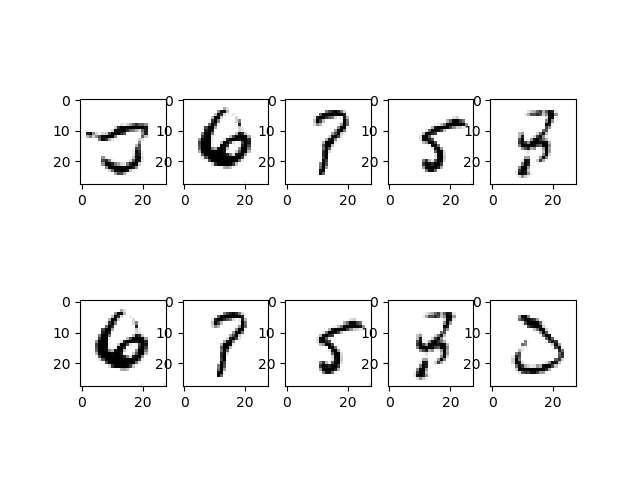

In [44]:
# Let us visualize 10 examples: 
# set the subplot
fig, axs = plt.subplots(2, 5)
for i in range(2):
    for j in range(5):  
    # plot image pixesles
        axs[i,j].imshow(np.reshape(X_gan[i+j], (28,28)), cmap='binary')
# Display the image
plt.show()